In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
import pingouin as pg
from brokenaxes import brokenaxes

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LIGHT_LASER = '#5E92EE'
LASER_COLOR = '#3375E9'#'#0033CC'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
#PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#V1
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V2

ephys_animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
opsin_control_animals = ['BS_40','BS_41','BS_42','BS_49','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19','AE_267','AO_273','AE_287']#,'AE_301']#,'AO_274' excluded due to slow post-reversal
# opsin_control_animals = ['AE_267','AO_273','AE_287']
# opsin_control_animals = ['AE_301']
#ephys_animals = opsin_control_animals
# opsin_control_animals = ['AE_267','AO_273','AE_287','AE_312']
opsin_control_animals = ['AE_267','AO_273','AE_287','AE_312']

#retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn_animals = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn_animals = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate_animals = ['BS_139','BS_165','BS_191','BS_192']

all_opsin_animals = np.concatenate((did_learn_animals,did_not_learn_animals,indeterminate_animals))

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

current_version = 1 #July 18th 2023
current_version = 2 #August 3rd 2023
current_version = 3 #August 30th 2023
current_version = 4 #Sept 18th 2023
current_version = 5 #October 19th 2023

stdfont = 14
stdyfrac = 0.06

In [2]:
animals = did_not_learn_animals

In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for DS_16
Fetching files for DS_17
Fetching files for DS_19
Fetching files for DS_22
Fetching files for DS_23
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_252
Fetching files for AE_254
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
Fetching files for AE_267
Fetching files for AO_273
Fetching files for AO_274
Fetching files for AE_287
Fetching files for AE_301
Fetching files for AE_312
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\behavior\BS_103_11v4_opto.txt: No columns to parse from file
Error loading P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: 

In [4]:
len(['BS_40','BS_41','BS_42','BS_49','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19','AE_267','AO_273','AE_287'])

17

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

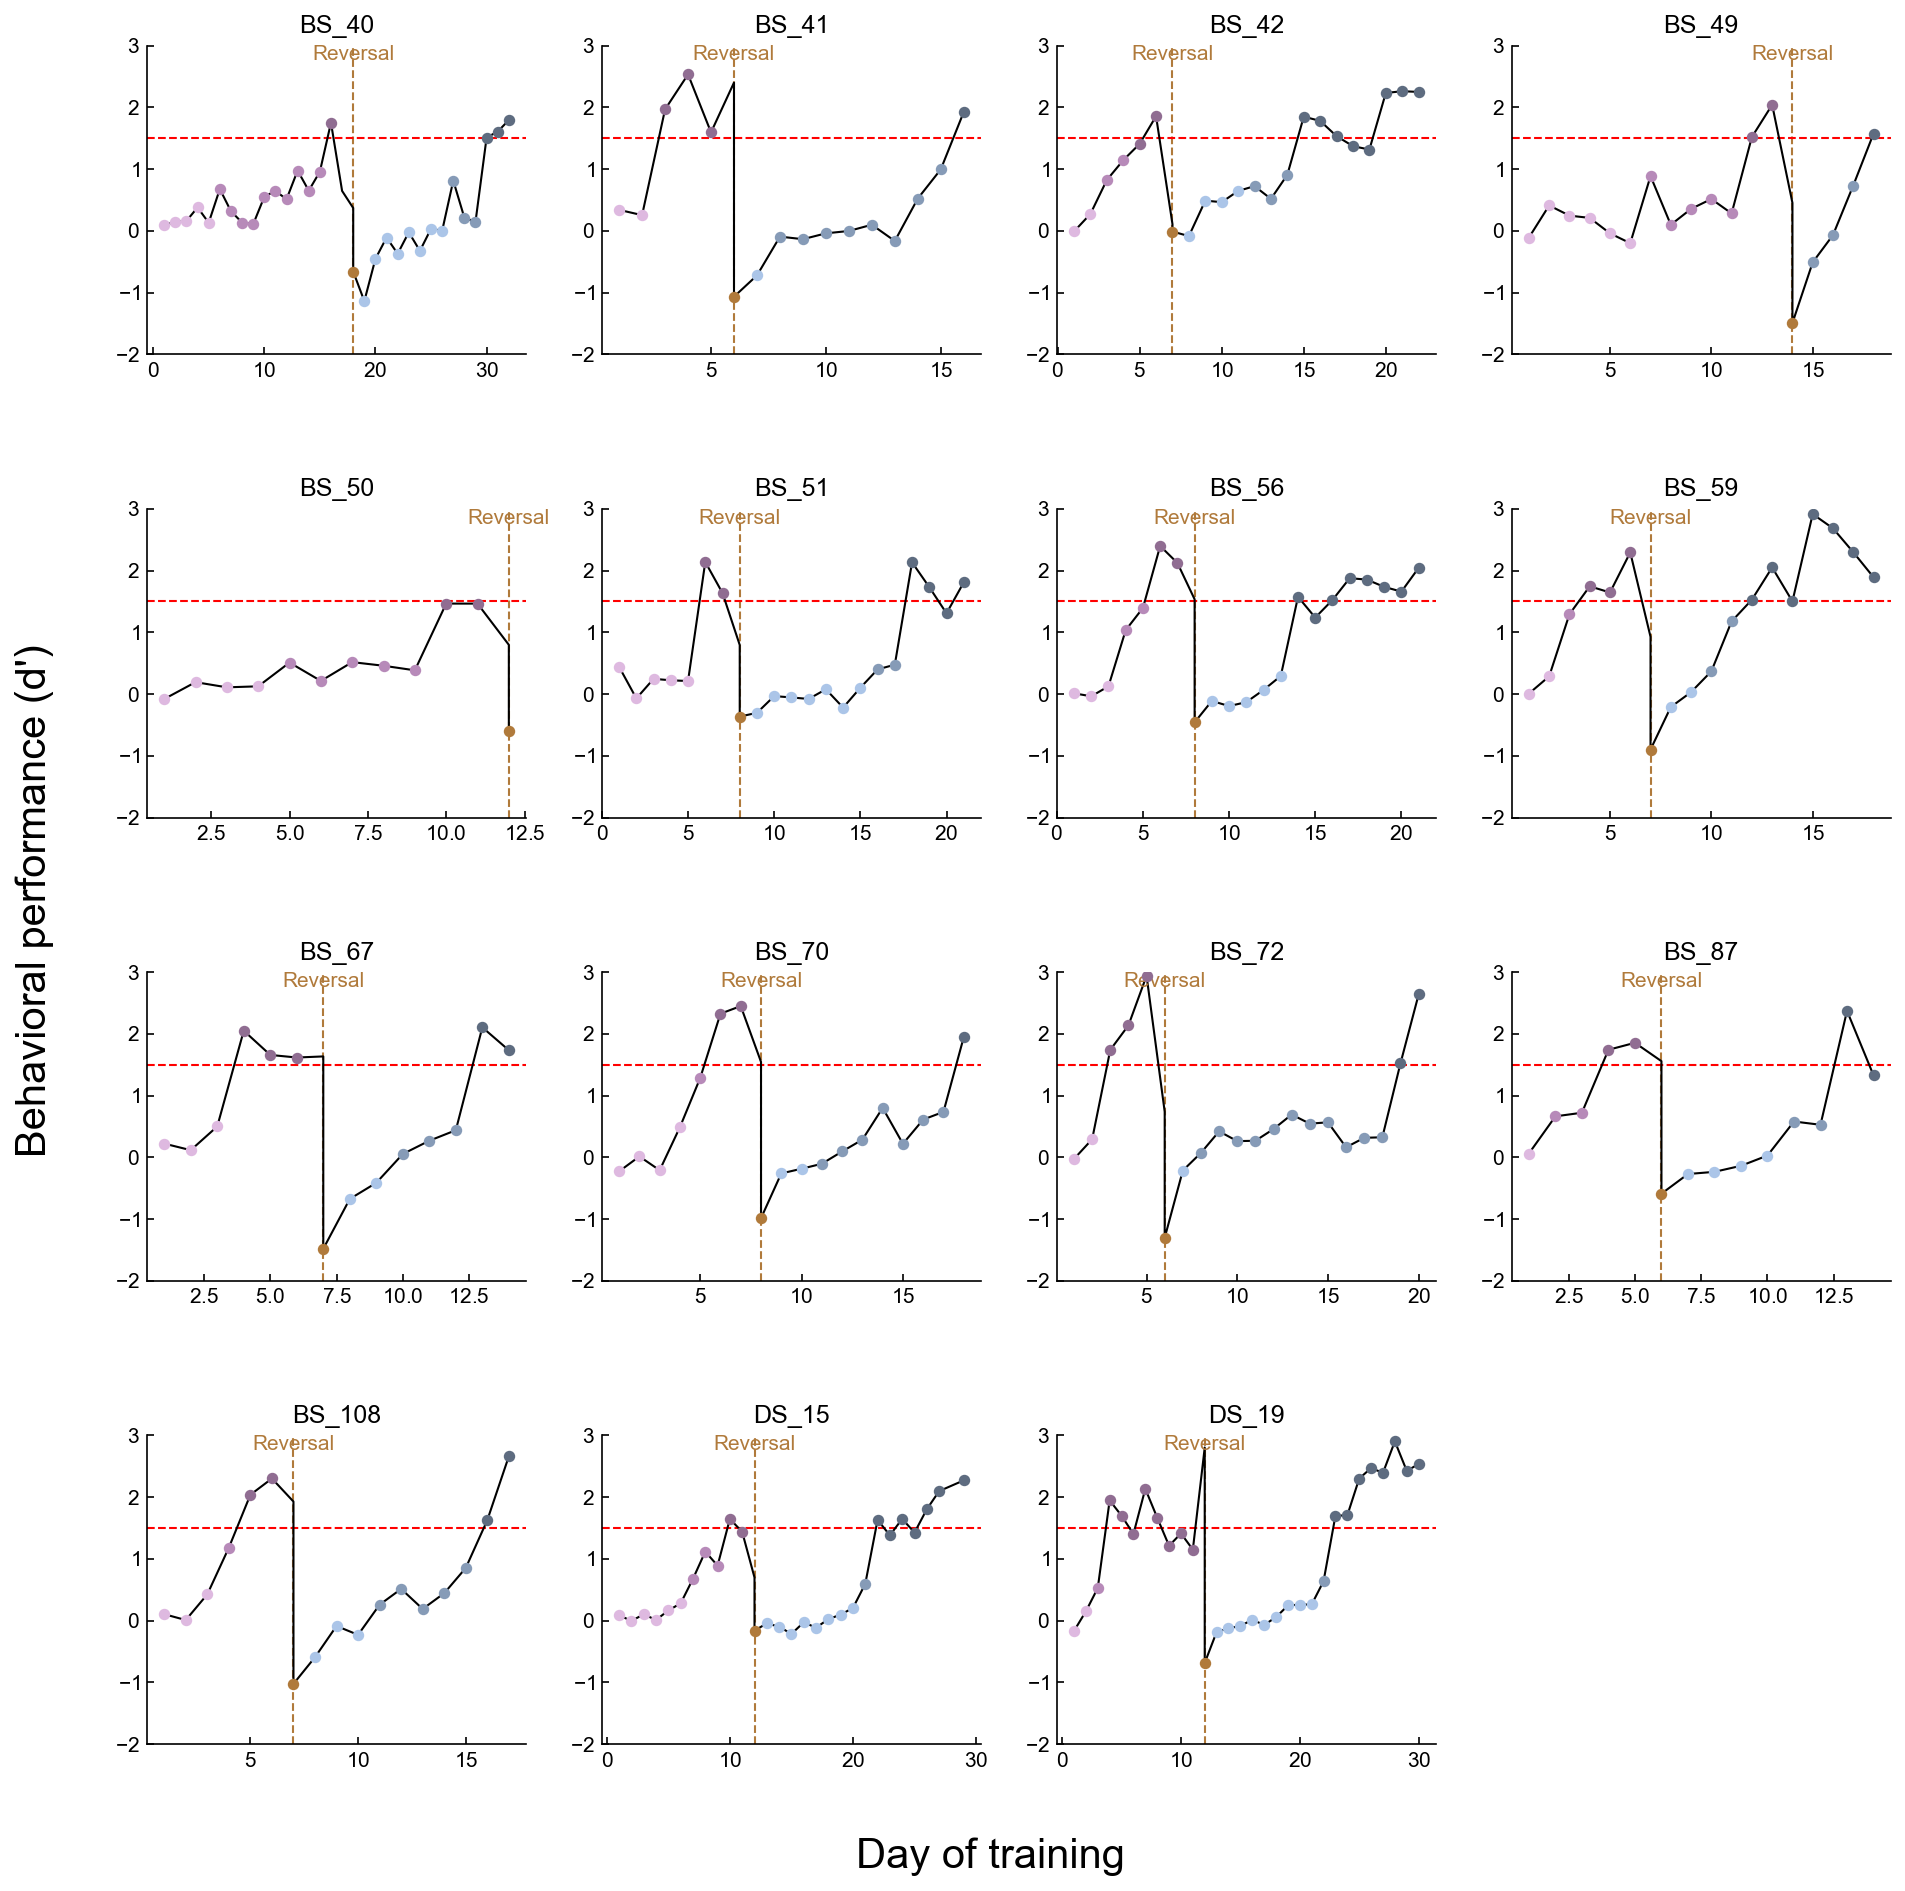

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


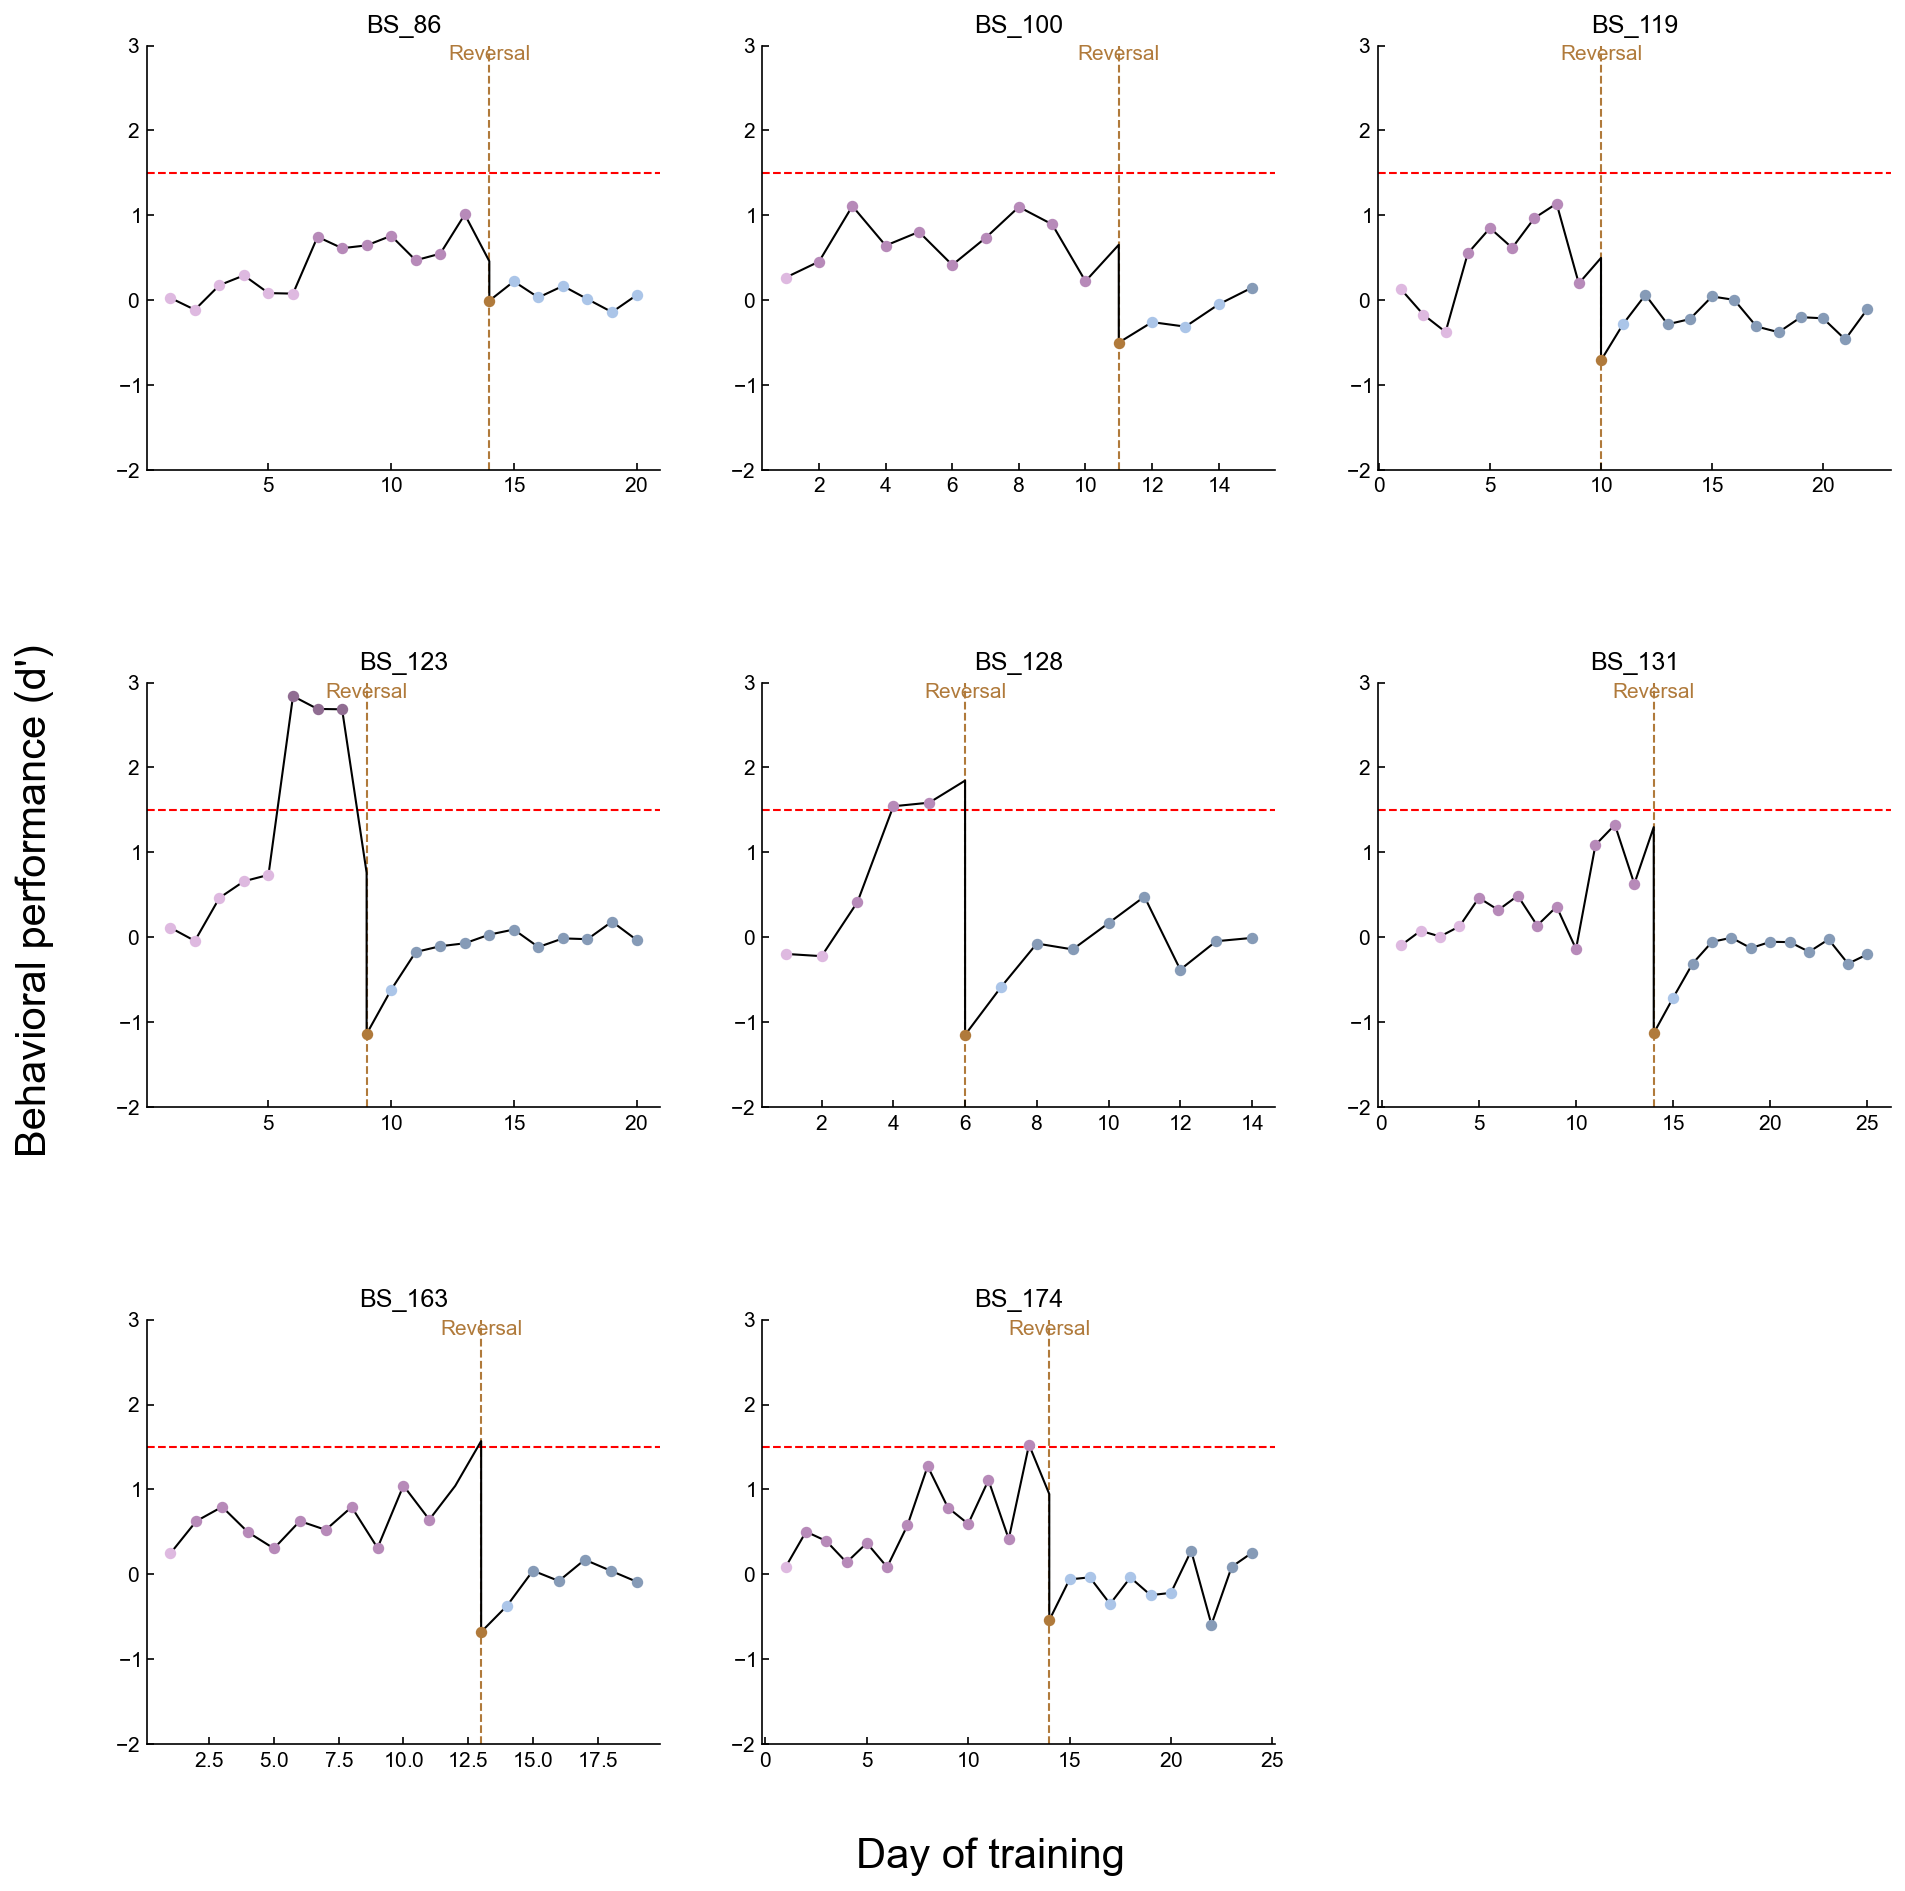

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


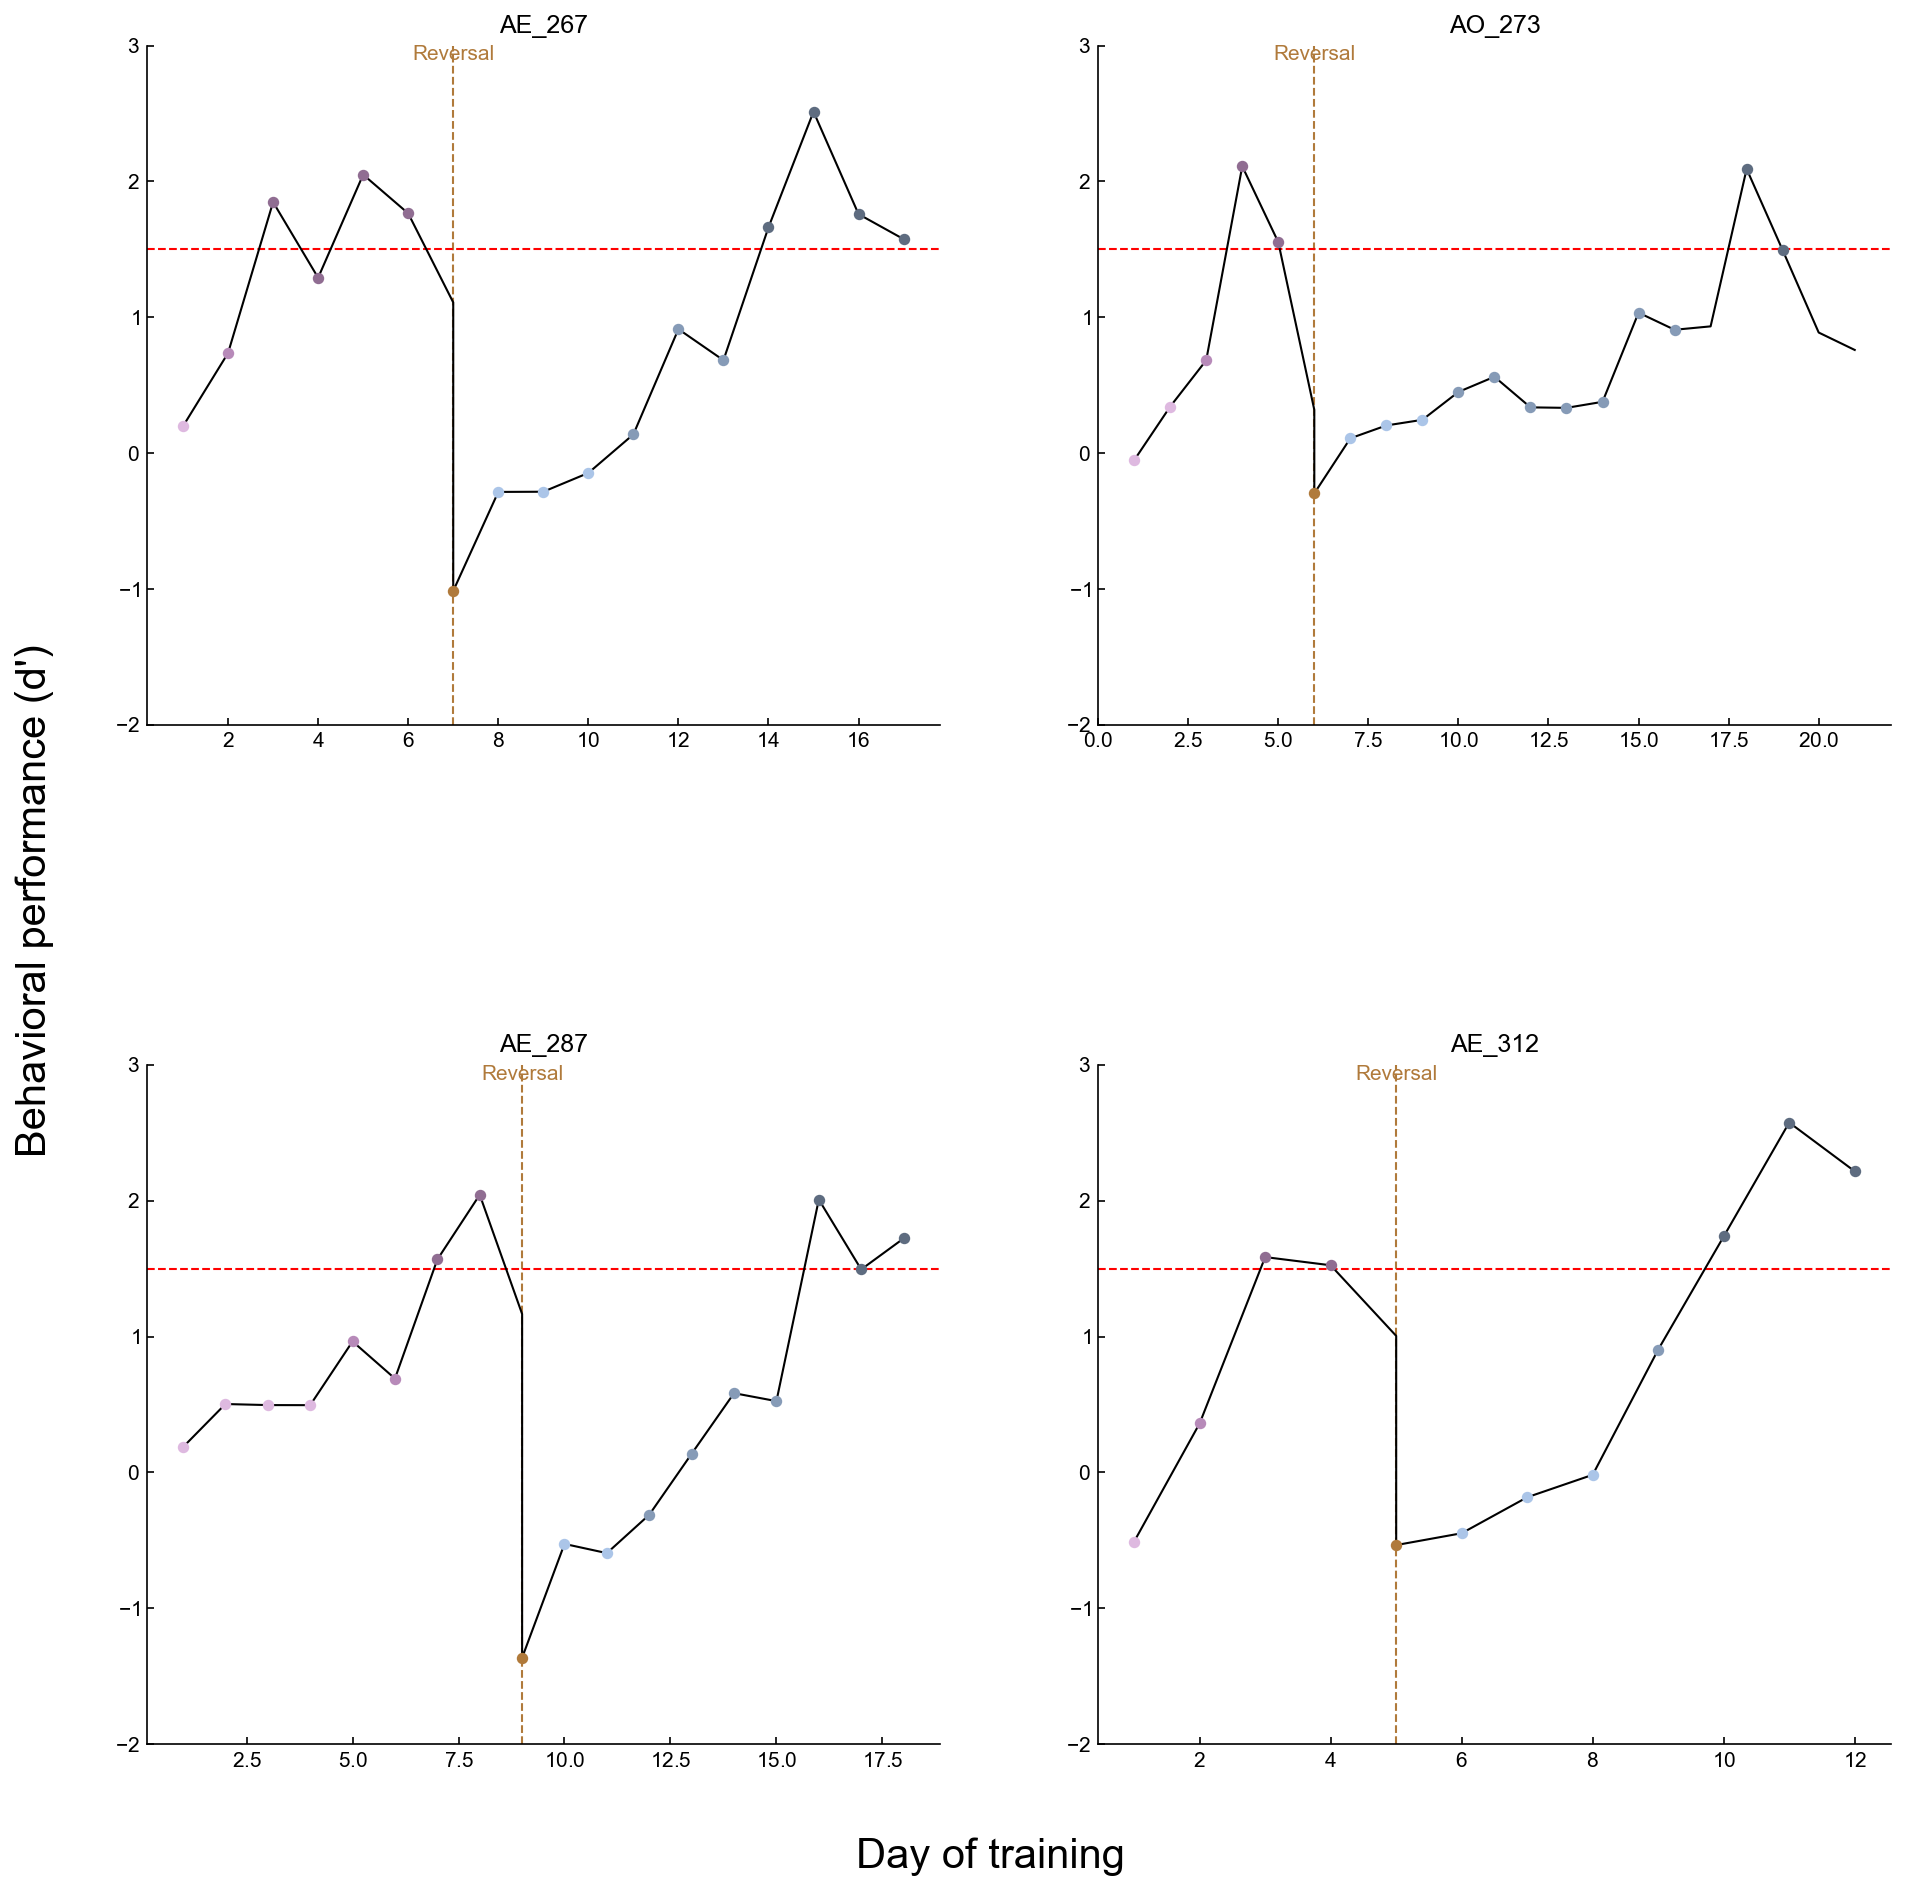

In [5]:
# learning_phases,_,_ = ilep.calculateLearningPhasesV2(did_not_learn_animals,animalBehaviors,plot=True,noTrim=False,noTrimPost=True)

learning_phases,_,_ = ilep.calculateLearningPhasesV2(ephys_animals,animalBehaviors,plot=True,noTrim=False)
learning_phases2,_,_ = ilep.calculateLearningPhasesV2(did_not_learn_animals,animalBehaviors,plot=True,noTrim=True)
learning_phases3,_,_ = ilep.calculateLearningPhasesV2(opsin_control_animals,animalBehaviors,plot=True,noTrim=False)
for d in learning_phases2:
    learning_phases[d] = learning_phases2[d]
for d in learning_phases3:
    learning_phases[d] = learning_phases3[d]

In [6]:
EnumSession = []
EnumClust = []
sessions = os.listdir(ops_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    if sessionfile.meta.region != 'AC':
        continue
    if sessionfile.meta.task not in ['opto nonreversal','opto switch','opto reversal']:
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 167/167 [00:03<00:00, 52.11it/s]


In [7]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        print(e)
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 999/999 [00:26<00:00, 37.13it/s] 

errors for: []


In [8]:
animals

['BS_86', 'BS_100', 'BS_119', 'BS_123', 'BS_128', 'BS_131', 'BS_163', 'BS_174']

In [9]:
pc_post_reversal_on = [np.nan]*30
for d in range(30):
    pc_post_reversal_on[d] = []
pc_post_laser_on = [np.nan]*30
for d in range(30):
    pc_post_laser_on[d] = []
dp_post_reversal_on = [np.nan]*30
for d in range(30):
    dp_post_reversal_on[d] = []
dp_post_laser_on = [np.nan]*30
for d in range(30):
    dp_post_laser_on[d] = []
    
pc_post_reversal_off = [np.nan]*30
for d in range(30):
    pc_post_reversal_off[d] = []
pc_post_laser_off = [np.nan]*30
for d in range(30):
    pc_post_laser_off[d] = []
dp_post_reversal_off = [np.nan]*30
for d in range(30):
    dp_post_reversal_off[d] = []
dp_post_laser_off = [np.nan]*30
for d in range(30):
    dp_post_laser_off[d] = []

for animal in animals:
    print(animal)
    days = np.array(range(len(animalBehaviors[animal].sessions)))+1
    days_mask_rev = np.greater(days,animalBehaviors[animal].reversal)
    days_mask_cloud = np.less(days,animalBehaviors[animal].cloudiness)
    days_mask = np.logical_and(days_mask_rev,days_mask_cloud)
    days = days[days_mask]
    
    first_day_of_laser = np.Inf
    for day in animalBehaviors[animal].sessions:
        if hasattr(animalBehaviors[animal].sessions[day],'laser') and np.sum(animalBehaviors[animal].sessions[day].laser)>0:
            first_day_of_laser = min(first_day_of_laser,day)
            
    print(f"{animal}: {days}. First day of laser is {first_day_of_laser}")
    
    for day in days:
        session_outcomes = animalBehaviors[animal].sessions[day].outcomes
        outcomes_on = animalBehaviors[animal].sessions[day].outcomes[animalBehaviors[animal].sessions[day].laser]
        outcomes_off = animalBehaviors[animal].sessions[day].outcomes[np.logical_not(animalBehaviors[animal].sessions[day].laser)]
        
        pc_on,dp_on = ilep.pcdpFromOutcomes(outcomes_on)
        pc_off,dp_off = ilep.pcdpFromOutcomes(outcomes_off)
        
        pc_post_reversal_on[day-animalBehaviors[animal].reversal].append(pc_on*100)
        dp_post_reversal_on[day-animalBehaviors[animal].reversal].append(dp_on)
        pc_post_reversal_off[day-animalBehaviors[animal].reversal].append(pc_off*100)
        dp_post_reversal_off[day-animalBehaviors[animal].reversal].append(dp_off)
        
        pc_post_laser_on[day-first_day_of_laser].append(pc_on*100)
        dp_post_laser_on[day-first_day_of_laser].append(dp_on)
        pc_post_laser_off[day-first_day_of_laser].append(pc_off*100)
        dp_post_laser_off[day-first_day_of_laser].append(dp_off)

BS_86
BS_86: [15 16 17 18 19]. First day of laser is 14
BS_100
BS_100: [12 13 14]. First day of laser is 11
BS_119
BS_119: [11 12 13 14 15 16 17 18 19 20 21 22]. First day of laser is 10
BS_123
BS_123: [10 11 12 13 14 15 16 17 18 19]. First day of laser is 9
BS_128
BS_128: [ 7  8  9 10 11 12 13]. First day of laser is 4
BS_131
BS_131: [15 16 17 18 19 20 21 22 23 24 25]. First day of laser is 14
BS_163
BS_163: [14 15 16 17 18]. First day of laser is 3
BS_174
BS_174: [15 16 17 18 19 20 21 22 23]. First day of laser is 14


# d' after Reversal

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


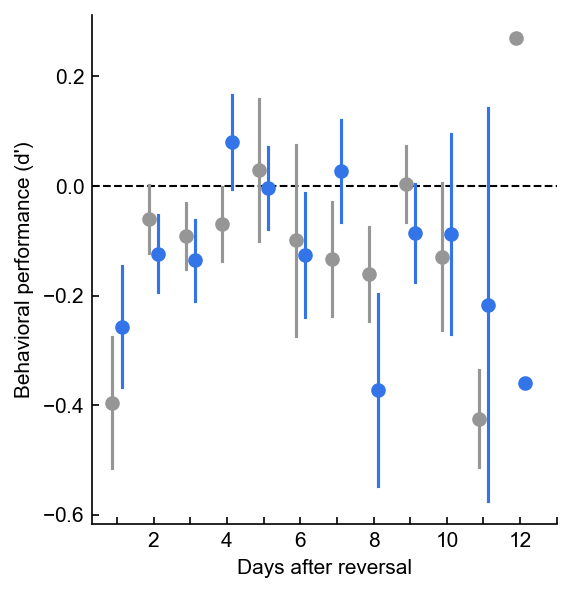

In [9]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(dp_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(dp_post_reversal_off[x])
    SEM_value = sem(dp_post_reversal_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(dp_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(dp_post_reversal_on[x])
    SEM_value = sem(dp_post_reversal_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(0,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,''])

#ax.set_xlim(0.5,12.5)

#ax.set_ylim([-0.75,0.5])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('Behavioral performance (d\')')
ax.set_xlabel('Days after reversal')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin d\' after reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

# d' after Laser

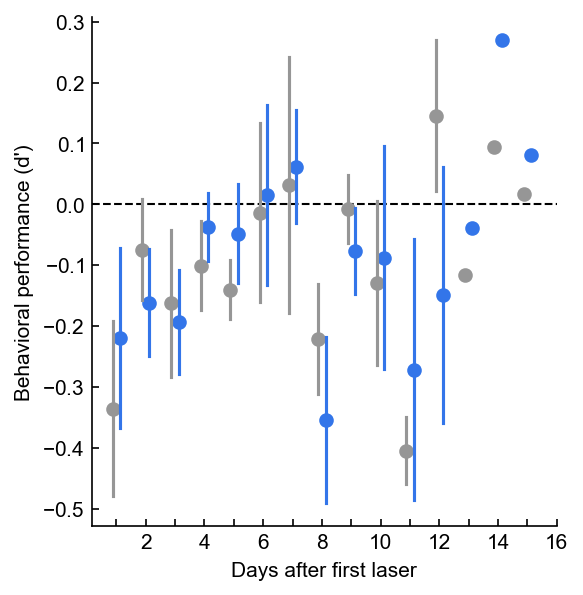

In [10]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(dp_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(dp_post_laser_off[x])
    SEM_value = sem(dp_post_laser_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(dp_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(dp_post_laser_on[x])
    SEM_value = sem(dp_post_laser_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(0,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,'',14,'',16])

#ax.set_xlim(0.5,13.5)

#ax.set_ylim([-0.75,0.5])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('Behavioral performance (d\')')
ax.set_xlabel('Days after first laser')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin d\' after laser V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

# PC after Reversal

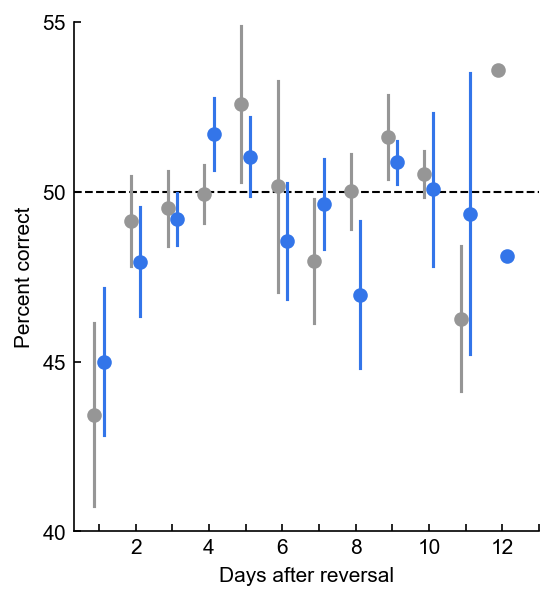

In [11]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(pc_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(pc_post_reversal_off[x])
    SEM_value = sem(pc_post_reversal_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(pc_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(pc_post_reversal_on[x])
    SEM_value = sem(pc_post_reversal_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(50,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,''])

#ax.set_xlim(0.5,12.5)

ax.set_ylim([40,55])
ax.set_yticks([40,45,50,55])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('Percent correct')
ax.set_xlabel('Days after reversal')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin PC after reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

# PC after Laser

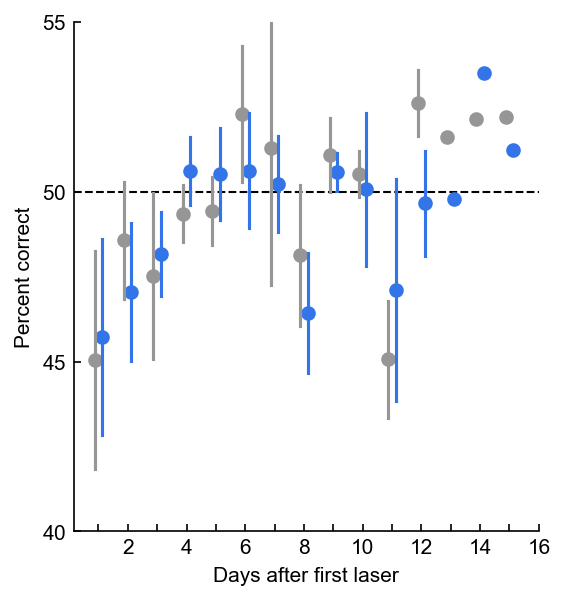

In [12]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(pc_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(pc_post_laser_off[x])
    SEM_value = sem(pc_post_laser_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(pc_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(pc_post_laser_on[x])
    SEM_value = sem(pc_post_laser_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(50,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,'',14,'',16])

#ax.set_xlim(0.5,13.5)

ax.set_ylim([40,55])
ax.set_yticks([40,45,50,55])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('Percent correct')
ax.set_xlabel('Days after first laser')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin PC after laser V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

# Opsin Stats

## d' post reversal

In [13]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(dp_post_reversal_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(dp_post_reversal_on[day])*[str(day)] + len(dp_post_reversal_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(dp_post_reversal_on[day])*['ON'] + len(dp_post_reversal_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((dp_post_reversal_on[day],dp_post_reversal_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           Source        SS     DF        MS         F     p-unc       np2
0            days  1.596449   11.0  0.145132  2.283512  0.015573  0.200759
1         context  0.001472    1.0  0.001472  0.023161  0.879346  0.000232
2  days * context  0.597420   11.0  0.054311  0.854531  0.586770  0.085922
3        Residual  6.355637  100.0  0.063556       NaN       NaN       NaN

   days    A   B     p-unc  p-corr    hedges
67    1  OFF  ON  0.441803     1.0 -0.403622
68   10  OFF  ON  1.000000     1.0 -0.118893
69   11  OFF  ON  1.000000     1.0 -0.321629
70   12  OFF  ON  1.000000     1.0       NaN
71    2  OFF  ON  0.505361     1.0  0.318054
72    3  OFF  ON  0.798446     1.0  0.224576
73    4  OFF  ON  0.620047     1.0 -0.684604
74    5  OFF  ON  0.620047     1.0  0.111145
75    6  OFF  ON  1.000000     1.0  0.074466
76    7  OFF  ON  0.222222     1.0 -0.657756
77    8  OFF  ON  0.685714     1.0  0.668788
78    9  OFF  ON  0.342857     1.0  0.485186

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [49]:
len(dp_post_reversal_on[4])

8

In [46]:
len(dp_post_reversal_on[7])

6

In [62]:
df[df['days'].values=='7']

,days,context,perf
92,7,ON,0.049996
93,7,ON,-0.253574
94,7,ON,-0.012356
95,7,ON,-0.038529
96,7,ON,0.145742
97,7,ON,0.294710
98,7,OFF,-0.189345
99,7,OFF,-0.352141
100,7,OFF,-0.215780
101,7,OFF,-0.052604


## d' post laser

In [14]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(dp_post_laser_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(dp_post_laser_on[day])*[str(day)] + len(dp_post_laser_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(dp_post_laser_on[day])*['ON'] + len(dp_post_laser_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((dp_post_laser_on[day],dp_post_laser_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
           Source        SS    DF        MS         F     p-unc       np2
0            days  1.740360  14.0  0.124311  1.795016  0.050548  0.210947
1         context  0.001472   1.0  0.001472  0.021255  0.884398  0.000226
2  days * context  0.299302  14.0  0.021379  0.308702  0.991718  0.043956
3        Residual  6.509844  94.0  0.069254       NaN       NaN       NaN

    days    A   B     p-unc  p-corr    hedges
106    1  OFF  ON  0.588745     1.0 -0.300420
107   10  OFF  ON  1.000000     1.0 -0.118893
108   11  OFF  ON  1.000000     1.0 -0.393504
109   12  OFF  ON  0.666667     1.0  0.687166
110   13  OFF  ON  1.000000     1.0       NaN
111   14  OFF  ON  1.000000     1.0       NaN
112   15  OFF  ON  1.000000     1.0       NaN
113    2  OFF  ON  0.393939     1.0  0.383141
114    3  OFF  ON  0.620047     1.0  0.105115
115    4  OFF  ON  0.937229     1.0 -0.369294
116    5  OFF  ON  0.240260     1.0 -0.514908
117    6  OFF  ON  1.0000

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## PC post reversal

In [15]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(pc_post_reversal_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(pc_post_reversal_on[day])*[str(day)] + len(pc_post_reversal_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(pc_post_reversal_on[day])*['ON'] + len(pc_post_reversal_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((pc_post_reversal_on[day],pc_post_reversal_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           Source           SS     DF         MS         F     p-unc       np2
0            days   592.783303   11.0  53.889391  2.854358  0.002718  0.238953
1         context     1.482137    1.0   1.482137  0.078504  0.779913  0.000784
2  days * context    91.419440   11.0   8.310858  0.440201  0.934114  0.046186
3        Residual  1887.968597  100.0  18.879686       NaN       NaN       NaN

   days    A   B     p-unc  p-corr    hedges
67    1  OFF  ON  0.720901     1.0 -0.212970
68   10  OFF  ON  1.000000     1.0  0.127305
69   11  OFF  ON  0.666667     1.0 -0.379617
70   12  OFF  ON  1.000000     1.0       NaN
71    2  OFF  ON  0.596799     1.0  0.271111
72    3  OFF  ON  0.878477     1.0  0.112623
73    4  OFF  ON  0.259324     1.0 -0.653789
74    5  OFF  ON  0.804779     1.0  0.299252
75    6  OFF  ON  0.690476     1.0  0.260536
76    7  OFF  ON  0.420635     1.0 -0.425473
77    8  OFF  ON  0.200000     1.0  0.770102
78    9  OFF  ON  0.6857

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## PC post laser

In [16]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(pc_post_laser_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(pc_post_laser_on[day])*[str(day)] + len(pc_post_laser_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(pc_post_laser_on[day])*['ON'] + len(pc_post_laser_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((pc_post_laser_on[day],pc_post_laser_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
           Source           SS    DF         MS         F     p-unc       np2
0            days   497.693670  14.0  35.549548  1.652709  0.079359  0.197527
1         context     1.482137   1.0   1.482137  0.068905  0.793512  0.000732
2  days * context    52.550831  14.0   3.753631  0.174507  0.999629  0.025332
3        Residual  2021.926838  94.0  21.509860       NaN       NaN       NaN

    days    A   B     p-unc  p-corr    hedges
106    1  OFF  ON  0.937229     1.0 -0.083461
107   10  OFF  ON  1.000000     1.0  0.127305
108   11  OFF  ON  1.000000     1.0 -0.362858
109   12  OFF  ON  0.333333     1.0  0.921143
110   13  OFF  ON  1.000000     1.0       NaN
111   14  OFF  ON  1.000000     1.0       NaN
112   15  OFF  ON  1.000000     1.0       NaN
113    2  OFF  ON  0.574504     1.0  0.303438
114    3  OFF  ON  0.710373     1.0 -0.119374
115    4  OFF  ON  0.572476     1.0 -0.513010
116    5  OFF  ON  0.699134     1.0 -0.342045
117  

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Trial Outcomes

In [33]:
hit_post_reversal_on = [np.nan]*30
for d in range(30):
    hit_post_reversal_on[d] = []
hit_post_laser_on = [np.nan]*30
for d in range(30):
    hit_post_laser_on[d] = []
    
miss_post_reversal_on = [np.nan]*30
for d in range(30):
    miss_post_reversal_on[d] = []
miss_post_laser_on = [np.nan]*30
for d in range(30):
    miss_post_laser_on[d] = []
    
falarm_post_reversal_on = [np.nan]*30
for d in range(30):
    falarm_post_reversal_on[d] = []
falarm_post_laser_on = [np.nan]*30
for d in range(30):
    falarm_post_laser_on[d] = []
    
creject_post_reversal_on = [np.nan]*30
for d in range(30):
    creject_post_reversal_on[d] = []
creject_post_laser_on = [np.nan]*30
for d in range(30):
    creject_post_laser_on[d] = []
    
    
    
    
hit_post_reversal_off = [np.nan]*30
for d in range(30):
    hit_post_reversal_off[d] = []
hit_post_laser_off = [np.nan]*30
for d in range(30):
    hit_post_laser_off[d] = []
    
miss_post_reversal_off = [np.nan]*30
for d in range(30):
    miss_post_reversal_off[d] = []
miss_post_laser_off = [np.nan]*30
for d in range(30):
    miss_post_laser_off[d] = []
    
falarm_post_reversal_off = [np.nan]*30
for d in range(30):
    falarm_post_reversal_off[d] = []
falarm_post_laser_off = [np.nan]*30
for d in range(30):
    falarm_post_laser_off[d] = []
    
creject_post_reversal_off = [np.nan]*30
for d in range(30):
    creject_post_reversal_off[d] = []
creject_post_laser_off = [np.nan]*30
for d in range(30):
    creject_post_laser_off[d] = []
    

    
    
    
    

for animal in animals:
    print(animal)
    days = np.array(range(len(animalBehaviors[animal].sessions)))+1
    days_mask_rev = np.greater(days,animalBehaviors[animal].reversal)
    days_mask_cloud = np.less(days,animalBehaviors[animal].cloudiness)
    days_mask = np.logical_and(days_mask_rev,days_mask_cloud)
    days = days[days_mask]
    
    if 8+animalBehaviors[animal].reversal in days:
        print(f"{animal} has a day 8")
    
    first_day_of_laser = np.Inf
    for day in animalBehaviors[animal].sessions:
        if hasattr(animalBehaviors[animal].sessions[day],'laser') and np.sum(animalBehaviors[animal].sessions[day].laser)>0:
            first_day_of_laser = min(first_day_of_laser,day)
            
    print(f"{animal}: {days}. First day of laser is {first_day_of_laser}")
    
    for day in days:
        session_outcomes = animalBehaviors[animal].sessions[day].outcomes
        outcomes_on = animalBehaviors[animal].sessions[day].outcomes[animalBehaviors[animal].sessions[day].laser]
        outcomes_off = animalBehaviors[animal].sessions[day].outcomes[np.logical_not(animalBehaviors[animal].sessions[day].laser)]
        
        hit_on = np.sum(np.equal(outcomes_on,1))
        miss_on = np.sum(np.equal(outcomes_on,2))
        falarm_on = np.sum(np.equal(outcomes_on,3))
        creject_on = np.sum(np.equal(outcomes_on,4))
        
        hit_off = np.sum(np.equal(outcomes_off,1))
        miss_off = np.sum(np.equal(outcomes_off,2))
        falarm_off = np.sum(np.equal(outcomes_off,3))
        creject_off = np.sum(np.equal(outcomes_off,4))
        
        hit_post_reversal_on[day-animalBehaviors[animal].reversal].append(100*hit_on/(hit_on+miss_on))
        hit_post_reversal_off[day-animalBehaviors[animal].reversal].append(100*hit_off/(hit_off+miss_off))
        miss_post_reversal_on[day-animalBehaviors[animal].reversal].append(100*miss_on/(hit_on+miss_on))
        miss_post_reversal_off[day-animalBehaviors[animal].reversal].append(100*miss_off/(hit_off+miss_off))
        falarm_post_reversal_on[day-animalBehaviors[animal].reversal].append(100*falarm_on/(falarm_on+creject_on))
        falarm_post_reversal_off[day-animalBehaviors[animal].reversal].append(100*falarm_off/(falarm_off+creject_off))
        creject_post_reversal_on[day-animalBehaviors[animal].reversal].append(100*creject_on/(falarm_on+creject_on))
        creject_post_reversal_off[day-animalBehaviors[animal].reversal].append(100*creject_off/(falarm_off+creject_off))
        
        hit_post_laser_on[day-first_day_of_laser].append(100*hit_on/(hit_on+miss_on))
        hit_post_laser_off[day-first_day_of_laser].append(100*hit_off/(hit_off+miss_off))
        miss_post_laser_on[day-first_day_of_laser].append(100*miss_on/(hit_on+miss_on))
        miss_post_laser_off[day-first_day_of_laser].append(100*miss_off/(hit_off+miss_off))
        falarm_post_laser_on[day-first_day_of_laser].append(100*falarm_on/(falarm_on+creject_on))
        falarm_post_laser_off[day-first_day_of_laser].append(100*falarm_off/(falarm_off+creject_off))
        creject_post_laser_on[day-first_day_of_laser].append(100*creject_on/(falarm_on+creject_on))
        creject_post_laser_off[day-first_day_of_laser].append(100*creject_off/(falarm_off+creject_off))

BS_86
BS_86: [15 16 17 18 19]. First day of laser is 14
BS_100
BS_100: [12 13 14]. First day of laser is 11
BS_119
BS_119 has a day 8
BS_119: [11 12 13 14 15 16 17 18 19 20 21 22]. First day of laser is 10
BS_123
BS_123 has a day 8
BS_123: [10 11 12 13 14 15 16 17 18 19]. First day of laser is 9
BS_128
BS_128: [ 7  8  9 10 11 12 13]. First day of laser is 4
BS_131
BS_131 has a day 8
BS_131: [15 16 17 18 19 20 21 22 23 24 25]. First day of laser is 14
BS_163
BS_163: [14 15 16 17 18]. First day of laser is 3
BS_174
BS_174 has a day 8
BS_174: [15 16 17 18 19 20 21 22 23]. First day of laser is 14


# Hits after Reversal

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


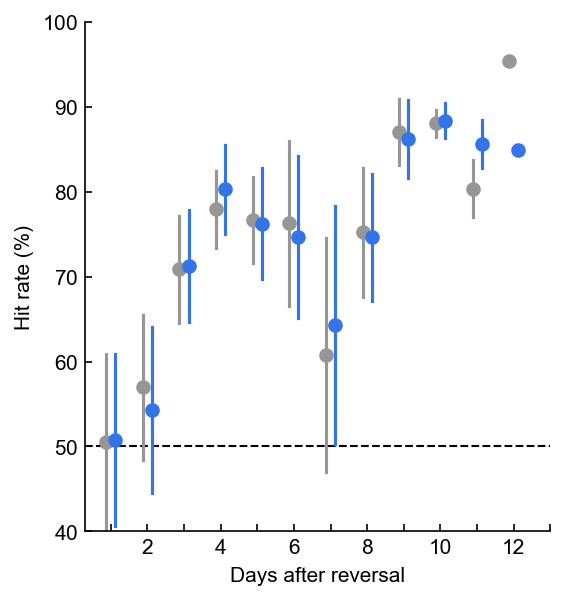

In [18]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(hit_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(hit_post_reversal_off[x])
    SEM_value = sem(hit_post_reversal_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(hit_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(hit_post_reversal_on[x])
    SEM_value = sem(hit_post_reversal_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(50,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,''])

#ax.set_xlim(0.5,12.5)

ax.set_ylim([40,100])
#ax.set_yticks([40,45,50,55])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('Hit rate (%)')
ax.set_xlabel('Days after reversal')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin hit rate after reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [92]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(hit_post_reversal_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(hit_post_reversal_on[day])*[str(day)] + len(hit_post_reversal_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(hit_post_reversal_on[day])*['ON'] + len(hit_post_reversal_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((hit_post_reversal_on[day],hit_post_reversal_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           Source            SS     DF           MS         F     p-unc  \
0            days  19181.291082   11.0  1743.753735  3.773669  0.000127   
1         context      0.473086    1.0     0.473086  0.001024  0.974530   
2  days * context    187.580875   11.0    17.052807  0.036904  0.999999   
3        Residual  52677.632861  114.0   462.084499       NaN       NaN   

        np2  
0  0.266930  
1  0.000009  
2  0.003548  
3       NaN  

   days    A   B     p-unc  p-corr    hedges
67    1  OFF  ON  1.000000     1.0 -0.007547
68   10  OFF  ON  0.885714     1.0 -0.237688
69   11  OFF  ON  0.666667     1.0 -0.683264
70   12  OFF  ON  1.000000     1.0       NaN
71    2  OFF  ON  0.798446     1.0  0.097804
72    3  OFF  ON  1.000000     1.0 -0.019587
73    4  OFF  ON  0.959130     1.0 -0.085825
74    5  OFF  ON  0.901515     1.0  0.096534
75    6  OFF  ON  1.000000     1.0  0.002548
76    7  OFF  ON  0.588745     1.0 -0.112897
77    8  OFF  ON  

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Misses after Reversal

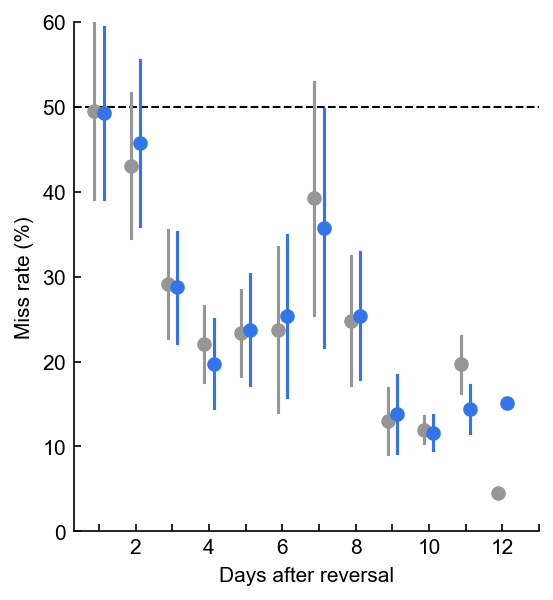

In [19]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(miss_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(miss_post_reversal_off[x])
    SEM_value = sem(miss_post_reversal_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(miss_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(miss_post_reversal_on[x])
    SEM_value = sem(miss_post_reversal_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(50,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,''])

#ax.set_xlim(0.5,12.5)

ax.set_ylim([0,60])
#ax.set_yticks([40,45,50,55])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('Miss rate (%)')
ax.set_xlabel('Days after reversal')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin Miss rate after reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [93]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(miss_post_reversal_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(miss_post_reversal_on[day])*[str(day)] + len(miss_post_reversal_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(miss_post_reversal_on[day])*['ON'] + len(miss_post_reversal_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((miss_post_reversal_on[day],miss_post_reversal_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           Source            SS     DF           MS         F     p-unc  \
0            days  19181.291082   11.0  1743.753735  3.773669  0.000127   
1         context      0.473086    1.0     0.473086  0.001024  0.974530   
2  days * context    187.580875   11.0    17.052807  0.036904  0.999999   
3        Residual  52677.632861  114.0   462.084499       NaN       NaN   

        np2  
0  0.266930  
1  0.000009  
2  0.003548  
3       NaN  

   days    A   B     p-unc  p-corr    hedges
67    1  OFF  ON  1.000000     1.0  0.007547
68   10  OFF  ON  0.885714     1.0  0.237688
69   11  OFF  ON  0.666667     1.0  0.683264
70   12  OFF  ON  1.000000     1.0       NaN
71    2  OFF  ON  0.798446     1.0 -0.097804
72    3  OFF  ON  1.000000     1.0  0.019587
73    4  OFF  ON  0.959130     1.0  0.085825
74    5  OFF  ON  0.901515     1.0 -0.096534
75    6  OFF  ON  1.000000     1.0 -0.002548
76    7  OFF  ON  0.588745     1.0  0.112897
77    8  OFF  ON  

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Falarms after Reversal

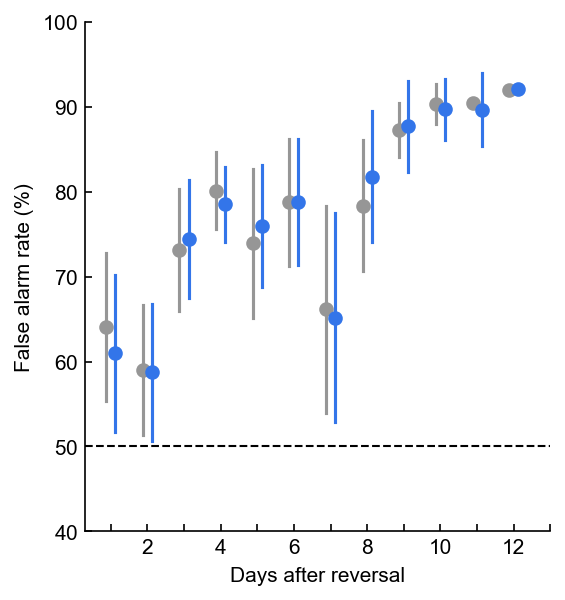

In [20]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(falarm_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(falarm_post_reversal_off[x])
    SEM_value = sem(falarm_post_reversal_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(falarm_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(falarm_post_reversal_on[x])
    SEM_value = sem(falarm_post_reversal_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(50,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,''])

#ax.set_xlim(0.5,12.5)

ax.set_ylim([40,100])
#ax.set_yticks([40,45,50,55])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('False alarm rate (%)')
ax.set_xlabel('Days after reversal')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin Falarm rate after reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [94]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(falarm_post_reversal_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(falarm_post_reversal_on[day])*[str(day)] + len(falarm_post_reversal_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(falarm_post_reversal_on[day])*['ON'] + len(falarm_post_reversal_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((falarm_post_reversal_on[day],falarm_post_reversal_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           Source            SS     DF           MS         F     p-unc  \
0            days  14106.784407   11.0  1282.434946  3.048507  0.001312   
1         context      5.358986    1.0     5.358986  0.012739  0.910334   
2  days * context     71.069168   11.0     6.460833  0.015358  1.000000   
3        Residual  47957.107560  114.0   420.676382       NaN       NaN   

        np2  
0  0.227295  
1  0.000112  
2  0.001480  
3       NaN  

   days    A   B     p-unc  p-corr    hedges
67    1  OFF  ON  0.645377     1.0  0.115953
68   10  OFF  ON  0.685714     1.0  0.125754
69   11  OFF  ON  1.000000     1.0  0.099019
70   12  OFF  ON  1.000000     1.0       NaN
71    2  OFF  ON  0.959130     1.0  0.014079
72    3  OFF  ON  0.878477     1.0 -0.060747
73    4  OFF  ON  0.645377     1.0  0.034586
74    5  OFF  ON  0.901515     1.0  0.013025
75    6  OFF  ON  1.000000     1.0 -0.021253
76    7  OFF  ON  1.000000     1.0  0.066792
77    8  OFF  ON  

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Crejects after Reversal

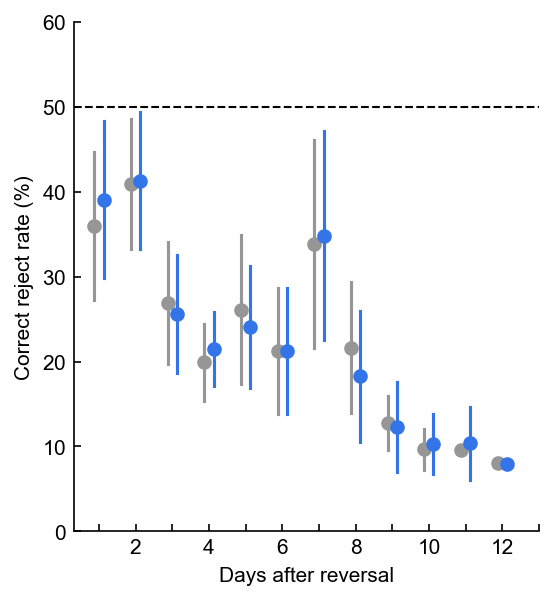

In [21]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(creject_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(creject_post_reversal_off[x])
    SEM_value = sem(creject_post_reversal_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(creject_post_reversal_on) <= 0:
        continue
        
    mean_value = np.mean(creject_post_reversal_on[x])
    SEM_value = sem(creject_post_reversal_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(50,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,''])

#ax.set_xlim(0.5,12.5)

ax.set_ylim([0,60])
#ax.set_yticks([40,45,50,55])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('Correct reject rate (%)')
ax.set_xlabel('Days after reversal')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin Creject rate after reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [95]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(creject_post_reversal_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(creject_post_reversal_on[day])*[str(day)] + len(creject_post_reversal_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(creject_post_reversal_on[day])*['ON'] + len(creject_post_reversal_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((creject_post_reversal_on[day],creject_post_reversal_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
           Source            SS     DF           MS         F     p-unc  \
0            days  14106.784407   11.0  1282.434946  3.048507  0.001312   
1         context      5.358986    1.0     5.358986  0.012739  0.910334   
2  days * context     71.069168   11.0     6.460833  0.015358  1.000000   
3        Residual  47957.107560  114.0   420.676382       NaN       NaN   

        np2  
0  0.227295  
1  0.000112  
2  0.001480  
3       NaN  

   days    A   B     p-unc  p-corr    hedges
67    1  OFF  ON  0.645377     1.0 -0.115953
68   10  OFF  ON  0.685714     1.0 -0.125754
69   11  OFF  ON  1.000000     1.0 -0.099019
70   12  OFF  ON  1.000000     1.0       NaN
71    2  OFF  ON  0.959130     1.0 -0.014079
72    3  OFF  ON  0.878477     1.0  0.060747
73    4  OFF  ON  0.645377     1.0 -0.034586
74    5  OFF  ON  0.901515     1.0 -0.013025
75    6  OFF  ON  1.000000     1.0  0.021253
76    7  OFF  ON  1.000000     1.0 -0.066792
77    8  OFF  ON  

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Hits after Laser

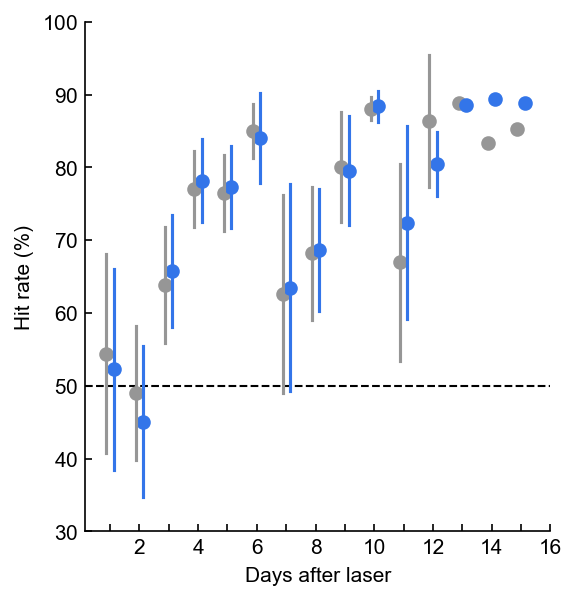

In [22]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(hit_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(hit_post_laser_off[x])
    SEM_value = sem(hit_post_laser_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(hit_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(hit_post_laser_on[x])
    SEM_value = sem(hit_post_laser_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(50,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,'',14,'',16])

#ax.set_xlim(0.5,12.5)

ax.set_ylim([30,100])
#ax.set_yticks([40,45,50,55])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('Hit rate (%)')
ax.set_xlabel('Days after laser')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin hit rate after laser V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [96]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(hit_post_laser_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(hit_post_laser_on[day])*[str(day)] + len(hit_post_laser_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(hit_post_laser_on[day])*['ON'] + len(hit_post_laser_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((hit_post_laser_on[day],hit_post_laser_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
           Source            SS     DF           MS         F     p-unc  \
0            days  20803.188537   15.0  1386.879236  2.880078  0.000796   
1         context      0.473086    1.0     0.473086  0.000982  0.975054   
2  days * context    199.840028   15.0    13.322669  0.027667  1.000000   
3        Residual  51043.476253  106.0   481.542229       NaN       NaN   

        np2  
0  0.289550  
1  0.000009  
2  0.003900  
3       NaN  

    days    A   B     p-unc  p-corr    hedges
121    1  OFF  ON  0.818182     1.0  0.058716
122   10  OFF  ON  0.885714     1.0 -0.237688
123   11  OFF  ON  0.700000     1.0 -0.188268
124   12  OFF  ON  0.666667     1.0  0.338423
125   13  OFF  ON  1.000000     1.0       NaN
126   14  OFF  ON  1.000000     1.0       NaN
127   15  OFF  ON  1.000000     1.0       NaN
128   16  OFF  ON  1.000000     1.0       NaN
129    2  OFF  ON  0.699134     1.0  0.153541
130    3  OFF  ON  0.901515     1.0 -

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Misses after Laser

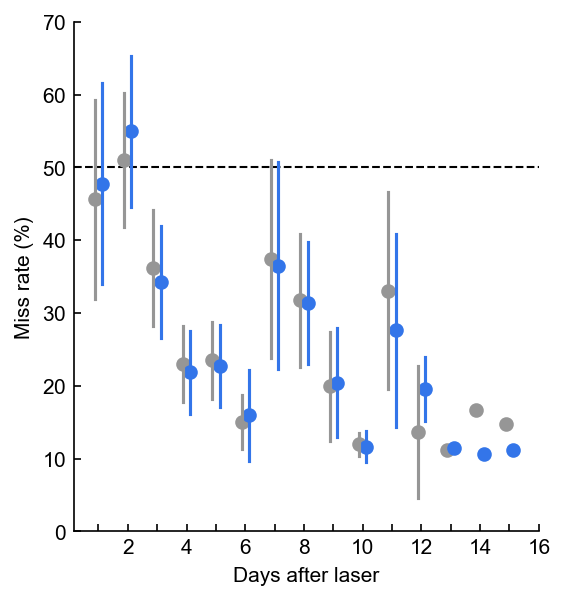

In [23]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(miss_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(miss_post_laser_off[x])
    SEM_value = sem(miss_post_laser_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(miss_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(miss_post_laser_on[x])
    SEM_value = sem(miss_post_laser_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(50,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,'',14,'',16])

#ax.set_xlim(0.5,12.5)

ax.set_ylim([0,70])
#ax.set_yticks([40,45,50,55])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('Miss rate (%)')
ax.set_xlabel('Days after laser')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin Miss rate after laser V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [97]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(miss_post_laser_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(miss_post_laser_on[day])*[str(day)] + len(miss_post_laser_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(miss_post_laser_on[day])*['ON'] + len(miss_post_laser_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((miss_post_laser_on[day],miss_post_laser_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
           Source            SS     DF           MS         F     p-unc  \
0            days  20803.188537   15.0  1386.879236  2.880078  0.000796   
1         context      0.473086    1.0     0.473086  0.000982  0.975054   
2  days * context    199.840028   15.0    13.322669  0.027667  1.000000   
3        Residual  51043.476253  106.0   481.542229       NaN       NaN   

        np2  
0  0.289550  
1  0.000009  
2  0.003900  
3       NaN  

    days    A   B     p-unc  p-corr    hedges
121    1  OFF  ON  0.818182     1.0 -0.058716
122   10  OFF  ON  0.885714     1.0  0.237688
123   11  OFF  ON  0.700000     1.0  0.188268
124   12  OFF  ON  0.666667     1.0 -0.338423
125   13  OFF  ON  1.000000     1.0       NaN
126   14  OFF  ON  1.000000     1.0       NaN
127   15  OFF  ON  1.000000     1.0       NaN
128   16  OFF  ON  1.000000     1.0       NaN
129    2  OFF  ON  0.699134     1.0 -0.153541
130    3  OFF  ON  0.901515     1.0  

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Falarms after Laser

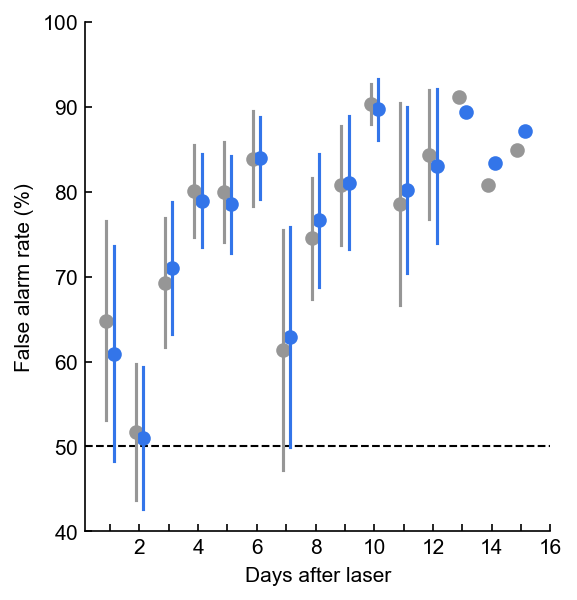

In [24]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(falarm_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(falarm_post_laser_off[x])
    SEM_value = sem(falarm_post_laser_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(falarm_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(falarm_post_laser_on[x])
    SEM_value = sem(falarm_post_laser_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(50,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,'',14,'',16])

#ax.set_xlim(0.5,12.5)

ax.set_ylim([40,100])
#ax.set_yticks([40,45,50,55])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('False alarm rate (%)')
ax.set_xlabel('Days after laser')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin Falarm rate after laser V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [98]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(falarm_post_laser_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(falarm_post_laser_on[day])*[str(day)] + len(falarm_post_laser_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(falarm_post_laser_on[day])*['ON'] + len(falarm_post_laser_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((falarm_post_laser_on[day],falarm_post_laser_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
           Source            SS     DF           MS         F     p-unc  \
0            days  16292.196838   15.0  1086.146456  2.519088  0.003166   
1         context      5.358986    1.0     5.358986  0.012429  0.911442   
2  days * context    139.108339   15.0     9.273889  0.021509  1.000000   
3        Residual  45703.655958  106.0   431.166566       NaN       NaN   

        np2  
0  0.262795  
1  0.000117  
2  0.003034  
3       NaN  

    days    A   B     p-unc  p-corr    hedges
121    1  OFF  ON  0.818182     1.0  0.120833
122   10  OFF  ON  0.685714     1.0  0.125754
123   11  OFF  ON  1.000000     1.0 -0.071105
124   12  OFF  ON  1.000000     1.0  0.063231
125   13  OFF  ON  1.000000     1.0       NaN
126   14  OFF  ON  1.000000     1.0       NaN
127   15  OFF  ON  1.000000     1.0       NaN
128   16  OFF  ON  1.000000     1.0       NaN
129    2  OFF  ON  0.937229     1.0  0.030478
130    3  OFF  ON  0.804779     1.0 -

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Crejects after Laser

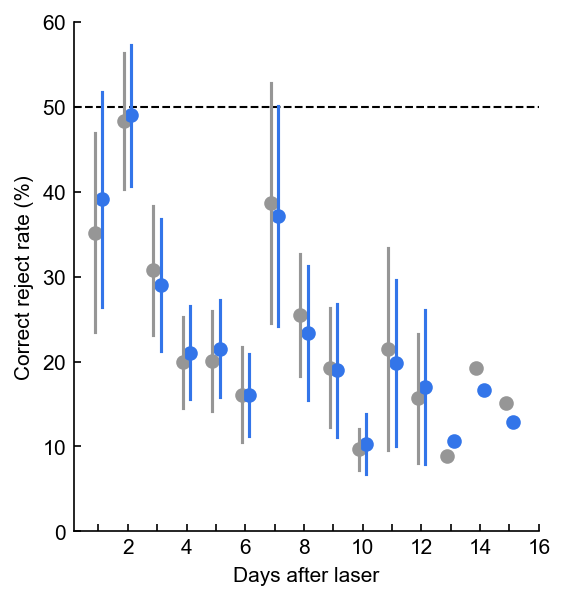

In [25]:
fig, ax = plt.subplots(figsize=(4,4.5))
wid = 0.125

for x in range(30):
    if len(creject_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(creject_post_laser_off[x])
    SEM_value = sem(creject_post_laser_off[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY)
    
for x in range(30):
    if len(creject_post_laser_on) <= 0:
        continue
        
    mean_value = np.mean(creject_post_laser_on[x])
    SEM_value = sem(creject_post_laser_on[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR)
    
ax.axhline(50,linestyle='--',color='k',zorder=-10,lw=1)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,'',14,'',16])

#ax.set_xlim(0.5,12.5)

ax.set_ylim([0,60])
#ax.set_yticks([40,45,50,55])
#ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5])
    
ax.set_ylabel('Correct reject rate (%)')
ax.set_xlabel('Days after laser')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin Creject rate after laser V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [99]:
### Create dataframe ###
days_with_data = []
for x in range(30):
    if len(creject_post_laser_on[x]) <= 0:
        continue
    days_with_data.append(x)
    
print(days_with_data)
    

days = None
context = None
perf = None

for day in days_with_data:
    this_day = len(creject_post_laser_on[day])*[str(day)] + len(creject_post_laser_off[day])*[str(day)]
    if days is None:
        days = this_day
    else:
        days = np.concatenate((days,this_day))
    
    this_context = len(creject_post_laser_on[day])*['ON'] + len(creject_post_laser_off[day])*['OFF']
    if context is None:
        context = this_context
    else:
        context = np.concatenate((context,this_context))
    
    this_perf = np.concatenate((creject_post_laser_on[day],creject_post_laser_off[day]))
    if perf is None:
        perf = this_perf
    else:
        perf = np.concatenate((perf,this_perf))

df = pd.DataFrame({"days": days, "context": context, "perf": perf})

### Anova ###
anova = pg.anova(data=df, dv='perf', between=['days','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='perf', between=['days','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "days * context"][["days","A", "B", "p-unc", "p-corr", "hedges"]])
#pairwise_mwu

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
           Source            SS     DF           MS         F     p-unc  \
0            days  16292.196838   15.0  1086.146456  2.519088  0.003166   
1         context      5.358986    1.0     5.358986  0.012429  0.911442   
2  days * context    139.108339   15.0     9.273889  0.021509  1.000000   
3        Residual  45703.655958  106.0   431.166566       NaN       NaN   

        np2  
0  0.262795  
1  0.000117  
2  0.003034  
3       NaN  

    days    A   B     p-unc  p-corr    hedges
121    1  OFF  ON  0.818182     1.0 -0.120833
122   10  OFF  ON  0.685714     1.0 -0.125754
123   11  OFF  ON  1.000000     1.0  0.071105
124   12  OFF  ON  1.000000     1.0 -0.063231
125   13  OFF  ON  1.000000     1.0       NaN
126   14  OFF  ON  1.000000     1.0       NaN
127   15  OFF  ON  1.000000     1.0       NaN
128   16  OFF  ON  1.000000     1.0       NaN
129    2  OFF  ON  0.937229     1.0 -0.030478
130    3  OFF  ON  0.804779     1.0  

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [31]:
dp_post_reversal_on[8]

[-0.6855490553440607,
 -0.07077493388776929,
 -0.0692903217990245,
 -0.6640189098038674]

In [32]:
dp_post_reversal_off[8]

[-0.0773059751789611,
 0.036772647120328406,
 -0.26002514528723075,
 -0.3421692299178958]

In [35]:
animalBehaviors['BS_119'].reversal+8

18

In [43]:
animalBehaviors['BS_100'].reversal+8

19

In [44]:
animalBehaviors['BS_123'].reversal+8

17

In [45]:
animalBehaviors['BS_163'].reversal+8

21

In [46]:
animalBehaviors['BS_174'].reversal+8

22

In [47]:
animalBehaviors['BS_100'].sessions[19]

namespace(animal='BS_100',
          session=19,
          files=array(['BS_100_19v1_opto.txt', 'BS_100_19v2_opto.txt',
                       'BS_100_19v3_opto.txt'], dtype='<U20'),
          blocknumbers=array([1, 2, 3]),
          type='postreversal',
          trials_per_session=array([300., 100.,  83.]),
          outcomes=0     1
                   1     1
                   2     1
                   3     1
                   4     1
                        ..
                   78    2
                   79    4
                   80    4
                   81    4
                   82    2
                   Name: outcome, Length: 483, dtype: int64,
          tones=0      5648
                1      5648
                2      5648
                3      5648
                4      5648
                      ...  
                78     5648
                79    11260
                80    11260
                81    11260
                82     5648
                Name: t

In [48]:
animalBehaviors['BS_123'].sessions[17]

namespace(animal='BS_123',
          session=17,
          files=array(['BS_123_17v1_opto.txt', 'BS_123_17v2_opto.txt'], dtype='<U20'),
          blocknumbers=array([1, 2]),
          type='postreversal',
          trials_per_session=array([247.,  54.]),
          outcomes=0     1
                   1     1
                   2     1
                   3     1
                   4     1
                        ..
                   49    1
                   50    3
                   51    4
                   52    2
                   53    2
                   Name: outcome, Length: 301, dtype: int64,
          tones=0      5648
                1      5648
                2      5648
                3      5648
                4      5648
                      ...  
                49     5648
                50    11260
                51    11260
                52     5648
                53     5648
                Name: tone, Length: 301, dtype: int64,
          laser=array([F

In [49]:
animalBehaviors['BS_163'].sessions[21]

namespace(animal='BS_163',
          session=21,
          files=array(['BS_163_21v1_opto.txt', 'BS_163_21v2_opto.txt',
                       'BS_163_21v3_opto.txt', 'BS_163_21v4_opto.txt'], dtype='<U20'),
          blocknumbers=array([1, 2, 3, 4]),
          type='postreversal',
          trials_per_session=array([300., 100.,  84.,  63.]),
          outcomes=0     1
                   1     1
                   2     1
                   3     1
                   4     1
                        ..
                   58    4
                   59    4
                   60    4
                   61    2
                   62    2
                   Name: outcome, Length: 547, dtype: int64,
          tones=0      5648
                1      5648
                2      5648
                3      5648
                4      5648
                      ...  
                58    11260
                59    11260
                60    11260
                61     5648
                62

In [50]:
animalBehaviors['BS_174'].sessions[22]

namespace(animal='BS_174',
          session=22,
          files=array(['BS_174_22v1_opto.txt', 'BS_174_22v2_opto.txt',
                       'BS_174_22v3_opto.txt'], dtype='<U20'),
          blocknumbers=array([1, 2, 3]),
          type='postreversal',
          trials_per_session=array([300., 100.,  55.]),
          outcomes=0     1
                   1     1
                   2     1
                   3     1
                   4     1
                        ..
                   50    2
                   51    3
                   52    2
                   53    3
                   54    3
                   Name: outcome, Length: 455, dtype: int64,
          tones=0      5648
                1      5648
                2      5648
                3      5648
                4      5648
                      ...  
                50     5648
                51    11260
                52     5648
                53    11260
                54    11260
                Name: t

In [59]:
list(outcomes)

[1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 1,


In [53]:
list(range(5))

[0, 1, 2, 3, 4]

In [78]:
def getTrialHistory(outcomes,trialIdx):
    outcomes = np.array(outcomes)
    
    previousTrials = list(range(trialIdx))
    previousTrials = np.flip(previousTrials)
    print(previousTrials)

    trialHistory = outcomes[previousTrials]
    return trialHistory

In [81]:
getTrialHistory(outcomes,7)

[6 5 4 3 2 1 0]


array([3, 1, 1, 1, 1, 1, 1], dtype=int64)

# Trial History -- Performance after N on/off trials

In [57]:
outcomes_after_n_off = dict()
outcomes_after_n_on = dict()

for animal in animals:
    print(animal)
    days = np.array(range(len(animalBehaviors[animal].sessions)))+1
    days_mask_rev = np.greater(days,animalBehaviors[animal].reversal)
    days_mask_cloud = np.less(days,animalBehaviors[animal].cloudiness)
    days_mask = np.logical_and(days_mask_rev,days_mask_cloud)
    days = days[days_mask]
    
    first_day_of_laser = np.Inf
    for day in animalBehaviors[animal].sessions:
        if hasattr(animalBehaviors[animal].sessions[day],'laser') and np.sum(animalBehaviors[animal].sessions[day].laser)>0:
            first_day_of_laser = min(first_day_of_laser,day)
            
    print(f"{animal}: {days}. First day of laser is {first_day_of_laser}")
    
    for day in days:
        
        outcomes = animalBehaviors[animal].sessions[day].outcomes
        break

BS_86
BS_86: [15 16 17 18 19]. First day of laser is 14
BS_100
BS_100: [12 13 14]. First day of laser is 11
BS_119
BS_119: [11 12 13 14 15 16 17 18 19 20 21 22]. First day of laser is 10
BS_123
BS_123: [10 11 12 13 14 15 16 17 18 19]. First day of laser is 9
BS_128
BS_128: [ 7  8  9 10 11 12 13]. First day of laser is 4
BS_131
BS_131: [15 16 17 18 19 20 21 22 23 24 25]. First day of laser is 14
BS_163
BS_163: [14 15 16 17 18]. First day of laser is 3
BS_174
BS_174: [15 16 17 18 19 20 21 22 23]. First day of laser is 14


# Overall PC and DP

In [99]:
pc_OFF = []
pc_ON = []

dp_ON = []
dp_OFF = []

for animal in animals:
    print(animal)
    days = np.array(range(len(animalBehaviors[animal].sessions)))+1
    days_mask_rev = np.greater(days,animalBehaviors[animal].reversal)
    days_mask_cloud = np.less(days,animalBehaviors[animal].cloudiness)
    days_mask = np.logical_and(days_mask_rev,days_mask_cloud)
    days = days[days_mask]
    
    first_day_of_laser = np.Inf
    for day in animalBehaviors[animal].sessions:
        if hasattr(animalBehaviors[animal].sessions[day],'laser') and np.sum(animalBehaviors[animal].sessions[day].laser)>0:
            first_day_of_laser = min(first_day_of_laser,day)
            
    print(f"{animal}: {days}. First day of laser is {first_day_of_laser}")
    
    for day in days:
        session_outcomes = animalBehaviors[animal].sessions[day].outcomes
        outcomes_on = animalBehaviors[animal].sessions[day].outcomes[animalBehaviors[animal].sessions[day].laser]
        outcomes_off = animalBehaviors[animal].sessions[day].outcomes[np.logical_not(animalBehaviors[animal].sessions[day].laser)]
        
        pc,dp = ilep.pcdpFromOutcomes(outcomes_on)
        pc_ON.append(pc*100)
        dp_ON.append(dp)
        
        pc,dp = ilep.pcdpFromOutcomes(outcomes_off)
        pc_OFF.append(pc*100)
        dp_OFF.append(dp)

BS_86
BS_86: [15 16 17 18 19]. First day of laser is 14
BS_100
BS_100: [12 13 14]. First day of laser is 11
BS_119
BS_119: [11 12 13 14 15 16 17 18 19 20 21 22]. First day of laser is 10
BS_123
BS_123: [10 11 12 13 14 15 16 17 18 19]. First day of laser is 9
BS_128
BS_128: [ 7  8  9 10 11 12 13]. First day of laser is 4
BS_131
BS_131: [15 16 17 18 19 20 21 22 23 24 25]. First day of laser is 14
BS_163
BS_163: [14 15 16 17 18]. First day of laser is 3
BS_174
BS_174: [15 16 17 18 19 20 21 22 23]. First day of laser is 14


In [151]:
pc_early = []
pc_expert = []

dp_early = []
dp_expert = []

for animal in ephys_animals:
    print(animal)
    
    for day in learning_phases[animal].post_early_days:
        dp,pc = ilep.getPCDPfromBehavior(animalBehaviors,animal,[day],[])
        pc_early.append(pc*100)
        dp_early.append(dp)
        
    for day in learning_phases[animal].post_expert_days:
        dp,pc = ilep.getPCDPfromBehavior(animalBehaviors,animal,[day],[day])
        pc_expert.append(pc*100)
        dp_expert.append(dp)

BS_40
BS_41
BS_42
BS_49
BS_50
BS_51
BS_56
BS_59
BS_67
BS_70
BS_72
BS_87
BS_108
DS_15
DS_19


In [104]:
sem(pc_OFF)

0.6415166949021586

In [119]:
np.mean(pc_early)

49.435361734079784

In [101]:
np.mean(pc_OFF)

49.17425367133997

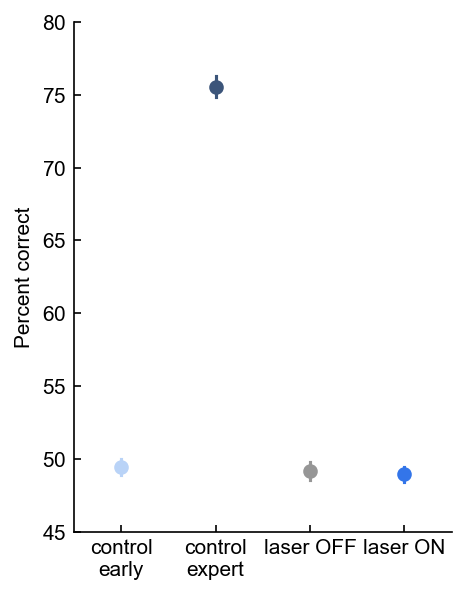

In [164]:
fig, ax = plt.subplots(figsize=(3.25,4.5))

ax.scatter([0],np.mean(pc_early),c=PHASE_COLORS[3])
ax.plot([0,0],[np.mean(pc_early)-sem(pc_early),np.mean(pc_early)+sem(pc_early)],color=PHASE_COLORS[3])
ax.scatter([1],np.mean(pc_expert),c=PHASE_COLORS[5])
ax.plot([1,1],[np.mean(pc_expert)-sem(pc_expert),np.mean(pc_expert)+sem(pc_expert)],color=PHASE_COLORS[5])

ax.scatter([2],np.mean(pc_OFF),c=GOOD_GREY)
ax.plot([2,2],[np.mean(pc_OFF)-sem(pc_OFF),np.mean(pc_OFF)+sem(pc_OFF)],color=GOOD_GREY)
ax.scatter([3],np.mean(pc_ON),c=LASER_COLOR)
ax.plot([3,3],[np.mean(pc_ON)-sem(pc_ON),np.mean(pc_ON)+sem(pc_ON)],color=LASER_COLOR)


ax.set_xlim([-0.5,3.5])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['control\nearly','control\nexpert','laser OFF','laser ON'])

#ax.set_ylim([45,55])
ax.set_ylim([45,80])
ylab = ax.set_ylabel('Percent correct')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall PC V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(ylab,), bbox_inches='tight')

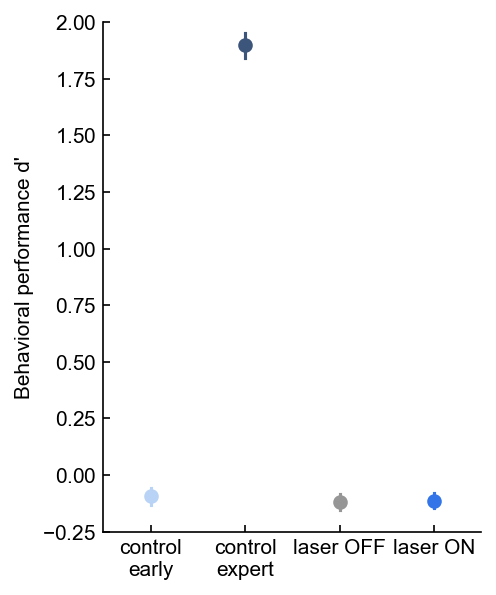

In [165]:
fig, ax = plt.subplots(figsize=(3.25,4.5))

ax.scatter([0],np.mean(dp_early),c=PHASE_COLORS[3])
ax.plot([0,0],[np.mean(dp_early)-sem(dp_early),np.mean(dp_early)+sem(dp_early)],color=PHASE_COLORS[3])
ax.scatter([1],np.mean(dp_expert),c=PHASE_COLORS[5])
ax.plot([1,1],[np.mean(dp_expert)-sem(dp_expert),np.mean(dp_expert)+sem(dp_expert)],color=PHASE_COLORS[5])

ax.scatter([2],np.mean(dp_OFF),c=GOOD_GREY)
ax.plot([2,2],[np.mean(dp_OFF)-sem(dp_OFF),np.mean(dp_OFF)+sem(dp_OFF)],color=GOOD_GREY)
ax.scatter([3],np.mean(dp_ON),c=LASER_COLOR)
ax.plot([3,3],[np.mean(dp_ON)-sem(dp_ON),np.mean(dp_ON)+sem(dp_ON)],color=LASER_COLOR)


ax.set_xlim([-0.5,3.5])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['control\nearly','control\nexpert','laser OFF','laser ON'])

#ax.set_ylim([45,55])
ax.set_ylim([-0.25,2.0])
ylab = ax.set_ylabel('Behavioral performance d\'')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall DP V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(ylab,), bbox_inches='tight')

In [103]:
mannwhitneyu(pc_ON,pc_OFF)

MannwhitneyuResult(statistic=1818.5, pvalue=0.6066451879800687)

In [93]:
mannwhitneyu(dp_ON,dp_OFF)

MannwhitneyuResult(statistic=1971.0, pvalue=0.8084905365045157)

In [158]:
mannwhitneyu(pc_early,pc_OFF)

MannwhitneyuResult(statistic=array([1850.]), pvalue=array([0.96119526]))

In [159]:
mannwhitneyu(pc_early,pc_ON)

MannwhitneyuResult(statistic=array([1957.5]), pvalue=array([0.61934241]))

In [160]:
mannwhitneyu(dp_early,dp_OFF)

MannwhitneyuResult(statistic=array([1987.]), pvalue=array([0.5170987]))

In [161]:
mannwhitneyu(dp_early,dp_ON)

MannwhitneyuResult(statistic=array([1912.]), pvalue=array([0.79198129]))

In [162]:
mannwhitneyu(dp_expert,dp_OFF)

MannwhitneyuResult(statistic=array([4092.]), pvalue=array([1.79523827e-22]))

# Opsin reaction time -- summary statistics

In [205]:
reaction_time_on = [np.nan]*30
for d in range(30):
    reaction_time_on[d] = None
reaction_time_off = [np.nan]*30
for d in range(30):
    reaction_time_off[d] = None

    

for animal in tqdm(animals):
    print(animal)
    days = np.array(range(len(animalBehaviors[animal].sessions)))+1
    days_mask_rev = np.greater(days,animalBehaviors[animal].reversal)
    days_mask_cloud = np.less(days,animalBehaviors[animal].cloudiness)
    days_mask = np.logical_and(days_mask_rev,days_mask_cloud)
    days = days[days_mask]
    
    first_day_of_laser = np.Inf
    for day in animalBehaviors[animal].sessions:
        if hasattr(animalBehaviors[animal].sessions[day],'laser') and np.sum(animalBehaviors[animal].sessions[day].laser)>0:
            first_day_of_laser = min(first_day_of_laser,day)
            
    print(f"{animal}: {days}. First day of laser is {first_day_of_laser}")
    
    for session in os.listdir(ops_directory):
        sessionfile = ilep.loadSessionCached(ops_directory,session)
        
        if sessionfile.meta.animal != animal:
            continue
        if sessionfile.meta.region != 'AC':
            continue
        day = sessionfile.meta.day_of_training - animalBehaviors[animal].reversal
        print(f"{animal} day {day}: days is {days}")
        if sessionfile.meta.day_of_training not in days:
            continue
            
        all_conditions = ilep.getAllConditions(sessionfile,None)
        trials = all_conditions['laser_on_go'].trials
        reaction_times = (sessionfile.trials.response[trials] - sessionfile.trials.starts[trials]) / sessionfile.meta.fs * 1000
#         reaction_times = np.mean(reaction_times)
        if reaction_time_on[day] is None:
            reaction_time_on[day] = reaction_times
        else:
            reaction_time_on[day] = np.concatenate((reaction_time_on[day],reaction_times))
            
        all_conditions = ilep.getAllConditions(sessionfile,None)
        trials = all_conditions['laser_off_go'].trials
        reaction_times = (sessionfile.trials.response[trials] - sessionfile.trials.starts[trials]) / sessionfile.meta.fs * 1000
#         reaction_times = np.mean(reaction_times)
        if reaction_time_off[day] is None:
            reaction_time_off[day] = reaction_times
        else:
            reaction_time_off[day] = np.concatenate((reaction_time_off[day],reaction_times))

  0%|          | 0/8 [00:00<?, ?it/s]

BS_86
BS_86: [15 16 17 18 19]. First day of laser is 14
BS_86 day 9: days is [15 16 17 18 19]
BS_86 day 10: days is [15 16 17 18 19]
BS_86 day 0: days is [15 16 17 18 19]
BS_86 day 1: days is [15 16 17 18 19]
BS_86 day 2: days is [15 16 17 18 19]
BS_86 day 3: days is [15 16 17 18 19]
BS_86 day 4: days is [15 16 17 18 19]
BS_86 day 5: days is [15 16 17 18 19]
BS_86 day 6: days is [15 16 17 18 19]
BS_86 day 7: days is [15 16 17 18 19]
BS_86 day 8: days is [15 16 17 18 19]


 12%|█▎        | 1/8 [00:01<00:12,  1.84s/it]

BS_100
BS_100: [12 13 14]. First day of laser is 11
BS_100 day 0: days is [12 13 14]


 25%|██▌       | 2/8 [00:02<00:08,  1.34s/it]

BS_119
BS_119: [11 12 13 14 15 16 17 18 19 20 21 22]. First day of laser is 10
BS_119 day 0: days is [11 12 13 14 15 16 17 18 19 20 21 22]
BS_119 day 1: days is [11 12 13 14 15 16 17 18 19 20 21 22]
BS_119 day 2: days is [11 12 13 14 15 16 17 18 19 20 21 22]
BS_119 day 3: days is [11 12 13 14 15 16 17 18 19 20 21 22]
BS_119 day 4: days is [11 12 13 14 15 16 17 18 19 20 21 22]
BS_119 day 5: days is [11 12 13 14 15 16 17 18 19 20 21 22]


 38%|███▊      | 3/8 [00:04<00:07,  1.53s/it]

BS_123
BS_123: [10 11 12 13 14 15 16 17 18 19]. First day of laser is 9
BS_123 day 0: days is [10 11 12 13 14 15 16 17 18 19]
BS_123 day 1: days is [10 11 12 13 14 15 16 17 18 19]
BS_123 day 2: days is [10 11 12 13 14 15 16 17 18 19]
BS_123 day 3: days is [10 11 12 13 14 15 16 17 18 19]
BS_123 day 4: days is [10 11 12 13 14 15 16 17 18 19]
BS_123 day 5: days is [10 11 12 13 14 15 16 17 18 19]
BS_123 day 6: days is [10 11 12 13 14 15 16 17 18 19]
BS_123 day 11: days is [10 11 12 13 14 15 16 17 18 19]


 50%|█████     | 4/8 [00:06<00:06,  1.74s/it]

BS_128
BS_128: [ 7  8  9 10 11 12 13]. First day of laser is 4
BS_128 day 7: days is [ 7  8  9 10 11 12 13]
BS_128 day 8: days is [ 7  8  9 10 11 12 13]
BS_128 day -2: days is [ 7  8  9 10 11 12 13]
BS_128 day -1: days is [ 7  8  9 10 11 12 13]
BS_128 day 0: days is [ 7  8  9 10 11 12 13]
BS_128 day 1: days is [ 7  8  9 10 11 12 13]
BS_128 day 2: days is [ 7  8  9 10 11 12 13]
BS_128 day 3: days is [ 7  8  9 10 11 12 13]
BS_128 day 4: days is [ 7  8  9 10 11 12 13]
BS_128 day 5: days is [ 7  8  9 10 11 12 13]
BS_128 day 6: days is [ 7  8  9 10 11 12 13]


 62%|██████▎   | 5/8 [00:08<00:05,  1.87s/it]

BS_131
BS_131: [15 16 17 18 19 20 21 22 23 24 25]. First day of laser is 14
BS_131 day 0: days is [15 16 17 18 19 20 21 22 23 24 25]
BS_131 day 1: days is [15 16 17 18 19 20 21 22 23 24 25]
BS_131 day 2: days is [15 16 17 18 19 20 21 22 23 24 25]
BS_131 day 3: days is [15 16 17 18 19 20 21 22 23 24 25]
BS_131 day 4: days is [15 16 17 18 19 20 21 22 23 24 25]
BS_131 day 5: days is [15 16 17 18 19 20 21 22 23 24 25]
BS_131 day 6: days is [15 16 17 18 19 20 21 22 23 24 25]
BS_131 day 7: days is [15 16 17 18 19 20 21 22 23 24 25]


 75%|███████▌  | 6/8 [00:10<00:03,  1.98s/it]

BS_163
BS_163: [14 15 16 17 18]. First day of laser is 3
BS_163 day 1: days is [14 15 16 17 18]
BS_163 day -10: days is [14 15 16 17 18]
BS_163 day -9: days is [14 15 16 17 18]
BS_163 day -8: days is [14 15 16 17 18]
BS_163 day -7: days is [14 15 16 17 18]
BS_163 day -4: days is [14 15 16 17 18]
BS_163 day -3: days is [14 15 16 17 18]
BS_163 day -2: days is [14 15 16 17 18]
BS_163 day -1: days is [14 15 16 17 18]
BS_163 day 0: days is [14 15 16 17 18]


 88%|████████▊ | 7/8 [00:12<00:01,  1.72s/it]

BS_174
BS_174: [15 16 17 18 19 20 21 22 23]. First day of laser is 14
BS_174 day 0: days is [15 16 17 18 19 20 21 22 23]
BS_174 day 1: days is [15 16 17 18 19 20 21 22 23]
BS_174 day 2: days is [15 16 17 18 19 20 21 22 23]
BS_174 day 9: days is [15 16 17 18 19 20 21 22 23]


100%|██████████| 8/8 [00:13<00:00,  1.70s/it]


In [210]:
reaction_time_control = [np.nan]*30
for d in range(30):
    reaction_time_control[d] = None

    

for animal in tqdm(ephys_animals):
    print(animal)
    
    for session in os.listdir(act_directory):
        sessionfile = ilep.loadSessionCached(act_directory,session)
        
        if sessionfile.meta.animal != animal:
            continue
        if sessionfile.meta.region != 'AC':
            continue
        day = sessionfile.meta.day_of_training - animalBehaviors[animal].reversal
        print(f"{animal} day {day}: days is {days}")
        if day <= 0:
            continue
            
        all_conditions = ilep.getAllConditions(sessionfile,None)
        trials = all_conditions['go'].trials
        reaction_times = (sessionfile.trials.response[trials] - sessionfile.trials.starts[trials]) / sessionfile.meta.fs * 1000
        if reaction_time_control[day] is None:
            reaction_time_control[day] = reaction_times
        else:
            reaction_time_control[day] = np.concatenate((reaction_time_control[day],reaction_times))
            
    

  0%|          | 0/15 [00:00<?, ?it/s]

BS_40
BS_40 day -4: days is [15 16 17 18 19 20 21 22 23]
BS_40 day -3: days is [15 16 17 18 19 20 21 22 23]
BS_40 day -2: days is [15 16 17 18 19 20 21 22 23]
BS_40 day -1: days is [15 16 17 18 19 20 21 22 23]
BS_40 day 0: days is [15 16 17 18 19 20 21 22 23]
BS_40 day 5: days is [15 16 17 18 19 20 21 22 23]
BS_40 day 6: days is [15 16 17 18 19 20 21 22 23]
BS_40 day 8: days is [15 16 17 18 19 20 21 22 23]
BS_40 day 11: days is [15 16 17 18 19 20 21 22 23]
BS_40 day 13: days is [15 16 17 18 19 20 21 22 23]
BS_40 day 14: days is [15 16 17 18 19 20 21 22 23]
BS_40 day -12: days is [15 16 17 18 19 20 21 22 23]
BS_40 day -11: days is [15 16 17 18 19 20 21 22 23]
BS_40 day -10: days is [15 16 17 18 19 20 21 22 23]
BS_40 day -9: days is [15 16 17 18 19 20 21 22 23]
BS_40 day -8: days is [15 16 17 18 19 20 21 22 23]
BS_40 day -7: days is [15 16 17 18 19 20 21 22 23]
BS_40 day -6: days is [15 16 17 18 19 20 21 22 23]


  7%|▋         | 1/15 [00:08<01:54,  8.17s/it]

BS_41
BS_41 day 13: days is [15 16 17 18 19 20 21 22 23]
BS_41 day 11: days is [15 16 17 18 19 20 21 22 23]
BS_41 day 0: days is [15 16 17 18 19 20 21 22 23]
BS_41 day 1: days is [15 16 17 18 19 20 21 22 23]
BS_41 day 2: days is [15 16 17 18 19 20 21 22 23]
BS_41 day 3: days is [15 16 17 18 19 20 21 22 23]
BS_41 day 4: days is [15 16 17 18 19 20 21 22 23]
BS_41 day 5: days is [15 16 17 18 19 20 21 22 23]
BS_41 day 6: days is [15 16 17 18 19 20 21 22 23]
BS_41 day 8: days is [15 16 17 18 19 20 21 22 23]
BS_41 day 9: days is [15 16 17 18 19 20 21 22 23]


 13%|█▎        | 2/15 [00:16<01:46,  8.20s/it]

BS_42
BS_42 day 10: days is [15 16 17 18 19 20 21 22 23]
BS_42 day 11: days is [15 16 17 18 19 20 21 22 23]
BS_42 day 0: days is [15 16 17 18 19 20 21 22 23]
BS_42 day 1: days is [15 16 17 18 19 20 21 22 23]
BS_42 day 2: days is [15 16 17 18 19 20 21 22 23]
BS_42 day 3: days is [15 16 17 18 19 20 21 22 23]
BS_42 day 4: days is [15 16 17 18 19 20 21 22 23]
BS_42 day 5: days is [15 16 17 18 19 20 21 22 23]
BS_42 day 7: days is [15 16 17 18 19 20 21 22 23]
BS_42 day 8: days is [15 16 17 18 19 20 21 22 23]
BS_42 day 9: days is [15 16 17 18 19 20 21 22 23]


 20%|██        | 3/15 [00:24<01:38,  8.23s/it]

BS_49
BS_49 day -3: days is [15 16 17 18 19 20 21 22 23]
BS_49 day -1: days is [15 16 17 18 19 20 21 22 23]
BS_49 day 0: days is [15 16 17 18 19 20 21 22 23]
BS_49 day 1: days is [15 16 17 18 19 20 21 22 23]
BS_49 day 2: days is [15 16 17 18 19 20 21 22 23]
BS_49 day 4: days is [15 16 17 18 19 20 21 22 23]
BS_49 day -13: days is [15 16 17 18 19 20 21 22 23]
BS_49 day -12: days is [15 16 17 18 19 20 21 22 23]
BS_49 day -9: days is [15 16 17 18 19 20 21 22 23]
BS_49 day -8: days is [15 16 17 18 19 20 21 22 23]
BS_49 day -7: days is [15 16 17 18 19 20 21 22 23]
BS_49 day -6: days is [15 16 17 18 19 20 21 22 23]
BS_49 day -4: days is [15 16 17 18 19 20 21 22 23]


 27%|██▋       | 4/15 [00:32<01:29,  8.11s/it]

BS_50
BS_50 day 0: days is [15 16 17 18 19 20 21 22 23]
BS_50 day 1: days is [15 16 17 18 19 20 21 22 23]
session BS_50_11_AC_9-23-2021 clust None tried to load saved active trials but failed. Error: 13
session BS_50_11_AC_9-23-2021 clust None tried to load saved active trials but failed. Error: 13
session BS_50_11_AC_9-23-2021 clust None tried to load saved active trials but failed. Error: 13
session BS_50_11_AC_9-23-2021 clust None tried to load saved active trials but failed. Error: 13
session BS_50_11_AC_9-23-2021 clust None tried to load saved active trials but failed. Error: 13
session BS_50_11_AC_9-23-2021 clust None tried to load saved active trials but failed. Error: 13
session BS_50_11_AC_9-23-2021 clust None tried to load saved active trials but failed. Error: 13
session BS_50_11_AC_9-23-2021 clust None tried to load saved active trials but failed. Error: 13
session BS_50_11_AC_9-23-2021 clust None tried to load saved active trials but failed. Error: 13
session BS_50_11_AC_9

 33%|███▎      | 5/15 [00:40<01:20,  8.04s/it]

BS_51
BS_51 day 13: days is [15 16 17 18 19 20 21 22 23]
BS_51 day 14: days is [15 16 17 18 19 20 21 22 23]
session BS_51_3_AC_10-15-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_51_3_AC_10-15-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_51_3_AC_10-15-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_51_3_AC_10-15-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_51_3_AC_10-15-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_51_3_AC_10-15-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_51_3_AC_10-15-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_51_3_AC_10-15-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_51_3_AC_10-15-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_51_3_AC_

 40%|████      | 6/15 [00:48<01:12,  8.03s/it]

BS_56
BS_56 day 8: days is [15 16 17 18 19 20 21 22 23]
BS_56 day 9: days is [15 16 17 18 19 20 21 22 23]
BS_56 day 10: days is [15 16 17 18 19 20 21 22 23]
BS_56 day 11: days is [15 16 17 18 19 20 21 22 23]
BS_56 day 14: days is [15 16 17 18 19 20 21 22 23]
session BS_56_7_AC_10-29-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust None tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust None tried to load saved a

 47%|████▋     | 7/15 [00:56<01:04,  8.04s/it]

BS_59


 53%|█████▎    | 8/15 [01:04<00:56,  8.02s/it]

BS_67
BS_67 day 5: days is [15 16 17 18 19 20 21 22 23]
BS_67 day 6: days is [15 16 17 18 19 20 21 22 23]
BS_67 day 7: days is [15 16 17 18 19 20 21 22 23]


 60%|██████    | 9/15 [01:12<00:47,  8.00s/it]

BS_70
BS_70 day 7: days is [15 16 17 18 19 20 21 22 23]
BS_70 day 8: days is [15 16 17 18 19 20 21 22 23]
BS_70 day 9: days is [15 16 17 18 19 20 21 22 23]
BS_70 day 10: days is [15 16 17 18 19 20 21 22 23]
BS_70 day -3: days is [15 16 17 18 19 20 21 22 23]
BS_70 day -1: days is [15 16 17 18 19 20 21 22 23]
BS_70 day 0: days is [15 16 17 18 19 20 21 22 23]
BS_70 day 1: days is [15 16 17 18 19 20 21 22 23]
BS_70 day 2: days is [15 16 17 18 19 20 21 22 23]
BS_70 day 3: days is [15 16 17 18 19 20 21 22 23]
BS_70 day 4: days is [15 16 17 18 19 20 21 22 23]
BS_70 day 5: days is [15 16 17 18 19 20 21 22 23]


 67%|██████▋   | 10/15 [01:20<00:40,  8.02s/it]

BS_72
BS_72 day 8: days is [15 16 17 18 19 20 21 22 23]
BS_72 day 9: days is [15 16 17 18 19 20 21 22 23]
BS_72 day 10: days is [15 16 17 18 19 20 21 22 23]
BS_72 day 12: days is [15 16 17 18 19 20 21 22 23]
BS_72 day -2: days is [15 16 17 18 19 20 21 22 23]
BS_72 day -1: days is [15 16 17 18 19 20 21 22 23]
BS_72 day 0: days is [15 16 17 18 19 20 21 22 23]
BS_72 day 1: days is [15 16 17 18 19 20 21 22 23]
BS_72 day 2: days is [15 16 17 18 19 20 21 22 23]
BS_72 day 3: days is [15 16 17 18 19 20 21 22 23]
BS_72 day 4: days is [15 16 17 18 19 20 21 22 23]
BS_72 day 6: days is [15 16 17 18 19 20 21 22 23]
BS_72 day 7: days is [15 16 17 18 19 20 21 22 23]


 73%|███████▎  | 11/15 [01:28<00:32,  8.08s/it]

BS_87
BS_87 day 7: days is [15 16 17 18 19 20 21 22 23]
BS_87 day 8: days is [15 16 17 18 19 20 21 22 23]
BS_87 day 9: days is [15 16 17 18 19 20 21 22 23]
BS_87 day -2: days is [15 16 17 18 19 20 21 22 23]
BS_87 day -1: days is [15 16 17 18 19 20 21 22 23]
BS_87 day 1: days is [15 16 17 18 19 20 21 22 23]
BS_87 day 2: days is [15 16 17 18 19 20 21 22 23]
BS_87 day 3: days is [15 16 17 18 19 20 21 22 23]
BS_87 day 4: days is [15 16 17 18 19 20 21 22 23]
BS_87 day 5: days is [15 16 17 18 19 20 21 22 23]
BS_87 day 6: days is [15 16 17 18 19 20 21 22 23]


 80%|████████  | 12/15 [01:36<00:24,  8.07s/it]

BS_108
BS_108 day -2: days is [15 16 17 18 19 20 21 22 23]
BS_108 day -1: days is [15 16 17 18 19 20 21 22 23]
BS_108 day 0: days is [15 16 17 18 19 20 21 22 23]
BS_108 day 1: days is [15 16 17 18 19 20 21 22 23]
BS_108 day 3: days is [15 16 17 18 19 20 21 22 23]


 87%|████████▋ | 13/15 [01:44<00:16,  8.05s/it]

DS_15
DS_15 day 12: days is [15 16 17 18 19 20 21 22 23]
DS_15 day 15: days is [15 16 17 18 19 20 21 22 23]
DS_15 day 14: days is [15 16 17 18 19 20 21 22 23]
DS_15 day 15: days is [15 16 17 18 19 20 21 22 23]
DS_15 day -1: days is [15 16 17 18 19 20 21 22 23]


 93%|█████████▎| 14/15 [01:52<00:08,  8.00s/it]

DS_19
DS_19 day 8: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 9: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 10: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 12: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 13: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 14: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 16: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 17: days is [15 16 17 18 19 20 21 22 23]
DS_19 day -1: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 18: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 0: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 1: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 2: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 3: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 4: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 5: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 6: days is [15 16 17 18 19 20 21 22 23]
DS_19 day 7: days is [15 16 17 18 19 20 21 22 23]


100%|██████████| 15/15 [02:01<00:00,  8.08s/it]


In [206]:
[len(l) for l in reaction_time_off if l is not None]

[933, 668, 734, 867, 692, 386, 269, 336]

In [207]:
[len(l) for l in reaction_time_on if l is not None]

[932, 649, 753, 854, 669, 421, 292, 314]

In [208]:
[len(l) for l in reaction_time_control if l is not None]

[321,
 352,
 433,
 358,
 394,
 335,
 393,
 253,
 364,
 375,
 152,
 206,
 179,
 263,
 204,
 177,
 152,
 130]

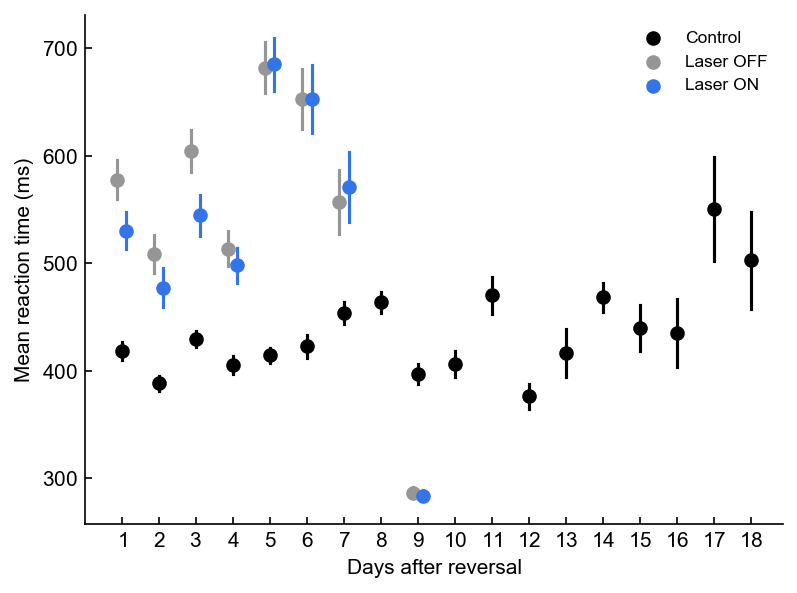

In [227]:
fig, ax = plt.subplots(figsize=(6,4.5))
wid = 0.125

for x in range(30):
    if reaction_time_control[x] is None:
        continue
        
    mean_value = np.mean(reaction_time_control[x])
    SEM_value = sem(reaction_time_control[x])
    
    ax.scatter(x-0*wid,mean_value,c='k')
    ax.plot([x-0*wid,x-0*wid],[mean_value-SEM_value,mean_value+SEM_value],c='k',zorder=-10)

for x in range(30):
    if reaction_time_on[x] is None:
        continue
        
    mean_value = np.mean(reaction_time_on[x])
    SEM_value = sem(reaction_time_on[x])
    
    ax.scatter(x-wid,mean_value,c=GOOD_GREY)
    ax.plot([x-wid,x-wid],[mean_value-SEM_value,mean_value+SEM_value],c=GOOD_GREY,zorder=-10)
    
for x in range(30):
    if reaction_time_off[x] is None:
        continue
        
    mean_value = np.mean(reaction_time_off[x])
    SEM_value = sem(reaction_time_off[x])
    
    ax.scatter(x+wid,mean_value,c=LASER_COLOR)
    ax.plot([x+wid,x+wid],[mean_value-SEM_value,mean_value+SEM_value],c=LASER_COLOR,zorder=-10)
    
ax.scatter([],[],c='k',label='Control')
ax.scatter([],[],c=GOOD_GREY,label='Laser OFF')
ax.scatter([],[],c=LASER_COLOR,label='Laser ON')
lgd = ax.legend(frameon=False)
    
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
# ax.set_xticklabels(['',2,'',4,'',6,'',8,'',10,'',12,'',14,'',16])

ax.set_ylabel('Mean reaction time (ms)')
ax.set_xlabel('Days after reversal')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin reaction time vs control V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [10]:
did_not_learn_animals

['BS_86', 'BS_100', 'BS_119', 'BS_123', 'BS_128', 'BS_131', 'BS_163', 'BS_174']

# Current Figures

# Exposure phases

In [151]:
expert_days_n = []

dp_early_control = []
dp_late_control = []
dp_expert_control = []
dp_early_on = []
dp_late_on = []
dp_expert_on = []
dp_early_off = []
dp_late_off = []
dp_expert_off = []

pc_early_control = []
pc_late_control = []
pc_expert_control = []
pc_early_on = []
pc_late_on = []
pc_expert_on = []
pc_early_off = []
pc_late_off = []
pc_expert_off = []

hit_early_control = []
hit_late_control = []
hit_expert_control = []
hit_early_on = []
hit_late_on = []
hit_expert_on = []
hit_early_off = []
hit_late_off = []
hit_expert_off = []

miss_early_control = []
miss_late_control = []
miss_expert_control = []
miss_early_on = []
miss_late_on = []
miss_expert_on = []
miss_early_off = []
miss_late_off = []
miss_expert_off = []

falarm_early_control = []
falarm_late_control = []
falarm_expert_control = []
falarm_early_on = []
falarm_late_on = []
falarm_expert_on = []
falarm_early_off = []
falarm_late_off = []
falarm_expert_off = []

creject_early_control = []
creject_late_control = []
creject_expert_control = []
creject_early_on = []
creject_late_on = []
creject_expert_on = []
creject_early_off = []
creject_late_off = []
creject_expert_off = []

go_rate_target_early_control = []
go_rate_target_late_control = []
go_rate_target_expert_control = []
go_rate_target_early_on = []
go_rate_target_late_on = []
go_rate_target_expert_on = []
go_rate_target_early_off = []
go_rate_target_late_off = []
go_rate_target_expert_off = []

go_rate_nontarget_early_control = []
go_rate_nontarget_late_control = []
go_rate_nontarget_expert_control = []
go_rate_nontarget_early_on = []
go_rate_nontarget_late_on = []
go_rate_nontarget_expert_on = []
go_rate_nontarget_early_off = []
go_rate_nontarget_late_off = []
go_rate_nontarget_expert_off = []

rxn_time_early_control = []
rxn_time_late_control = []
rxn_time_expert_control = []
rxn_time_early_opsin = []
rxn_time_late_opsin = []
rxn_time_expert_opsin = []

rxn_time_target_early_control = []
rxn_time_target_late_control = []
rxn_time_target_expert_control = []
rxn_time_target_early_opsin = []
rxn_time_target_late_opsin = []
rxn_time_target_expert_opsin = []

rxn_time_nontarget_early_control = []
rxn_time_nontarget_late_control = []
rxn_time_nontarget_expert_control = []
rxn_time_nontarget_early_opsin = []
rxn_time_nontarget_late_opsin = []
rxn_time_nontarget_expert_opsin = []

for animal in did_not_learn_animals:
    print(animal)
    
    animal_dp_early_on = []
    animal_dp_early_off = []
    animal_dp_late_on = []
    animal_dp_late_off = []
    animal_dp_expert_on = []
    animal_dp_expert_off = []
    
    animal_pc_early_on = []
    animal_pc_early_off = []
    animal_pc_late_on = []
    animal_pc_late_off = []
    animal_pc_expert_on = []
    animal_pc_expert_off = []
    
    animal_hit_early_on = []
    animal_hit_early_off = []
    animal_hit_late_on = []
    animal_hit_late_off = []
    animal_hit_expert_on = []
    animal_hit_expert_off = []
    
    animal_miss_early_on = []
    animal_miss_early_off = []
    animal_miss_late_on = []
    animal_miss_late_off = []
    animal_miss_expert_on = []
    animal_miss_expert_off = []
    
    animal_falarm_early_on = []
    animal_falarm_early_off = []
    animal_falarm_late_on = []
    animal_falarm_late_off = []
    animal_falarm_expert_on = []
    animal_falarm_expert_off = []
    
    animal_creject_early_on = []
    animal_creject_early_off = []
    animal_creject_late_on = []
    animal_creject_late_off = []
    animal_creject_expert_on = []
    animal_creject_expert_off = []
    
    animal_go_rate_target_early_on = []
    animal_go_rate_target_early_off = []
    animal_go_rate_target_late_on = []
    animal_go_rate_target_late_off = []
    animal_go_rate_target_expert_on = []
    animal_go_rate_target_expert_off = []
    
    animal_go_rate_nontarget_early_on = []
    animal_go_rate_nontarget_early_off = []
    animal_go_rate_nontarget_late_on = []
    animal_go_rate_nontarget_late_off = []
    animal_go_rate_nontarget_expert_on = []
    animal_go_rate_nontarget_expert_off = []
    
    animal_response_times_early_opsin = []
    animal_response_times_late_opsin = []
    animal_response_times_expert_opsin = []
    
    animal_response_times_target_early_opsin = []
    animal_response_times_target_late_opsin = []
    animal_response_times_target_expert_opsin = []
    
    animal_response_times_nontarget_early_opsin = []
    animal_response_times_nontarget_late_opsin = []
    animal_response_times_nontarget_expert_opsin = []

    days = np.array(range(len(animalBehaviors[animal].sessions)))+1
    days_mask_rev = np.greater(days,animalBehaviors[animal].reversal)
    days_mask_cloud = np.less(days,animalBehaviors[animal].cloudiness)
    days_mask = np.logical_and(days_mask_rev,days_mask_cloud)
    days = days[days_mask]
    
    for day in days:
        session_outcomes = animalBehaviors[animal].sessions[day].outcomes
        outcomes_on = animalBehaviors[animal].sessions[day].outcomes[animalBehaviors[animal].sessions[day].laser]
        outcomes_off = animalBehaviors[animal].sessions[day].outcomes[np.logical_not(animalBehaviors[animal].sessions[day].laser)]
        
        pc_on,dp_on = ilep.pcdpFromOutcomes(outcomes_on)
        pc_off,dp_off = ilep.pcdpFromOutcomes(outcomes_off)
        hit_on = np.sum(np.equal(outcomes_on,1))
        miss_on = np.sum(np.equal(outcomes_on,2))
        falarm_on = np.sum(np.equal(outcomes_on,3))
        creject_on = np.sum(np.equal(outcomes_on,4))
        hit_off = np.sum(np.equal(outcomes_off,1))
        miss_off = np.sum(np.equal(outcomes_off,2))
        falarm_off = np.sum(np.equal(outcomes_off,3))
        creject_off = np.sum(np.equal(outcomes_off,4))
        
        if (day - animalBehaviors[animal].reversal) <= 4:
            animal_dp_early_on.append(dp_on)
            animal_dp_early_off.append(dp_off)
            animal_pc_early_on.append(pc_on*100)
            animal_pc_early_off.append(pc_off*100)
            animal_hit_early_off.append(hit_off/(hit_off+miss_off)*100)
            animal_miss_early_off.append(miss_off/(hit_off+miss_off)*100)
            animal_falarm_early_off.append(falarm_off/(falarm_off+creject_off)*100)
            animal_creject_early_off.append(creject_off/(falarm_off+creject_off)*100)
            animal_hit_early_on.append(hit_on/(hit_on+miss_on)*100)
            animal_miss_early_on.append(miss_on/(hit_on+miss_on)*100)
            animal_falarm_early_on.append(falarm_on/(falarm_on+creject_on)*100)
            animal_creject_early_on.append(creject_on/(falarm_on+creject_on)*100)
            animal_response_times_early_opsin.append(get_response_times(animal,day,noTrim=False))
            animal_response_times_target_early_opsin.append(get_response_times_target(animal,day,noTrim=False))
            animal_response_times_nontarget_early_opsin.append(get_response_times_nontarget(animal,day,noTrim=False))
        elif (day - animalBehaviors[animal].reversal) <= 7:
            animal_dp_late_on.append(dp_on)
            animal_dp_late_off.append(dp_off)
            animal_pc_late_on.append(pc_on*100)
            animal_pc_late_off.append(pc_off*100)
            animal_hit_late_off.append(hit_off/(hit_off+miss_off)*100)
            animal_miss_late_off.append(miss_off/(hit_off+miss_off)*100)
            animal_falarm_late_off.append(falarm_off/(falarm_off+creject_off)*100)
            animal_creject_late_off.append(creject_off/(falarm_off+creject_off)*100)
            animal_hit_late_on.append(hit_on/(hit_on+miss_on)*100)
            animal_miss_late_on.append(miss_on/(hit_on+miss_on)*100)
            animal_falarm_late_on.append(falarm_on/(falarm_on+creject_on)*100)
            animal_creject_late_on.append(creject_on/(falarm_on+creject_on)*100)
            animal_response_times_early_opsin.append(get_response_times(animal,day,noTrim=False))
            animal_response_times_target_early_opsin.append(get_response_times_target(animal,day,noTrim=False))
            animal_response_times_nontarget_early_opsin.append(get_response_times_nontarget(animal,day,noTrim=False))
        elif (day - animalBehaviors[animal].reversal) > 7:
            animal_dp_expert_on.append(dp_on)
            animal_dp_expert_off.append(dp_off)
            animal_pc_expert_on.append(pc_on*100)
            animal_pc_expert_off.append(pc_off*100)
            animal_hit_expert_off.append(hit_off/(hit_off+miss_off)*100)
            animal_miss_expert_off.append(miss_off/(hit_off+miss_off)*100)
            animal_falarm_expert_off.append(falarm_off/(falarm_off+creject_off)*100)
            animal_creject_expert_off.append(creject_off/(falarm_off+creject_off)*100)
            animal_hit_expert_on.append(hit_on/(hit_on+miss_on)*100)
            animal_miss_expert_on.append(miss_on/(hit_on+miss_on)*100)
            animal_falarm_expert_on.append(falarm_on/(falarm_on+creject_on)*100)
            animal_creject_expert_on.append(creject_on/(falarm_on+creject_on)*100)
            animal_response_times_early_opsin.append(get_response_times(animal,day,noTrim=False))
            animal_response_times_target_early_opsin.append(get_response_times_target(animal,day,noTrim=False))
            animal_response_times_nontarget_early_opsin.append(get_response_times_nontarget(animal,day,noTrim=False))
            
    dp_early_on.append(np.mean(animal_dp_early_on))
    dp_late_on.append(np.mean(animal_dp_late_on))
    dp_expert_on.append(np.mean(animal_dp_expert_on))
    dp_early_off.append(np.mean(animal_dp_early_off))
    dp_late_off.append(np.mean(animal_dp_late_off))
    dp_expert_off.append(np.mean(animal_dp_expert_off))
    
    pc_early_on.append(np.mean(animal_pc_early_on))
    pc_late_on.append(np.mean(animal_pc_late_on))
    pc_expert_on.append(np.mean(animal_pc_expert_on))
    pc_early_off.append(np.mean(animal_pc_early_off))
    pc_late_off.append(np.mean(animal_pc_late_off))
    pc_expert_off.append(np.mean(animal_pc_expert_off))
    
    hit_early_on.append(np.mean(animal_hit_early_on))
    hit_late_on.append(np.mean(animal_hit_late_on))
    hit_expert_on.append(np.mean(animal_hit_expert_on))
    hit_early_off.append(np.mean(animal_hit_early_off))
    hit_late_off.append(np.mean(animal_hit_late_off))
    hit_expert_off.append(np.mean(animal_hit_expert_off))
    
    miss_early_on.append(np.mean(animal_miss_early_on))
    miss_late_on.append(np.mean(animal_miss_late_on))
    miss_expert_on.append(np.mean(animal_miss_expert_on))
    miss_early_off.append(np.mean(animal_miss_early_off))
    miss_late_off.append(np.mean(animal_miss_late_off))
    miss_expert_off.append(np.mean(animal_miss_expert_off))
    
    falarm_early_on.append(np.mean(animal_falarm_early_on))
    falarm_late_on.append(np.mean(animal_falarm_late_on))
    falarm_expert_on.append(np.mean(animal_falarm_expert_on))
    falarm_early_off.append(np.mean(animal_falarm_early_off))
    falarm_late_off.append(np.mean(animal_falarm_late_off))
    falarm_expert_off.append(np.mean(animal_falarm_expert_off))
    
    creject_early_on.append(np.mean(animal_creject_early_on))
    creject_late_on.append(np.mean(animal_creject_late_on))
    creject_expert_on.append(np.mean(animal_creject_expert_on))
    creject_early_off.append(np.mean(animal_creject_early_off))
    creject_late_off.append(np.mean(animal_creject_late_off))
    creject_expert_off.append(np.mean(animal_creject_expert_off))
    
    rxn_time_early_opsin.append(np.mean(animal_response_times_early_opsin))
    rxn_time_late_opsin.append(np.mean(animal_response_times_late_opsin))
    rxn_time_expert_opsin.append(np.mean(animal_response_times_expert_opsin))
    
    rxn_time_target_early_opsin.append(np.mean(animal_response_times_target_early_opsin))
    rxn_time_target_late_opsin.append(np.mean(animal_response_times_target_late_opsin))
    rxn_time_target_expert_opsin.append(np.mean(animal_response_times_target_expert_opsin))
    
    rxn_time_nontarget_early_opsin.append(np.mean(animal_response_times_nontarget_early_opsin))
    rxn_time_nontarget_late_opsin.append(np.mean(animal_response_times_nontarget_late_opsin))
    rxn_time_nontarget_expert_opsin.append(np.mean(animal_response_times_nontarget_expert_opsin))
    
for animal in opsin_control_animals:
    print(animal)
    
    animal_dp_early_control = []
    animal_dp_late_control = []
    animal_dp_expert_control = []
    
    animal_pc_early_control = []
    animal_pc_late_control = []
    animal_pc_expert_control = []
    
    animal_hit_early_control = []
    animal_hit_late_control = []
    animal_hit_expert_control = []
    
    animal_miss_early_control = []
    animal_miss_late_control = []
    animal_miss_expert_control = []
    
    animal_falarm_early_control = []
    animal_falarm_late_control = []
    animal_falarm_expert_control = []
    
    animal_creject_early_control = []
    animal_creject_late_control = []
    animal_creject_expert_control = []
    
    animal_response_times_early_control = []
    animal_response_times_late_control = []
    animal_response_times_expert_control = []
    
    animal_response_times_target_early_control = []
    animal_response_times_target_late_control = []
    animal_response_times_target_expert_control = []
    
    animal_response_times_nontarget_early_control = []
    animal_response_times_nontarget_late_control = []
    animal_response_times_nontarget_expert_control = []
    
    days = np.array(range(len(animalBehaviors[animal].sessions)))+1
    for day in days:
        ##########
        if animal == 'DS_15' and day == 28: #For some reason DS_15 skips day 28. Doesn't really matter but this removes the error
            day = 29
        ##########
        
        try:
            outcomes = np.array(animalBehaviors[animal].sessions[day].outcomes)
            #We will trim for active trials only on expert days
            exceptionTrials = ilep.exceptionsForSpecificBehaviorDays(animal,day)
            if not exceptionTrials is None:
                valid_trials_mask = exceptionTrials
                outcomes = outcomes[valid_trials_mask]
            elif day in learning_phases[animal].post_expert_days:
                valid_trials_mask = ilep.getActiveTrials(outcomes)
                outcomes = outcomes[valid_trials_mask]
        except Exception as e:
            print(f"{animal} session {day}: {e}")
            continue

        pc,dp = ilep.pcdpFromOutcomes(outcomes)
        hit = np.sum(np.equal(outcomes,1))
        miss = np.sum(np.equal(outcomes,2))
        falarm = np.sum(np.equal(outcomes,3))
        creject = np.sum(np.equal(outcomes,4))

        if day in learning_phases[animal].post_early_days:
            animal_dp_early_control.append(dp)
            animal_pc_early_control.append(pc*100)
            animal_hit_early_control.append(hit/(hit+miss)*100)
            animal_miss_early_control.append(miss/(hit+miss)*100)
            animal_falarm_early_control.append(falarm/(falarm+creject)*100)
            animal_creject_early_control.append(creject/(falarm+creject)*100)
            animal_response_times_early_control.append(get_response_times(animal,day,noTrim=False))
            animal_response_times_target_early_control.append(get_response_times_target(animal,day,noTrim=False))
            animal_response_times_nontarget_early_control.append(get_response_times_nontarget(animal,day,noTrim=False))
        elif day in learning_phases[animal].post_late_days:
            animal_dp_late_control.append(dp)
            animal_pc_late_control.append(pc*100)
            animal_hit_late_control.append(hit/(hit+miss)*100)
            animal_miss_late_control.append(miss/(hit+miss)*100)
            animal_falarm_late_control.append(falarm/(falarm+creject)*100)
            animal_creject_late_control.append(creject/(falarm+creject)*100)
            animal_response_times_late_control.append(get_response_times(animal,day,noTrim=False))
            animal_response_times_target_late_control.append(get_response_times_target(animal,day,noTrim=False))
            animal_response_times_nontarget_late_control.append(get_response_times_nontarget(animal,day,noTrim=False))
        elif day in learning_phases[animal].post_expert_days:
            animal_dp_expert_control.append(dp)
            animal_pc_expert_control.append(pc*100)
            animal_hit_expert_control.append(hit/(hit+miss)*100)
            animal_miss_expert_control.append(miss/(hit+miss)*100)
            animal_falarm_expert_control.append(falarm/(falarm+creject)*100)
            animal_creject_expert_control.append(creject/(falarm+creject)*100)
            animal_response_times_expert_control.append(get_response_times(animal,day,noTrim=False))
            animal_response_times_target_expert_control.append(get_response_times_target(animal,day,noTrim=False))
            animal_response_times_nontarget_expert_control.append(get_response_times_nontarget(animal,day,noTrim=False))
            
    expert_days_n.append(len(animal_dp_expert_control))

    dp_early_control.append(np.mean(animal_dp_early_control))
    dp_late_control.append(np.mean(animal_dp_late_control))
    dp_expert_control.append(np.mean(animal_dp_expert_control))
    
    pc_early_control.append(np.mean(animal_pc_early_control))
    pc_late_control.append(np.mean(animal_pc_late_control))
    pc_expert_control.append(np.mean(animal_pc_expert_control))
    
    hit_early_control.append(np.mean(animal_hit_early_control))
    hit_late_control.append(np.mean(animal_hit_late_control))
    hit_expert_control.append(np.mean(animal_hit_expert_control))
    
    miss_early_control.append(np.mean(animal_miss_early_control))
    miss_late_control.append(np.mean(animal_miss_late_control))
    miss_expert_control.append(np.mean(animal_miss_expert_control))
    
    falarm_early_control.append(np.mean(animal_falarm_early_control))
    falarm_late_control.append(np.mean(animal_falarm_late_control))
    falarm_expert_control.append(np.mean(animal_falarm_expert_control))
    
    creject_early_control.append(np.mean(animal_creject_early_control))
    creject_late_control.append(np.mean(animal_creject_late_control))
    creject_expert_control.append(np.mean(animal_creject_expert_control))
    
    rxn_time_early_control.append(np.mean(animal_response_times_early_control))
    rxn_time_late_control.append(np.mean(animal_response_times_late_control))
    rxn_time_expert_control.append(np.mean(animal_response_times_expert_control))
    
    rxn_time_target_early_control.append(np.mean(animal_response_times_target_early_control))
    rxn_time_target_late_control.append(np.mean(animal_response_times_target_late_control))
    rxn_time_target_expert_control.append(np.mean(animal_response_times_target_expert_control))
    
    rxn_time_nontarget_early_control.append(np.mean(animal_response_times_nontarget_early_control))
    rxn_time_nontarget_late_control.append(np.mean(animal_response_times_nontarget_late_control))
    rxn_time_nontarget_expert_control.append(np.mean(animal_response_times_nontarget_expert_control))

BS_86
BS_100
BS_119
BS_123
BS_128
BS_131
BS_163
BS_174
BS_40
BS_41


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_method

BS_42
BS_49
BS_50
BS_51
BS_56
BS_59
BS_67
BS_70
BS_72
BS_87
BS_108
DS_15
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
DS_19
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no response_time
no 

In [24]:
expert_days_n

[3, 7, 8, 1, 0, 4, 8, 7, 2, 1, 2, 3, 2, 7, 11, 4, 2]

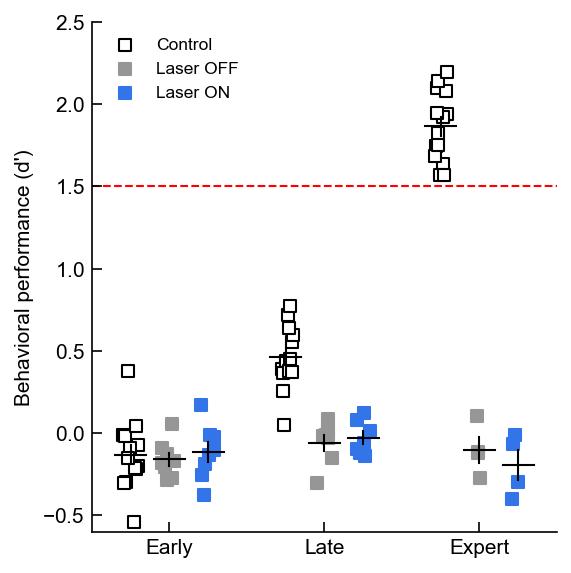

In [10]:
fig, ax = plt.subplots(figsize=(4,4.5))
data_on = [dp_early_on,dp_late_on,dp_expert_on]
data_off = [dp_early_off,dp_late_off,dp_expert_off]
data_control = [dp_early_control,dp_late_control,dp_expert_control]
labels = ['Early','Late','Expert']
numCon = 3

sz = 35
width = 0.1
x_off = 0.25

for idx,column in enumerate(data_control):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx - x_off
    ax.scatter(X,Y,s=sz,fc='white',ec='k',marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width-x_off,idx+width-x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx-x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
for idx,column in enumerate(data_off):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
    ax.scatter(X,Y,s=sz,color=GOOD_GREY,marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
for idx,column in enumerate(data_on):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx + x_off
    ax.scatter(X,Y,s=sz,color=LASER_COLOR,marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width+x_off,idx+width+x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx+x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
ax.scatter([],[],s=sz,fc='white',ec='k',marker='s',label='Control')
ax.scatter([],[],s=sz,color=GOOD_GREY,marker='s',label='Laser OFF')
ax.scatter([],[],s=sz,color=LASER_COLOR,marker='s',label='Laser ON')
lgd = ax.legend(frameon=False)
    
    
    
    
    
    
    
ax.set_xlim([-0.5,2.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

ax.set_ylim([-0.6,2.5])
ax.set_ylabel('Behavioral performance (d\')')

# rev = 2.5
# size = 0.3
# center = np.mean(ax.get_ylim())
# ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
# ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
# ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.axhline(1.5,linestyle='--',color='red',lw=1,zorder=-10)

ax.tick_params(length=5)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# ax.text(xtick_pos_pre, -0.8749628968456478, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
# ax.text(xtick_pos_post, -0.8749628968456478, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
# ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.485, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
# ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin performance over phases dprime V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

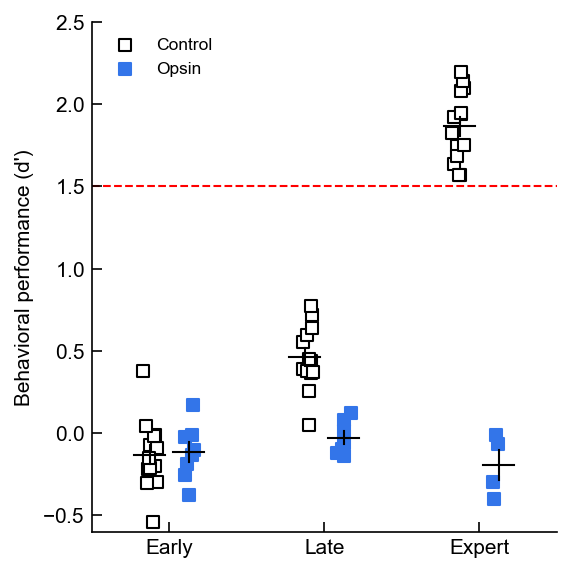

In [11]:
fig, ax = plt.subplots(figsize=(4,4.5))
data_on = [dp_early_on,dp_late_on,dp_expert_on]
data_off = [dp_early_off,dp_late_off,dp_expert_off]
data_control = [dp_early_control,dp_late_control,dp_expert_control]
labels = ['Early','Late','Expert']
numCon = 3

sz = 35
width = 0.1
x_off = 0.125

for idx,column in enumerate(data_control):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx - x_off
    ax.scatter(X,Y,s=sz,fc='white',ec='k',marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width-x_off,idx+width-x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx-x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
# for idx,column in enumerate(data_off):
#     Y = ilep.rmnan(column)
#     X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
#     ax.scatter(X,Y,s=sz,color=GOOD_GREY,marker='s')
    
#     mean = np.mean(Y)
#     SEM = sem(Y)
#     ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
#     ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
for idx,column in enumerate(data_on):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx + x_off
    ax.scatter(X,Y,s=sz,color=LASER_COLOR,marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width+x_off,idx+width+x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx+x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
ax.scatter([],[],s=sz,fc='white',ec='k',marker='s',label='Control')
# ax.scatter([],[],s=sz,color=GOOD_GREY,marker='s',label='Laser OFF')
ax.scatter([],[],s=sz,color=LASER_COLOR,marker='s',label='Opsin')
lgd = ax.legend(frameon=False)
    
    
    
    
    
    
    
ax.set_xlim([-0.5,2.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

ax.set_ylim([-0.6,2.5])
ax.set_ylabel('Behavioral performance (d\')')

# rev = 2.5
# size = 0.3
# center = np.mean(ax.get_ylim())
# ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
# ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
# ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.axhline(1.5,linestyle='--',color='red',lw=1,zorder=-10)

ax.tick_params(length=5)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# ax.text(xtick_pos_pre, -0.8749628968456478, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
# ax.text(xtick_pos_post, -0.8749628968456478, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
# ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.485, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
# ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin performance over phases dprime V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [12]:
phase = len(dp_early_control)*["early"] + len(dp_early_off)*["early"] \
    + len(dp_early_on)*["early"] + len(dp_late_control)*["late"] \
    + len(dp_late_off)*["late"] + len(dp_late_on)*["late"] \
    + len(dp_expert_control)*["expert"] + len(dp_expert_off)*["expert"] \
    + len(dp_expert_on)*["expert"] \

context = len(dp_early_control)*["control"] + len(dp_early_off)*["OFF"] \
    + len(dp_early_on)*["ON"] + len(dp_late_control)*["control"] \
    + len(dp_late_off)*["OFF"] + len(dp_late_on)*["ON"] \
    + len(dp_expert_control)*["control"] + len(dp_expert_off)*["OFF"] \
    + len(dp_expert_on)*["ON"] \

mod = (np.concatenate([dp_early_control, dp_early_off,
    dp_early_on, dp_late_control,
    dp_late_off, dp_late_on,
    dp_expert_control, dp_expert_off,
    dp_expert_on]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})


### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])

            Source         SS    DF        MS           F         p-unc  \
0            phase  16.210850   2.0  8.105425  250.187041  2.393719e-32   
1          context   9.862078   2.0  4.931039  152.204489  5.010944e-26   
2  phase * context  12.495495   4.0  3.123874   96.423414  1.697958e-27   
3         Residual   2.235425  69.0  0.032397         NaN           NaN   

        np2  
0  0.878814  
1  0.815216  
2  0.848249  
3       NaN  

     phase    A        B     p-unc    p-corr    hedges
6    early  OFF       ON  0.573737  0.901515 -0.306479
7    early  OFF  control  0.859620  0.901515 -0.154394
8    early   ON  control  0.804442  0.901515  0.076826
9   expert  OFF       ON  0.685714  0.901515  0.469952
10  expert  OFF  control  0.000654  0.001471 -9.202258
11  expert   ON  control  0.000654  0.001471 -9.433212
12    late  OFF       ON  0.901515  0.901515 -0.234000
13    late  OFF  control  0.000052  0.000464 -2.809542
14    late   ON  control  0.000103  0.000464 -2.739411


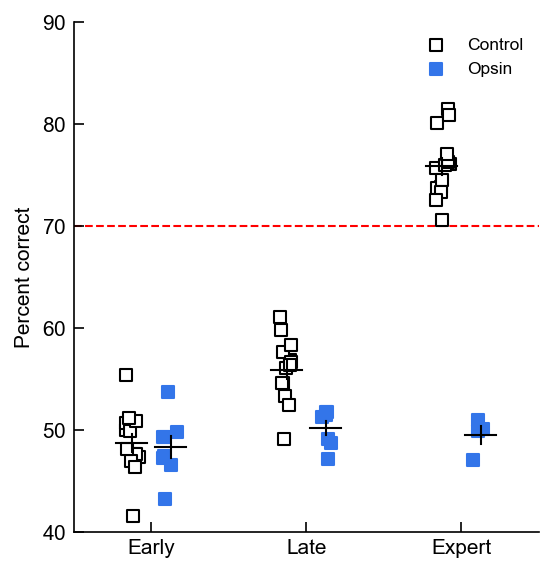

In [13]:
fig, ax = plt.subplots(figsize=(4,4.5))
data_on = [pc_early_on,pc_late_on,pc_expert_on]
data_off = [pc_early_off,pc_late_off,pc_expert_off]
data_control = [pc_early_control,pc_late_control,pc_expert_control]
labels = ['Early','Late','Expert']
numCon = 3

sz = 35
width = 0.1
x_off = 0.125

for idx,column in enumerate(data_control):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx - x_off
    ax.scatter(X,Y,s=sz,fc='white',ec='k',marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width-x_off,idx+width-x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx-x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
# for idx,column in enumerate(data_off):
#     Y = ilep.rmnan(column)
#     X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
#     ax.scatter(X,Y,s=sz,color=GOOD_GREY,marker='s')
    
#     mean = np.mean(Y)
#     SEM = sem(Y)
#     ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
#     ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
for idx,column in enumerate(data_on):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx + x_off
    ax.scatter(X,Y,s=sz,color=LASER_COLOR,marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width+x_off,idx+width+x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx+x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
ax.scatter([],[],s=sz,fc='white',ec='k',marker='s',label='Control')
# ax.scatter([],[],s=sz,color=GOOD_GREY,marker='s',label='Laser OFF')
ax.scatter([],[],s=sz,color=LASER_COLOR,marker='s',label='Opsin')
lgd = ax.legend(frameon=False)
    
    
    
    
    
    
    
ax.set_xlim([-0.5,2.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

ax.set_ylim([40,90])
ax.set_ylabel('Percent correct')

# rev = 2.5
# size = 0.3
# center = np.mean(ax.get_ylim())
# ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
# ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
# ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.axhline(70,linestyle='--',color='red',lw=1,zorder=-10)

ax.tick_params(length=5)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# ax.text(xtick_pos_pre, -0.8749628968456478, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
# ax.text(xtick_pos_post, -0.8749628968456478, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
# ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.485, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
# ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin PC over phases dprime V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [14]:
phase = len(pc_early_control)*["early"] + len(pc_early_off)*["early"] \
    + len(pc_early_on)*["early"] + len(pc_late_control)*["late"] \
    + len(pc_late_off)*["late"] + len(pc_late_on)*["late"] \
    + len(pc_expert_control)*["expert"] + len(pc_expert_off)*["expert"] \
    + len(pc_expert_on)*["expert"] \

context = len(pc_early_control)*["control"] + len(pc_early_off)*["OFF"] \
    + len(pc_early_on)*["ON"] + len(pc_late_control)*["control"] \
    + len(pc_late_off)*["OFF"] + len(pc_late_on)*["ON"] \
    + len(pc_expert_control)*["control"] + len(pc_expert_off)*["OFF"] \
    + len(pc_expert_on)*["ON"] \

mod = (np.concatenate([pc_early_control, pc_early_off,
    pc_early_on, pc_late_control,
    pc_late_off, pc_late_on,
    pc_expert_control, pc_expert_off,
    pc_expert_on]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})


### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])

            Source           SS    DF           MS           F         p-unc  \
0            phase  3412.239001   2.0  1706.119501  211.544023  3.671272e-30   
1          context  1576.242180   2.0   788.121090   97.720181  7.412873e-21   
2  phase * context  2016.630198   4.0   504.157550   62.511164  3.200185e-22   
3         Residual   556.490532  69.0     8.065080         NaN           NaN   

        np2  
0  0.859781  
1  0.739072  
2  0.783729  
3       NaN  

     phase    A        B     p-unc    p-corr    hedges
6    early  OFF       ON  0.798446  0.798446 -0.158680
7    early  OFF  control  0.373758  0.560637 -0.282737
8    early   ON  control  0.546631  0.614960 -0.125682
9   expert  OFF       ON  0.342857  0.560637  0.503752
10  expert  OFF  control  0.000654  0.001961 -7.851057
11  expert   ON  control  0.000654  0.001961 -8.453379
12    late  OFF       ON  0.534965  0.614960  0.206564
13    late  OFF  control  0.001161  0.002612 -1.813284
14    late   ON  control  0.00049

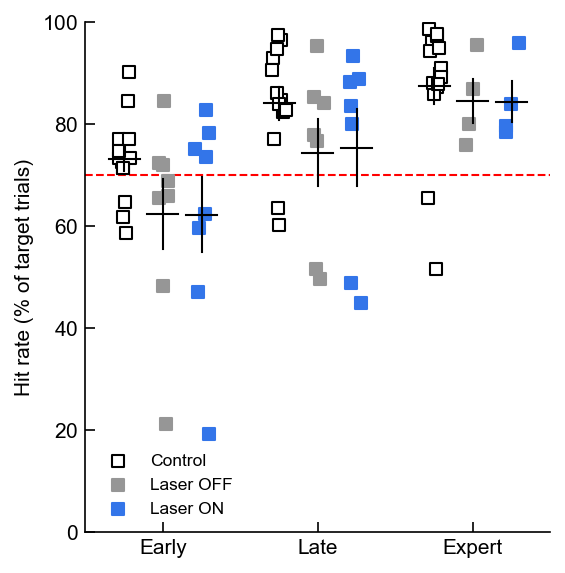

In [15]:
fig, ax = plt.subplots(figsize=(4,4.5))
data_on = [hit_early_on,hit_late_on,hit_expert_on]
data_off = [hit_early_off,hit_late_off,hit_expert_off]
data_control = [hit_early_control,hit_late_control,hit_expert_control]
labels = ['Early','Late','Expert']
numCon = 3

sz = 35
width = 0.1
x_off = 0.25

for idx,column in enumerate(data_control):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx - x_off
    ax.scatter(X,Y,s=sz,fc='white',ec='k',marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width-x_off,idx+width-x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx-x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
for idx,column in enumerate(data_off):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
    ax.scatter(X,Y,s=sz,color=GOOD_GREY,marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
for idx,column in enumerate(data_on):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx + x_off
    ax.scatter(X,Y,s=sz,color=LASER_COLOR,marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width+x_off,idx+width+x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx+x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
ax.scatter([],[],s=sz,fc='white',ec='k',marker='s',label='Control')
ax.scatter([],[],s=sz,color=GOOD_GREY,marker='s',label='Laser OFF')
ax.scatter([],[],s=sz,color=LASER_COLOR,marker='s',label='Laser ON')
lgd = ax.legend(frameon=False)
    
    
    
    
    
    
    
ax.set_xlim([-0.5,2.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

ax.set_ylim([0,100])
ax.set_ylabel('Hit rate (% of target trials)')

# rev = 2.5
# size = 0.3
# center = np.mean(ax.get_ylim())
# ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
# ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
# ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.axhline(70,linestyle='--',color='red',lw=1,zorder=-10)

ax.tick_params(length=5)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# ax.text(xtick_pos_pre, -0.8749628968456478, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
# ax.text(xtick_pos_post, -0.8749628968456478, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
# ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.485, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
# ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin hit rate over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

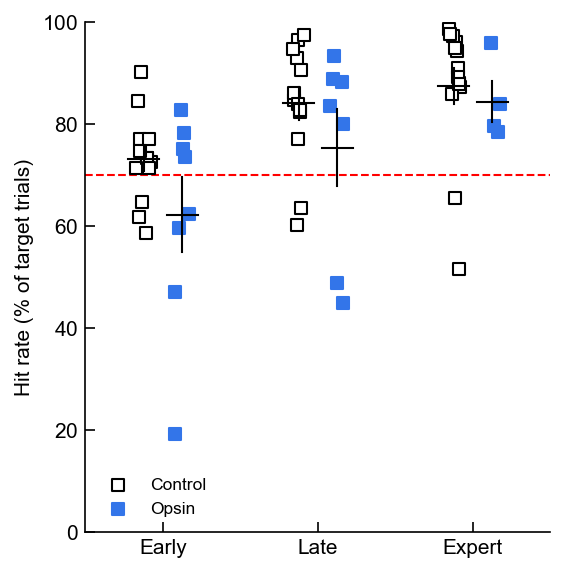

In [16]:
fig, ax = plt.subplots(figsize=(4,4.5))
data_on = [hit_early_on,hit_late_on,hit_expert_on]
data_off = [hit_early_off,hit_late_off,hit_expert_off]
data_control = [hit_early_control,hit_late_control,hit_expert_control]
labels = ['Early','Late','Expert']
numCon = 3

sz = 35
width = 0.1
x_off = 0.125

for idx,column in enumerate(data_control):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx - x_off
    ax.scatter(X,Y,s=sz,fc='white',ec='k',marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width-x_off,idx+width-x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx-x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
# for idx,column in enumerate(data_off):
#     Y = ilep.rmnan(column)
#     X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
#     ax.scatter(X,Y,s=sz,color=GOOD_GREY,marker='s')
    
#     mean = np.mean(Y)
#     SEM = sem(Y)
#     ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
#     ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
for idx,column in enumerate(data_on):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx + x_off
    ax.scatter(X,Y,s=sz,color=LASER_COLOR,marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width+x_off,idx+width+x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx+x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
ax.scatter([],[],s=sz,fc='white',ec='k',marker='s',label='Control')
# ax.scatter([],[],s=sz,color=GOOD_GREY,marker='s',label='Laser OFF')
ax.scatter([],[],s=sz,color=LASER_COLOR,marker='s',label='Opsin')
lgd = ax.legend(frameon=False)
    
    
    
    
    
    
    
ax.set_xlim([-0.5,2.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

ax.set_ylim([0,100])
ax.set_ylabel('Hit rate (% of target trials)')

# rev = 2.5
# size = 0.3
# center = np.mean(ax.get_ylim())
# ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
# ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
# ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.axhline(70,linestyle='--',color='red',lw=1,zorder=-10)

ax.tick_params(length=5)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# ax.text(xtick_pos_pre, -0.8749628968456478, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
# ax.text(xtick_pos_post, -0.8749628968456478, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
# ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.485, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
# ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin hit rate over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [17]:
phase = len(hit_early_control)*["early"] + len(hit_early_off)*["early"] \
    + len(hit_early_on)*["early"] + len(hit_late_control)*["late"] \
    + len(hit_late_off)*["late"] + len(hit_late_on)*["late"] \
    + len(hit_expert_control)*["expert"] + len(hit_expert_off)*["expert"] \
    + len(hit_expert_on)*["expert"] \

context = len(hit_early_control)*["control"] + len(hit_early_off)*["OFF"] \
    + len(hit_early_on)*["ON"] + len(hit_late_control)*["control"] \
    + len(hit_late_off)*["OFF"] + len(hit_late_on)*["ON"] \
    + len(hit_expert_control)*["control"] + len(hit_expert_off)*["OFF"] \
    + len(hit_expert_on)*["ON"] \

mod = (np.concatenate([hit_early_control, hit_early_off,
    hit_early_on, hit_late_control,
    hit_late_off, hit_late_on,
    hit_expert_control, hit_expert_off,
    hit_expert_on]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})


### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])

            Source            SS    DF           MS         F     p-unc  \
0            phase   4180.854601   2.0  2090.427300  9.551375  0.000218   
1          context   1271.221223   2.0   635.610612  2.904170  0.061520   
2  phase * context    196.953074   4.0    49.238269  0.224975  0.923564   
3         Residual  15101.436624  69.0   218.861400       NaN       NaN   

        np2  
0  0.216824  
1  0.077643  
2  0.012874  
3       NaN  

     phase    A        B     p-unc    p-corr    hedges
6    early  OFF       ON  0.959130  1.000000  0.002893
7    early  OFF  control  0.121254  0.623529 -0.764671
8    early   ON  control  0.500211  0.750317 -0.726469
9   expert  OFF       ON  1.000000  1.000000  0.016463
10  expert  OFF  control  0.277124  0.623529 -0.224408
11  expert   ON  control  0.232680  0.623529 -0.237689
12    late  OFF       ON  0.901515  1.000000 -0.051979
13    late  OFF  control  0.210604  0.623529 -0.673970
14    late   ON  control  0.392879  0.707183 -0.556607


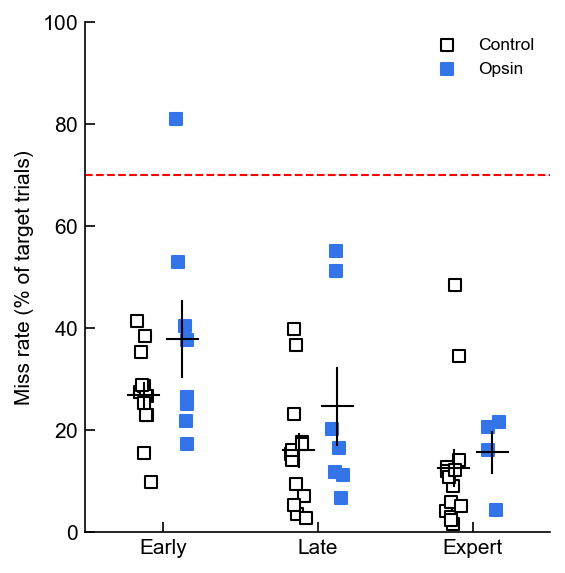

In [18]:
fig, ax = plt.subplots(figsize=(4,4.5))
data_on = [miss_early_on,miss_late_on,miss_expert_on]
data_off = [miss_early_off,miss_late_off,miss_expert_off]
data_control = [miss_early_control,miss_late_control,miss_expert_control]
labels = ['Early','Late','Expert']
numCon = 3

sz = 35
width = 0.1
x_off = 0.125

for idx,column in enumerate(data_control):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx - x_off
    ax.scatter(X,Y,s=sz,fc='white',ec='k',marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width-x_off,idx+width-x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx-x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
# for idx,column in enumerate(data_off):
#     Y = ilep.rmnan(column)
#     X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
#     ax.scatter(X,Y,s=sz,color=GOOD_GREY,marker='s')
    
#     mean = np.mean(Y)
#     SEM = sem(Y)
#     ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
#     ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
for idx,column in enumerate(data_on):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx + x_off
    ax.scatter(X,Y,s=sz,color=LASER_COLOR,marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width+x_off,idx+width+x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx+x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
ax.scatter([],[],s=sz,fc='white',ec='k',marker='s',label='Control')
# ax.scatter([],[],s=sz,color=GOOD_GREY,marker='s',label='Laser OFF')
ax.scatter([],[],s=sz,color=LASER_COLOR,marker='s',label='Opsin')
lgd = ax.legend(frameon=False)
    
    
    
    
    
    
    
ax.set_xlim([-0.5,2.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

ax.set_ylim([0,100])
ax.set_ylabel('Miss rate (% of target trials)')

# rev = 2.5
# size = 0.3
# center = np.mean(ax.get_ylim())
# ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
# ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
# ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.axhline(70,linestyle='--',color='red',lw=1,zorder=-10)

ax.tick_params(length=5)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# ax.text(xtick_pos_pre, -0.8749628968456478, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
# ax.text(xtick_pos_post, -0.8749628968456478, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
# ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.485, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
# ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin miss rate over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [19]:
phase = len(miss_early_control)*["early"] + len(miss_early_off)*["early"] \
    + len(miss_early_on)*["early"] + len(miss_late_control)*["late"] \
    + len(miss_late_off)*["late"] + len(miss_late_on)*["late"] \
    + len(miss_expert_control)*["expert"] + len(miss_expert_off)*["expert"] \
    + len(miss_expert_on)*["expert"] \

context = len(miss_early_control)*["control"] + len(miss_early_off)*["OFF"] \
    + len(miss_early_on)*["ON"] + len(miss_late_control)*["control"] \
    + len(miss_late_off)*["OFF"] + len(miss_late_on)*["ON"] \
    + len(miss_expert_control)*["control"] + len(miss_expert_off)*["OFF"] \
    + len(miss_expert_on)*["ON"] \

mod = (np.concatenate([miss_early_control, miss_early_off,
    miss_early_on, miss_late_control,
    miss_late_off, miss_late_on,
    miss_expert_control, miss_expert_off,
    miss_expert_on]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})


### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])

            Source            SS    DF           MS         F     p-unc  \
0            phase   4180.854601   2.0  2090.427300  9.551375  0.000218   
1          context   1271.221223   2.0   635.610612  2.904170  0.061520   
2  phase * context    196.953074   4.0    49.238269  0.224975  0.923564   
3         Residual  15101.436624  69.0   218.861400       NaN       NaN   

        np2  
0  0.216824  
1  0.077643  
2  0.012874  
3       NaN  

     phase    A        B     p-unc    p-corr    hedges
6    early  OFF       ON  0.959130  1.000000 -0.002893
7    early  OFF  control  0.121254  0.623529  0.764671
8    early   ON  control  0.500211  0.750317  0.726469
9   expert  OFF       ON  1.000000  1.000000 -0.016463
10  expert  OFF  control  0.277124  0.623529  0.224408
11  expert   ON  control  0.232680  0.623529  0.237689
12    late  OFF       ON  0.901515  1.000000  0.051979
13    late  OFF  control  0.210604  0.623529  0.673970
14    late   ON  control  0.392879  0.707183  0.556607


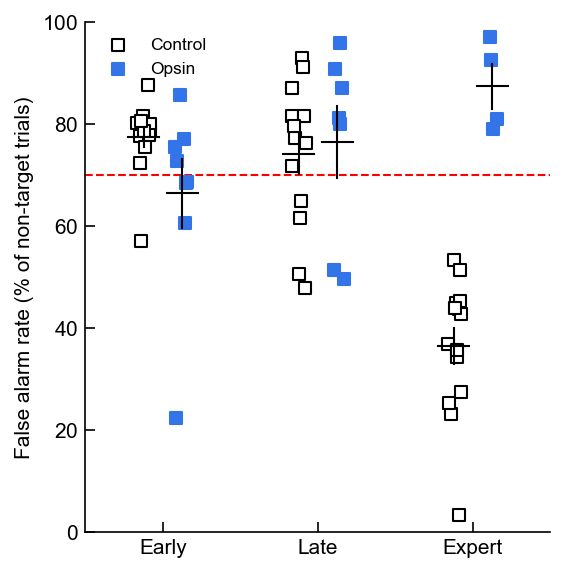

In [20]:
fig, ax = plt.subplots(figsize=(4,4.5))
data_on = [falarm_early_on,falarm_late_on,falarm_expert_on]
data_off = [falarm_early_off,falarm_late_off,falarm_expert_off]
data_control = [falarm_early_control,falarm_late_control,falarm_expert_control]
labels = ['Early','Late','Expert']
numCon = 3

sz = 35
width = 0.1
x_off = 0.125

for idx,column in enumerate(data_control):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx - x_off
    ax.scatter(X,Y,s=sz,fc='white',ec='k',marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width-x_off,idx+width-x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx-x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
# for idx,column in enumerate(data_off):
#     Y = ilep.rmnan(column)
#     X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
#     ax.scatter(X,Y,s=sz,color=GOOD_GREY,marker='s')
    
#     mean = np.mean(Y)
#     SEM = sem(Y)
#     ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
#     ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
for idx,column in enumerate(data_on):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx + x_off
    ax.scatter(X,Y,s=sz,color=LASER_COLOR,marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width+x_off,idx+width+x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx+x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
ax.scatter([],[],s=sz,fc='white',ec='k',marker='s',label='Control')
# ax.scatter([],[],s=sz,color=GOOD_GREY,marker='s',label='Laser OFF')
ax.scatter([],[],s=sz,color=LASER_COLOR,marker='s',label='Opsin')
lgd = ax.legend(frameon=False)
    
    
    
    
    
    
    
ax.set_xlim([-0.5,2.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

ax.set_ylim([0,100])
ax.set_ylabel('False alarm rate (% of non-target trials)')

# rev = 2.5
# size = 0.3
# center = np.mean(ax.get_ylim())
# ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
# ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
# ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.axhline(70,linestyle='--',color='red',lw=1,zorder=-10)

ax.tick_params(length=5)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# ax.text(xtick_pos_pre, -0.8749628968456478, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
# ax.text(xtick_pos_post, -0.8749628968456478, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
# ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.485, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
# ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin falarm rate over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [21]:
phase = len(falarm_early_control)*["early"] + len(falarm_early_off)*["early"] \
    + len(falarm_early_on)*["early"] + len(falarm_late_control)*["late"] \
    + len(falarm_late_off)*["late"] + len(falarm_late_on)*["late"] \
    + len(falarm_expert_control)*["expert"] + len(falarm_expert_off)*["expert"] \
    + len(falarm_expert_on)*["expert"] \

context = len(falarm_early_control)*["control"] + len(falarm_early_off)*["OFF"] \
    + len(falarm_early_on)*["ON"] + len(falarm_late_control)*["control"] \
    + len(falarm_late_off)*["OFF"] + len(falarm_late_on)*["ON"] \
    + len(falarm_expert_control)*["control"] + len(falarm_expert_off)*["OFF"] \
    + len(falarm_expert_on)*["ON"] \

mod = (np.concatenate([falarm_early_control, falarm_early_off,
    falarm_early_on, falarm_late_control,
    falarm_late_off, falarm_late_on,
    falarm_expert_control, falarm_expert_off,
    falarm_expert_on]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})


### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])

            Source            SS    DF           MS          F         p-unc  \
0            phase   4508.335778   2.0  2254.167889  10.456049  1.080359e-04   
1          context   1987.157310   2.0   993.578655   4.608755  1.322228e-02   
2  phase * context  11829.726063   4.0  2957.431516  13.718165  2.782057e-08   
3         Residual  14875.369232  69.0   215.585061        NaN           NaN   

        np2  
0  0.232584  
1  0.117845  
2  0.442976  
3       NaN  

     phase    A        B     p-unc    p-corr    hedges
6    early  OFF       ON  0.720901  0.885714  0.055306
7    early  OFF  control  0.075601  0.170102 -0.779454
8    early   ON  control  0.036818  0.110453 -0.820820
9   expert  OFF       ON  0.885714  0.885714 -0.081272
10  expert  OFF  control  0.000654  0.002941  3.831707
11  expert   ON  control  0.000654  0.002941  3.857704
12    late  OFF       ON  0.804779  0.885714 -0.047663
13    late  OFF  control  0.588029  0.882043  0.084158
14    late   ON  control  0.53555

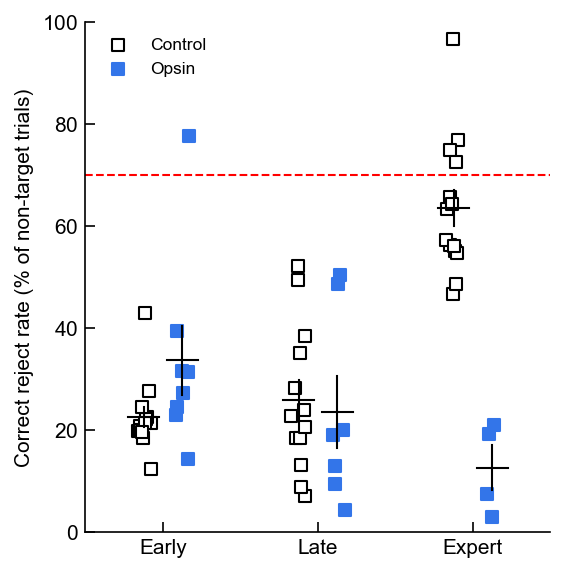

In [22]:
fig, ax = plt.subplots(figsize=(4,4.5))
data_on = [creject_early_on,creject_late_on,creject_expert_on]
data_off = [creject_early_off,creject_late_off,creject_expert_off]
data_control = [creject_early_control,creject_late_control,creject_expert_control]
labels = ['Early','Late','Expert']
numCon = 3

sz = 35
width = 0.1
x_off = 0.125

for idx,column in enumerate(data_control):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx - x_off
    ax.scatter(X,Y,s=sz,fc='white',ec='k',marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width-x_off,idx+width-x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx-x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
# for idx,column in enumerate(data_off):
#     Y = ilep.rmnan(column)
#     X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
#     ax.scatter(X,Y,s=sz,color=GOOD_GREY,marker='s')
    
#     mean = np.mean(Y)
#     SEM = sem(Y)
#     ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
#     ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
for idx,column in enumerate(data_on):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx + x_off
    ax.scatter(X,Y,s=sz,color=LASER_COLOR,marker='s')
    
    mean = np.mean(Y)
    SEM = sem(Y)
    ax.plot([idx-width+x_off,idx+width+x_off],[mean]*2,color='k',lw=1)
    ax.plot([idx+x_off]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
ax.scatter([],[],s=sz,fc='white',ec='k',marker='s',label='Control')
# ax.scatter([],[],s=sz,color=GOOD_GREY,marker='s',label='Laser OFF')
ax.scatter([],[],s=sz,color=LASER_COLOR,marker='s',label='Opsin')
lgd = ax.legend(frameon=False)
    
    
    
    
    
    
    
ax.set_xlim([-0.5,2.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)

ax.set_ylim([0,100])
ax.set_ylabel('Correct reject rate (% of non-target trials)')

# rev = 2.5
# size = 0.3
# center = np.mean(ax.get_ylim())
# ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
# ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
# ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.axhline(70,linestyle='--',color='red',lw=1,zorder=-10)

ax.tick_params(length=5)

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# ax.text(xtick_pos_pre, -0.8749628968456478, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
# ax.text(xtick_pos_post, -0.8749628968456478, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
# ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.485, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
# ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin creject rate over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [23]:
phase = len(creject_early_control)*["early"] + len(creject_early_off)*["early"] \
    + len(creject_early_on)*["early"] + len(creject_late_control)*["late"] \
    + len(creject_late_off)*["late"] + len(creject_late_on)*["late"] \
    + len(creject_expert_control)*["expert"] + len(creject_expert_off)*["expert"] \
    + len(creject_expert_on)*["expert"] \

context = len(creject_early_control)*["control"] + len(creject_early_off)*["OFF"] \
    + len(creject_early_on)*["ON"] + len(creject_late_control)*["control"] \
    + len(creject_late_off)*["OFF"] + len(creject_late_on)*["ON"] \
    + len(creject_expert_control)*["control"] + len(creject_expert_off)*["OFF"] \
    + len(creject_expert_on)*["ON"] \

mod = (np.concatenate([creject_early_control, creject_early_off,
    creject_early_on, creject_late_control,
    creject_late_off, creject_late_on,
    creject_expert_control, creject_expert_off,
    creject_expert_on]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})


### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])

            Source            SS    DF           MS          F         p-unc  \
0            phase   4508.335778   2.0  2254.167889  10.456049  1.080359e-04   
1          context   1987.157310   2.0   993.578655   4.608755  1.322228e-02   
2  phase * context  11829.726063   4.0  2957.431516  13.718165  2.782057e-08   
3         Residual  14875.369232  69.0   215.585061        NaN           NaN   

        np2  
0  0.232584  
1  0.117845  
2  0.442976  
3       NaN  

     phase    A        B     p-unc    p-corr    hedges
6    early  OFF       ON  0.720901  0.885714 -0.055306
7    early  OFF  control  0.075601  0.170102  0.779454
8    early   ON  control  0.036818  0.110453  0.820820
9   expert  OFF       ON  0.885714  0.885714  0.081272
10  expert  OFF  control  0.000654  0.002941 -3.831707
11  expert   ON  control  0.000654  0.002941 -3.857704
12    late  OFF       ON  0.804779  0.885714  0.047663
13    late  OFF  control  0.588029  0.882043 -0.084158
14    late   ON  control  0.53555

# Behavior at cutoff

In [9]:
def get_outcomes(animal,day,noTrim=False):
    outcomes = np.array(animalBehaviors[animal].sessions[day].outcomes)
    valid_trials_mask = np.ones_like(outcomes,dtype='bool')
    
    if not noTrim:
        try:
            #We will trim for active trials only on expert days
            exceptionTrials = ilep.exceptionsForSpecificBehaviorDays(animal,day)
            if not exceptionTrials is None:
                valid_trials_mask = exceptionTrials
                outcomes = outcomes[valid_trials_mask]
            elif day in learning_phases[animal].post_expert_days:
                valid_trials_mask = ilep.getActiveTrials(outcomes)
                outcomes = outcomes[valid_trials_mask]
        except Exception as e:
            print(f"{animal} session {day}: {e}")
            return np.nan
    else:
        outcomes = np.array(animalBehaviors[animal].sessions[day].outcomes)
    return outcomes,valid_trials_mask

def get_response_times_internal(animal,day,noTrim=False):
    if not hasattr(animalBehaviors[animal].sessions[day],'response_time'):
        print('no response_time')
        return None,np.nan
    
    response_times = np.array(animalBehaviors[animal].sessions[day].response_time)
    outcomes = np.array(animalBehaviors[animal].sessions[day].outcomes)
    valid_trials_mask = np.ones_like(response_times,dtype='bool')
    
    if not noTrim:
        try:
            #We will trim for active trials only on expert days
            exceptionTrials = ilep.exceptionsForSpecificBehaviorDays(animal,day)
            if not exceptionTrials is None:
                valid_trials_mask = exceptionTrials
                response_times = response_times[valid_trials_mask]
            elif day in learning_phases[animal].post_expert_days:
                valid_trials_mask = ilep.getActiveTrials(outcomes)
                response_times = response_times[valid_trials_mask]
        except Exception as e:
            print(f"{animal} session {day}: {e}")
            return None,np.nan
    else:
        response_times = np.array(animalBehaviors[animal].sessions[day].response_time)
    return response_times,valid_trials_mask
        
def get_dp(animal,day,noTrim=False):
    if np.isnan(day):
        return np.nan
    
    if not noTrim:
        dp,pc = ilep.getPCDPfromBehavior(animalBehaviors,animal,[day],learning_phases[animal].post_expert_days,noTrim=noTrim)
        return dp[0]
    else:
        outcomes,_ = get_outcomes(animal,day,noTrim=noTrim)
        pc,dp = ilep.pcdpFromOutcomes(outcomes)
        return dp

def get_pc(animal,day,noTrim=False):
    if np.isnan(day):
        return np.nan
    
    if not noTrim:
        dp,pc = ilep.getPCDPfromBehavior(animalBehaviors,animal,[day],learning_phases[animal].post_expert_days,noTrim=noTrim)
        return pc[0]*100
    else:
        outcomes,_ = get_outcomes(animal,day,noTrim=noTrim)
        pc,dp = ilep.pcdpFromOutcomes(outcomes)
        return pc*100
        
def get_hits(animal,day,noTrim=False):
    if np.isnan(day):
        return np.nan
    
    outcomes,_ = get_outcomes(animal,day,noTrim=noTrim)
    hits = np.sum(np.equal(outcomes,1))
    misses = np.sum(np.equal(outcomes,2))
    return hits/(hits+misses)*100

def get_misses(animal,day,noTrim=False):
    if np.isnan(day):
        return np.nan
    
    outcomes,_ = get_outcomes(animal,day,noTrim=noTrim)
    hits = np.sum(np.equal(outcomes,1))
    misses = np.sum(np.equal(outcomes,2))
    return misses/(hits+misses)*100

def get_falarms(animal,day,noTrim=False):
    if np.isnan(day):
        return np.nan
    
    outcomes,_ = get_outcomes(animal,day,noTrim=noTrim)
    falarms = np.sum(np.equal(outcomes,3))
    crejects = np.sum(np.equal(outcomes,4))
    return falarms/(falarms+crejects)*100

def get_crejects(animal,day,noTrim=False):
    if np.isnan(day):
        return np.nan
    
    outcomes,_ = get_outcomes(animal,day,noTrim=noTrim)
    falarms = np.sum(np.equal(outcomes,3))
    crejects = np.sum(np.equal(outcomes,4))
    return crejects/(falarms+crejects)*100

def get_go(animal,day,noTrim=False):
    if np.isnan(day):
        return np.nan
    
    outcomes,_ = get_outcomes(animal,day,noTrim=noTrim)
    hits = np.sum(np.equal(outcomes,1))
    misses = np.sum(np.equal(outcomes,2))
    falarms = np.sum(np.equal(outcomes,3))
    crejects = np.sum(np.equal(outcomes,4))
    return (hits+falarms)/(hits+misses+falarms+crejects)*100

# def get_response_times(animal,day,noTrim=False):
#     response_times,mask = get_response_times_internal(animal,day,noTrim=noTrim)
#     if response_times is None:
#         return np.nan
#     response_times = response_times[np.less(response_times,2.49)]
#     return np.mean(response_times)

# def get_response_times_target(animal,day,noTrim=False):
#     response_times,_ = get_response_times_internal(animal,day,noTrim=noTrim)
#     if response_times is None:
#         return np.nan
    
#     outcomes,_ = get_outcomes(animal,day,noTrim=noTrim)
#     target_mask = np.logical_or(np.equal(outcomes,1),np.equal(outcomes,2))
#     response_times = response_times[target_mask]
    
#     response_times = response_times[np.less(response_times,2.49)]
#     return np.mean(response_times)

# def get_response_times_nontarget(animal,day,noTrim=False):
#     response_times,_ = get_response_times_internal(animal,day,noTrim=noTrim)
#     if response_times is None:
#         return np.nan
    
#     outcomes,_ = get_outcomes(animal,day,noTrim=noTrim)
#     target_mask = np.logical_or(np.equal(outcomes,3),np.equal(outcomes,4))
#     response_times = response_times[target_mask]
    
#     response_times = response_times[np.less(response_times,2.49)]
#     return np.mean(response_times)

In [10]:
def get_response_times(animal,day,noTrim=False):#noTrim is deprecated
    NotFound = True
    for session in np.unique(EnumSession):
        sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
        if sessionfile.meta.animal == animal and sessionfile.meta.day_of_training == day:
            NotFound = False
            break
    if NotFound:
        print(f"{animal} day of training {day} not found")
        return np.nan
    else:
        print(f"{animal} day of training {day} found!")
        
    all_conds = ilep.getAllConditions(sessionfile,None)
    trials = all_conds['all_trials'].trials
    response_times = (sessionfile.trials.response[trials] - sessionfile.trials.starts[trials]) / sessionfile.meta.fs
    return np.mean(response_times)

def get_response_times_target(animal,day,noTrim=False):#noTrim is deprecated
    NotFound = True
    for session in np.unique(EnumSession):
        sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
        if sessionfile.meta.animal == animal and sessionfile.meta.day_of_training == day:
            NotFound = False
            break
    if NotFound:
        print(f"{animal} day of training {day} not found")
        return np.nan
        
    all_conds = ilep.getAllConditions(sessionfile,None)
    trials = all_conds['all_trials'].trials
    response_times = (sessionfile.trials.response[trials] - sessionfile.trials.starts[trials]) / sessionfile.meta.fs
    return np.mean(response_times)

def get_response_times_nontarget(animal,day,noTrim=False):#noTrim is deprecated
    NotFound = True
    for session in np.unique(EnumSession):
        sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
        if sessionfile.meta.animal == animal and sessionfile.meta.day_of_training == day:
            NotFound = False
            break
    if NotFound:
        print(f"{animal} day of training {day} not found")
        return np.nan
        
    all_conds = ilep.getAllConditions(sessionfile,None)
    trials = all_conds['all_trials'].trials
    response_times = (sessionfile.trials.response[trials] - sessionfile.trials.starts[trials]) / sessionfile.meta.fs
    return np.mean(response_times)

In [11]:
control_dps = []
control_pcs = []
control_hits = []
control_misses = []
control_falarms = []
control_crejects = []
control_go = []
control_response_times = []
control_response_times_target = []
control_response_times_nontarget = []

opsin_dps = []
opsin_pcs = []
opsin_hits = []
opsin_misses = []
opsin_falarms = []
opsin_crejects = []
opsin_go = []
opsin_response_times = []
opsin_response_times_target = []
opsin_response_times_nontarget = []

days_to_calculate = [0,1,2]

for animal in opsin_control_animals:
    print(animal)
    
    this_animal_dps = []
    this_animal_pcs = []
    this_animal_hits = []
    this_animal_misses = []
    this_animal_falarms = []
    this_animal_crejects = []
    this_animal_go = []
    this_animal_rxn = []
    this_animal_rxn_target = []
    this_animal_rxn_nontarget = []
    
    if animal in ['BS_50']:
        control_dps.append(np.nan)
        control_pcs.append(np.nan)
        control_hits.append(np.nan)
        control_misses.append(np.nan)
        control_falarms.append(np.nan)
        control_crejects.append(np.nan)
        control_go.append(np.nan)
        control_response_times.append(np.nan)
        control_response_times_target.append(np.nan)
        control_response_times_nontarget.append(np.nan)
        continue
        
    test_day = np.nan
    if len(learning_phases[animal].post_expert_days) >= 3:
        days_to_calculate_animal = np.sort(learning_phases[animal].post_expert_days)[0:3]
    else:
        try:
            max_day = np.max([k for k in animalBehaviors[animal].sessions]) - animalBehaviors[animal].reversal
            if max_day > 12:
                max_day = 12
            test_day = animalBehaviors[animal].reversal + max_day
            days_to_calculate_animal = np.array([test_day,test_day-1,test_day-2])
            days_to_calculate_animal = days_to_calculate_animal[np.isin(days_to_calculate_animal,learning_phases[animal].post_expert_days)]
            # if animal == 'AO_273':
            #     days_to_calculate_animal = [test_day,test_day-1]
            
            if max_day < 6:
                days_to_calculate_animal = [np.nan,np.nan,np.nan]
        except Exception as e:
            print(f"{animal}: {e}")
            pass
    print(f"{animal}: {days_to_calculate_animal}")
#     print(animal)
    control_dps.append(np.mean([get_dp(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    control_pcs.append(np.mean([get_pc(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    control_hits.append(np.mean([get_hits(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    control_misses.append(np.mean([get_misses(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    control_falarms.append(np.mean([get_falarms(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    control_crejects.append(np.mean([get_crejects(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    control_go.append(np.mean([get_go(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#     if animal not in ['DS_15','DS_19']: #Animals excluded because this is reconstructed data which does not include response times
#         control_response_times.append(np.mean([get_response_times(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#         control_response_times_target.append(np.mean([get_response_times_target(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#         control_response_times_nontarget.append(np.mean([get_response_times_nontarget(animal,x,noTrim=False) for x in days_to_calculate_animal]))
# control_dps = ilep.rmnan(control_dps)
# control_pcs = ilep.rmnan(control_pcs)
# control_hits = ilep.rmnan(control_hits)
# control_misses = ilep.rmnan(control_misses)
# control_falarms = ilep.rmnan(control_falarms)
# control_crejects = ilep.rmnan(control_crejects)
# control_response_times = ilep.rmnan(control_response_times)
# control_response_times_target = ilep.rmnan(control_response_times_target)
# control_response_times_nontarget = ilep.rmnan(control_response_times_nontarget)

for animal in did_not_learn_animals:
    test_day = np.nan
    try:
        max_day = np.max([k for k in animalBehaviors[animal].sessions]) - animalBehaviors[animal].reversal
        if max_day > 12:
            max_day = 12
        
        if animalBehaviors[animal].cloudiness <= max_day:
            max_day = animalBehaviors[animal].cloudiness - 1
            
        if max_day < 6:
            continue
            
        test_day = animalBehaviors[animal].reversal + max_day
        days_to_calculate_animal = [test_day,test_day-1,test_day-2]
        
    except Exception as e:
        raise e
        pass
    
    if animal == 'BS_100':                     #Do this for the paired analyses. BS_100 has no cutoff day data
        continue
    
    print(animal)
#     print(np.mean([get_hits(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    
    opsin_dps.append(np.mean([get_dp(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    opsin_pcs.append(np.mean([get_pc(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    opsin_hits.append(np.mean([get_hits(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    opsin_misses.append(np.mean([get_misses(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    opsin_falarms.append(np.mean([get_falarms(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    opsin_crejects.append(np.mean([get_crejects(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    opsin_go.append(np.mean([get_go(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#     opsin_response_times.append(np.mean([get_response_times(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#     opsin_response_times_target.append(np.mean([get_response_times_target(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#     opsin_response_times_nontarget.append(np.mean([get_response_times_nontarget(animal,x,noTrim=False) for x in days_to_calculate_animal]))
# opsin_dps = ilep.rmnan(opsin_dps)
# opsin_pcs = ilep.rmnan(opsin_pcs)
# opsin_hits = ilep.rmnan(opsin_hits)
# opsin_misses = ilep.rmnan(opsin_misses)
# opsin_falarms = ilep.rmnan(opsin_falarms)
# opsin_crejects = ilep.rmnan(opsin_crejects)
# opsin_response_times = ilep.rmnan(opsin_response_times)
# opsin_response_times_target = ilep.rmnan(opsin_response_times_target)
# opsin_response_times_nontarget = ilep.rmnan(opsin_response_times_nontarget)

AE_267
AE_267: [14 15 16]
AO_273
AO_273: [18]
AE_287
AE_287: [16 17 18]
AE_312
AE_312: [10 11 12]
BS_86
BS_119
BS_123
BS_128
BS_131
BS_163
BS_174


In [12]:
early_control_dps = []
early_control_pcs = []
early_control_hits = []
early_control_misses = []
early_control_falarms = []
early_control_crejects = []
early_control_go = []
early_control_response_times = []
early_control_response_times_target = []
early_control_response_times_nontarget = []

early_opsin_dps = []
early_opsin_pcs = []
early_opsin_hits = []
early_opsin_misses = []
early_opsin_falarms = []
early_opsin_crejects = []
early_opsin_go = []
early_opsin_response_times = []
early_opsin_response_times_target = []
early_opsin_response_times_nontarget = []

days_to_calculate = [0,1,2]

for animal in opsin_control_animals:
    
    this_animal_dps = []
    this_animal_pcs = []
    this_animal_hits = []
    this_animal_misses = []
    this_animal_falarms = []
    this_animal_crejects = []
    this_animal_go = []
    this_animal_rxn = []
    this_animal_rxn_target = []
    this_animal_rxn_nontarget = []
    
    if animal == 'BS_50':
        early_control_dps.append(np.nan)
        early_control_pcs.append(np.nan)
        early_control_hits.append(np.nan)
        early_control_misses.append(np.nan)
        early_control_falarms.append(np.nan)
        early_control_crejects.append(np.nan)
        early_control_go.append(np.nan)
        early_control_response_times.append(np.nan)
        early_control_response_times_target.append(np.nan)
        early_control_response_times_nontarget.append(np.nan)
        continue
        
    if len(learning_phases[animal].post_early_days) >= 3:
        days_to_calculate_animal = np.sort(learning_phases[animal].post_early_days)[0:3]
    else:
        days_to_calculate_animal = [animalBehaviors[animal].reversal+1,animalBehaviors[animal].reversal+2,animalBehaviors[animal].reversal+3]
    
#     print(animal)
    print(f"{animal}: {days_to_calculate_animal}")
    
    early_control_dps.append(np.mean([get_dp(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_control_pcs.append(np.mean([get_pc(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_control_hits.append(np.mean([get_hits(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_control_misses.append(np.mean([get_misses(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_control_falarms.append(np.mean([get_falarms(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_control_crejects.append(np.mean([get_crejects(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_control_go.append(np.mean([get_go(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#     if animal not in ['DS_15','DS_19']: #Animals excluded because this is reconstructed data which does not include response times
#         early_control_response_times.append(np.mean([get_response_times(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#         early_control_response_times_target.append(np.mean([get_response_times_target(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#         early_control_response_times_nontarget.append(np.mean([get_response_times_nontarget(animal,x,noTrim=False) for x in days_to_calculate_animal]))
# early_control_dps = ilep.rmnan(early_control_dps)
# early_control_pcs = ilep.rmnan(early_control_pcs)
# early_control_hits = ilep.rmnan(early_control_hits)
# early_control_misses = ilep.rmnan(early_control_misses)
# early_control_falarms = ilep.rmnan(early_control_falarms)
# early_control_crejects = ilep.rmnan(early_control_crejects)
# early_control_response_times = ilep.rmnan(early_control_response_times)
# early_control_response_times_target = ilep.rmnan(early_control_response_times_target)
# early_control_response_times_nontarget = ilep.rmnan(early_control_response_times_nontarget)

for animal in did_not_learn_animals:
    days_to_calculate_animal = [animalBehaviors[animal].reversal+1,animalBehaviors[animal].reversal+2,animalBehaviors[animal].reversal+3]
    
    if animal == 'BS_100':                     #Do this for the paired analyses. BS_100 has no cutoff day data
        continue
    
    print(animal)
#     print(np.mean([get_hits(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    
    early_opsin_dps.append(np.mean([get_dp(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_opsin_pcs.append(np.mean([get_pc(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_opsin_hits.append(np.mean([get_hits(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_opsin_misses.append(np.mean([get_misses(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_opsin_falarms.append(np.mean([get_falarms(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_opsin_crejects.append(np.mean([get_crejects(animal,x,noTrim=False) for x in days_to_calculate_animal]))
    early_opsin_go.append(np.mean([get_go(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#     early_opsin_response_times.append(np.mean([get_response_times(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#     early_opsin_response_times_target.append(np.mean([get_response_times_target(animal,x,noTrim=False) for x in days_to_calculate_animal]))
#     early_opsin_response_times_nontarget.append(np.mean([get_response_times_nontarget(animal,x,noTrim=False) for x in days_to_calculate_animal]))
# early_opsin_dps = ilep.rmnan(early_opsin_dps)
# early_opsin_pcs = ilep.rmnan(early_opsin_pcs)
# early_opsin_hits = ilep.rmnan(early_opsin_hits)
# early_opsin_misses = ilep.rmnan(early_opsin_misses)
# early_opsin_falarms = ilep.rmnan(early_opsin_falarms)
# early_opsin_crejects = ilep.rmnan(early_opsin_crejects)
# early_opsin_response_times = ilep.rmnan(early_opsin_response_times)
# early_opsin_response_times_target = ilep.rmnan(early_opsin_response_times_target)
# early_opsin_response_times_nontarget = ilep.rmnan(early_opsin_response_times_nontarget)

AE_267: [ 8  9 10]
AO_273: [7 8 9]
AE_287: [10, 11, 12]
AE_312: [6 7 8]
BS_86
BS_119
BS_123
BS_128
BS_131
BS_163
BS_174


In [13]:
# BS_40: [30 31 32]
# BS_41: [16, 15, 14]
# BS_42: [15 16 17]
    
# #BS_49???
    
# BS_51: [18 19 20]
# BS_56: [14 15 16]
# BS_59: [12 13 14]
# BS_67: [14, 13, 12]
# BS_70: [18, 17, 16]
# BS_72: [18, 17, 16]
# BS_87: [14, 13, 12]
# BS_108: [17, 16, 15]
# DS_15: [22 23 24]
# DS_19: [23 24 25]
# AE_267: [14 15 16]
# AO_273: [18, 17, 16]
# AE_287: [16 17 18]

In [14]:
len(opsin_control_animals)

4

In [15]:
len(early_control_response_times_target)

0

In [16]:
len(early_control_response_times_nontarget)

0

In [17]:
len(early_opsin_hits)

7

In [18]:
len(opsin_hits)

7

In [16]:
control_data_early = early_control_response_times_target#rxn_time_target_early_control
opsin_data_early = early_opsin_response_times_target#rxn_time_target_early_opsin
control_data_cutoff = control_response_times_target
opsin_data_cutoff = opsin_response_times_target

In [17]:
early_control_response_times_target

[0.5253415338466296,
 0.7314840298507462,
 0.3260510165262227,
 0.39765073782015575,
 0.528382430420203,
 0.41387440291969435,
 0.5865641661843738,
 0.6524635483741066,
 0.5452689214866611,
 0.3987696212121212,
 0.46892912092447875,
 0.454002381875011,
 0.37575049205312694,
 0.3912610006669075,
 0.5006029315807026]

In [18]:
control_response_times_target

[0.4187557275530694,
 0.34650828282828294,
 0.32744725433509314,
 0.4045825,
 0.3488771461519899,
 0.3465990744163827,
 0.3496308671157375,
 0.3262043182743183,
 0.31610394160583943,
 0.44918393420015756,
 0.32368214678460433,
 0.3115017422680412,
 0.3276148697066822,
 0.3891215127233877,
 0.36867147079931556]

In [19]:
opsin_control_animals

['BS_40',
 'BS_41',
 'BS_42',
 'BS_49',
 'BS_51',
 'BS_56',
 'BS_59',
 'BS_67',
 'BS_70',
 'BS_72',
 'BS_87',
 'BS_108',
 'DS_15',
 'DS_19',
 'AE_267',
 'AO_273',
 'AE_287']

In [20]:
# cutoff

# BS_86
#####     No BS_100
# BS_119
# BS_123
# BS_128
# BS_131
# BS_163
# BS_174

In [21]:
# early

# BS_86
# BS_100
# BS_119
# BS_123
# BS_128
# BS_131
# BS_163
# BS_174

In [28]:
opsin_control_animals

array(['BS_40', 'BS_41', 'BS_42', 'BS_49', 'BS_50', 'BS_51', 'BS_56',
       'BS_59', 'BS_67', 'BS_70', 'BS_72', 'BS_87', 'BS_108', 'DS_15',
       'DS_19', 'AE_312'], dtype='<U6')

In [29]:
'BS_41','BS_70','BS_72'

'BS_72'

In [22]:
control_falarms

[33.33333333333333]

In [23]:
control_falarms
control_response_times
#opsin_dps = np.concatenate([[0.425,1.12,0.605,2.1,0.44],[-0.082,0.822,0.42,-0.203]])
#opsin_dps = [0.15,-0.082,0.822,-0.263,-0.203,0.184,-0.2] ### 9 +/- 3 days for post-reversal cutoff. At least 6 days non-cloudy post-reversal required for inclusion
#NOTE: 192 has not had IHC confirmation
#control_dps = [1.63,1.38,1.69,1.72,1.64,1.82,1.75,1.93,1.57,2.10,1.66,0.83,1.73,2.48,1.48,1.66]
#control_dps = [1.63,1.38,1.69,1.72,1.64]
#control_dps = [1.82,1.75,1.93,1.57,2.10,1.66,0.83,1.73,2.48,1.48,1.66]
#control_dps = [1.82]

[0.41719541666666665]

In [27]:
control_dps

[1.6365910169816509,
 1.1465084788438693,
 1.7199352050139354,
 nan,
 nan,
 1.7244761105109438,
 1.4459125282090326,
 1.6935430245979735,
 1.4267962811352035,
 1.0985527884174369,
 0.26895181935635054,
 1.4095916494291274,
 1.7144916184105303,
 1.554435929435229,
 1.9021544077064998,
 2.175740887215872]

In [21]:
control_dps

[1.9779532130610231, 1.3110373821618897, 1.7412280057902445, 2.175740887215872]

## V1

mannwhitney
sig: True
pval: 5.778609897603032e-06


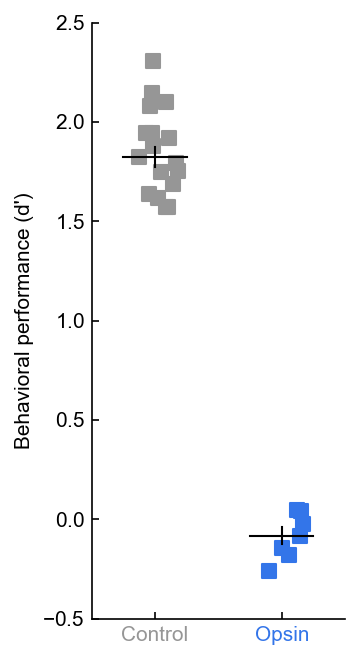

In [43]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

X,Y = ilep.violin(np.ones_like(opsin_dps),opsin_dps,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_dps)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_dps)-data_sem,np.median(opsin_dps)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_dps),control_dps,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_dps)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_dps)-data_sem,np.median(control_dps)+data_sem],lw=1,color='k')

ax.set_ylim([-0.5,2.5])
ax.set_ylabel('Behavioral performance (d\')')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opsin'])
colors = [GOOD_GREY,LASER_COLOR]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

print('mannwhitney')
test = mannwhitneyu(opsin_dps,control_dps)
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

#ax.text(0.5,2.575,str('****'),verticalalignment='bottom',horizontalalignment='center')
#ax.plot([0,1],[2.6]*2,color='k',lw=1)

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall dp at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V4

Opto d' = -0.08513419452822747 +/- 0.10649515208594877
Control d' = 1.996636865530947 +/- 0.16331245238784478
7 opto animals
4 control animals
ttest_ind
sig: True
pval: 2.5397193983255406e-09


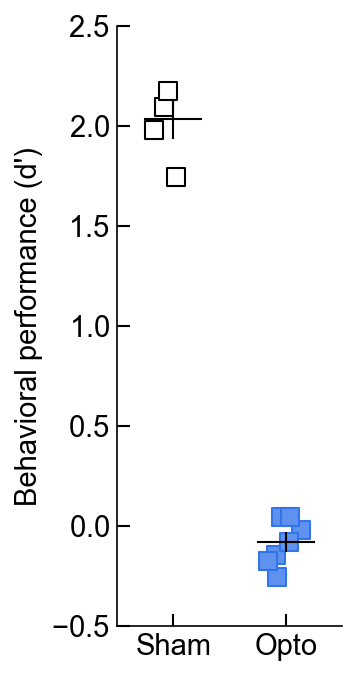

In [19]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################
sz = 75

X,Y = ilep.violin(np.ones_like(opsin_dps),opsin_dps,width=0.5)
ax.scatter(X,Y,fc=LIGHT_LASER,ec=LASER_COLOR,s=sz,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_dps)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_dps)-data_sem,np.median(opsin_dps)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_dps),control_dps,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,ec='k',fc='white',s=sz,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_dps)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_dps)-data_sem,np.median(control_dps)+data_sem],lw=1,color='k')

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([-0.5,2.5])
ylab = ax.set_ylabel('Behavioral performance (d\')')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Sham','Opto'])
# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
# for item in (ax.get_xticklabels()):
#     item.set_fontsize(stdfont*0.9)
#     pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

print(f"Opto d' = {np.nanmean(opsin_dps)} +/- {np.nanstd(opsin_dps)}")
print(f"Control d' = {np.nanmean(control_dps)} +/- {np.nanstd(control_dps)}")
print(f"{len(ilep.rmnan(opsin_dps))} opto animals")
print(f"{len(ilep.rmnan(control_dps))} control animals")
print('ttest_ind')
test = ttest_ind(ilep.rmnan(opsin_dps),ilep.rmnan(control_dps))
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall dp at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

## V1

mannwhitney
sig: True
pval: 5.778609897603032e-06


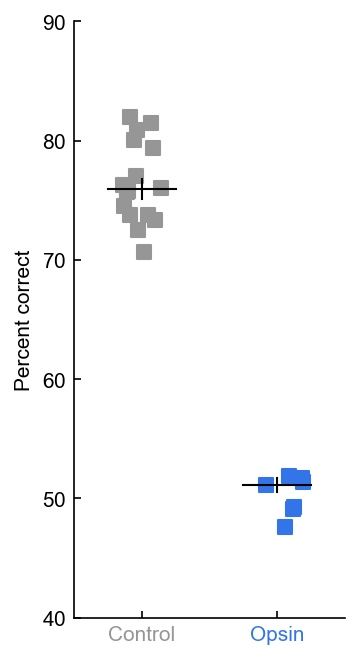

In [45]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

control_data = control_pcs
opsin_data = opsin_pcs

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

ax.set_ylim([40,90])
ax.set_ylabel('Percent correct')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opsin'])
colors = [GOOD_GREY,LASER_COLOR]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

print('mannwhitney')
test = mannwhitneyu(opsin_data,control_data)
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

#ax.text(0.5,2.575,str('****'),verticalalignment='bottom',horizontalalignment='center')
#ax.plot([0,1],[2.6]*2,color='k',lw=1)

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall pc at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V4

Opto pcs = 50.30239728599623 +/- 1.517795527999425
Control pcs = 76.8406430120033 +/- 4.194701303150935
7 opto animals
13 control animals
mannwhitney
sig: True
pval: 2.5799793601651186e-05


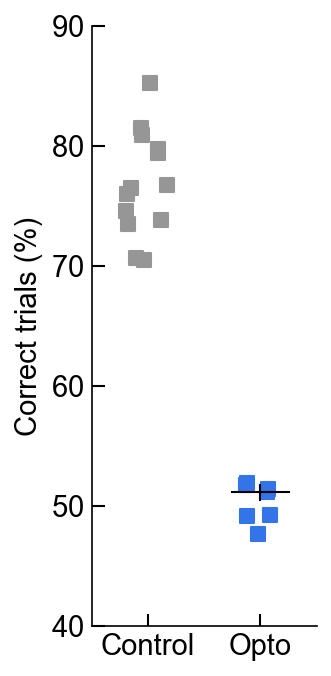

In [58]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

control_data = control_pcs
opsin_data = opsin_pcs

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s',clip_on=False)
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.5)
#X = 0
#Y = control_dps
data_cont = ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s',clip_on=False)
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([40,90])
ax.set_yticks([40,50,60,70,80,90])
ylab = ax.set_ylabel('Correct trials (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(labels)
# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
# for item in (ax.get_xticklabels()):
#     item.set_fontsize(stdfont*0.9)
#     pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

print(f"Opto pcs = {np.nanmean(opsin_data)} +/- {np.nanstd(opsin_data)}")
print(f"Control pcs = {np.nanmean(control_data)} +/- {np.nanstd(control_data)}")
print(f"{len(ilep.rmnan(opsin_data))} opto animals")
print(f"{len(ilep.rmnan(control_data))} control animals")
print('mannwhitney')
test = mannwhitneyu(ilep.rmnan(opsin_data),ilep.rmnan(control_data))
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

artists = np.concatenate([[ylab],data_cont.findobj()])
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall pc at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

## V1

mannwhitney
sig: False
pval: 0.12970089915170008


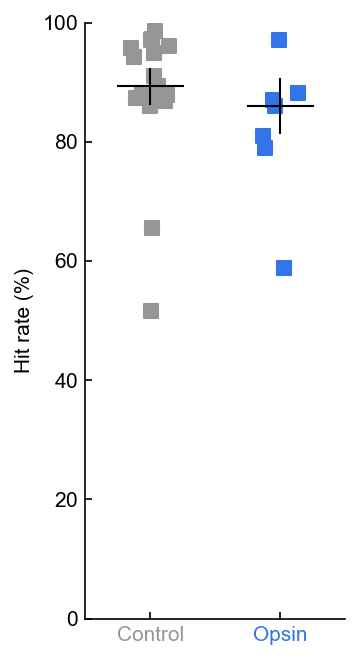

In [47]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

control_data = control_hits
opsin_data = opsin_hits

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

ax.set_ylim([0,100])
ax.set_ylabel('Hit rate (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opsin'])
colors = [GOOD_GREY,LASER_COLOR]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

print('mannwhitney')
test = mannwhitneyu(opsin_data,control_data)
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

#ax.text(0.5,2.575,str('****'),verticalalignment='bottom',horizontalalignment='center')
#ax.plot([0,1],[2.6]*2,color='k',lw=1)

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall hit rate at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V4

7 opto animals
4 control animals
ttest_ind
sig: False
pval: 0.08761870328766123


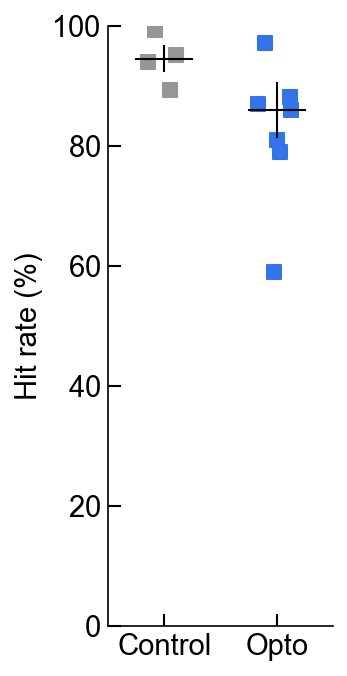

In [20]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

control_data = control_hits
opsin_data = opsin_hits

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([0,100])
ylab = ax.set_ylabel('Hit rate (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opto'])

# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
# for item in (ax.get_xticklabels()):
#     item.set_fontsize(stdfont*0.9)
#     pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

print(f"{len(ilep.rmnan(opsin_data))} opto animals")
print(f"{len(ilep.rmnan(control_data))} control animals")
print('ttest_ind')
test = ttest_ind(ilep.rmnan(opsin_data),ilep.rmnan(control_data))
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall hit rate at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

## V1

mannwhitney
sig: False
pval: 0.12970089915170008


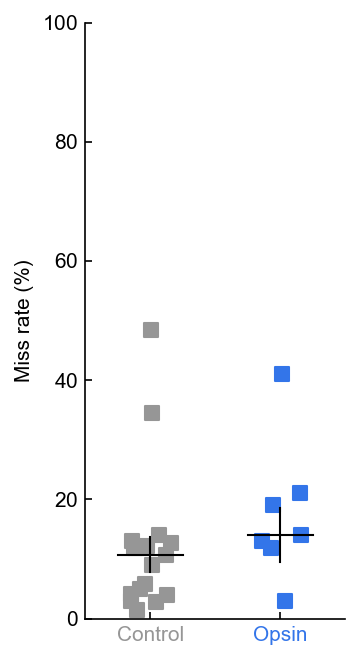

In [49]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

control_data = control_misses
opsin_data = opsin_misses

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

ax.set_ylim([0,100])
ax.set_ylabel('Miss rate (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opsin'])
colors = [GOOD_GREY,LASER_COLOR]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

print('mannwhitney')
test = mannwhitneyu(opsin_data,control_data)
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

#ax.text(0.5,2.575,str('****'),verticalalignment='bottom',horizontalalignment='center')
#ax.plot([0,1],[2.6]*2,color='k',lw=1)

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall miss rate at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V4

7 opto animals
4 control animals
ttest_ind
sig: False
pval: 0.08761870328766136


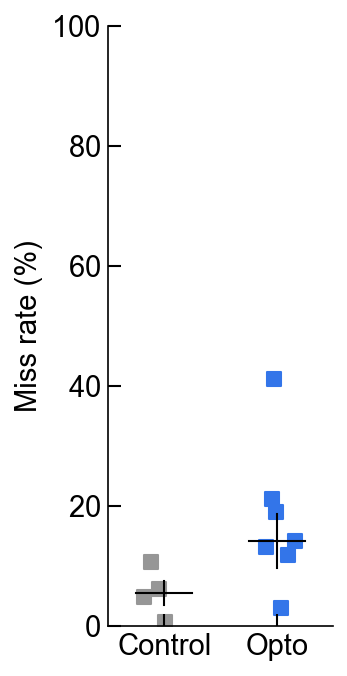

In [22]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

control_data = control_misses
opsin_data = opsin_misses

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([0,100])
ylab = ax.set_ylabel('Miss rate (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opto'])
# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
# for item in (ax.get_xticklabels()):
#     item.set_fontsize(stdfont*0.9)
#     pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)


print(f"{len(ilep.rmnan(opsin_data))} opto animals")
print(f"{len(ilep.rmnan(control_data))} control animals")
print('ttest_ind')
test = ttest_ind(ilep.rmnan(opsin_data),ilep.rmnan(control_data))
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall miss rate at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

## V1

mannwhitney
sig: True
pval: 5.778609897603032e-06


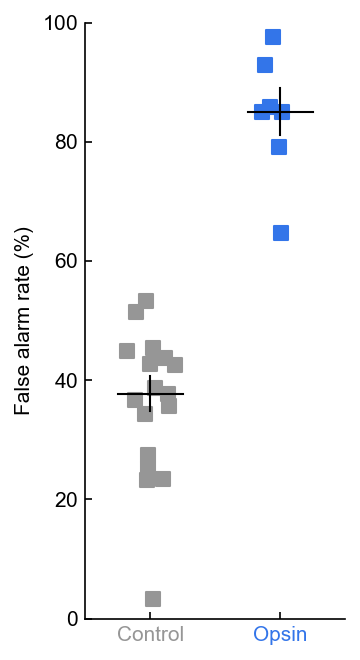

In [51]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

control_data = control_falarms
opsin_data = opsin_falarms

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

ax.set_ylim([0,100])
ax.set_ylabel('False alarm rate (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opsin'])
colors = [GOOD_GREY,LASER_COLOR]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

print('mannwhitney')
test = mannwhitneyu(opsin_data,control_data)
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

#ax.text(0.5,2.575,str('****'),verticalalignment='bottom',horizontalalignment='center')
#ax.plot([0,1],[2.6]*2,color='k',lw=1)

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall falarm rate at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V4

7 opto animals
4 control animals
ttest_ind
sig: True
pval: 0.00011121101542889444


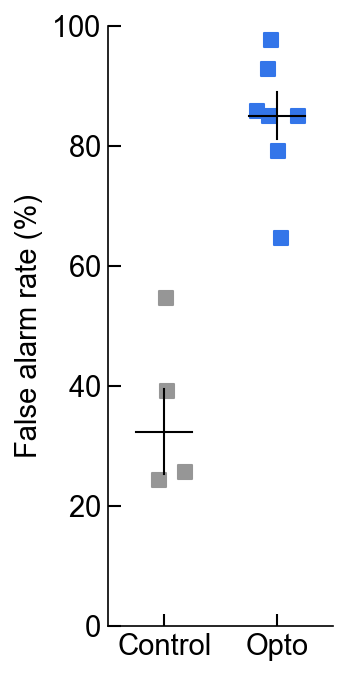

In [23]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

control_data = control_falarms
opsin_data = opsin_falarms

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([0,100])
ylab = ax.set_ylabel('False alarm rate (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opto'])

# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
# for item in (ax.get_xticklabels()):
#     item.set_fontsize(stdfont*0.9)
#     pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

print(f"{len(ilep.rmnan(opsin_data))} opto animals")
print(f"{len(ilep.rmnan(control_data))} control animals")
print('ttest_ind')
test = ttest_ind(ilep.rmnan(opsin_data),ilep.rmnan(control_data))
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall falarm rate at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

## V1

mannwhitney
sig: True
pval: 5.778609897603032e-06


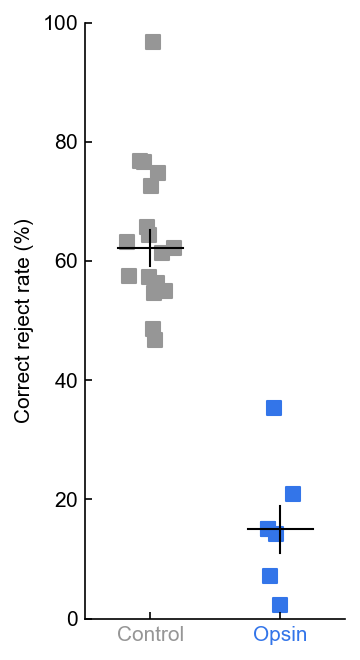

In [53]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

control_data = control_crejects
opsin_data = opsin_crejects

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

ax.set_ylim([0,100])
ax.set_ylabel('Correct reject rate (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opsin'])
colors = [GOOD_GREY,LASER_COLOR]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

print('mannwhitney')
test = mannwhitneyu(opsin_data,control_data)
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

#ax.text(0.5,2.575,str('****'),verticalalignment='bottom',horizontalalignment='center')
#ax.plot([0,1],[2.6]*2,color='k',lw=1)

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall creject rate at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V4

mannwhitney
sig: True
pval: 2.5799793601651186e-05


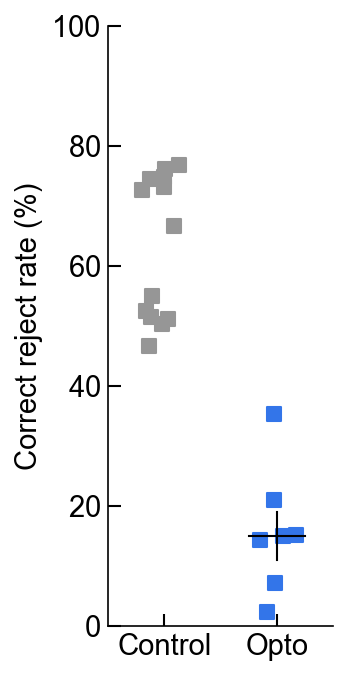

In [62]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

control_data = control_crejects
opsin_data = opsin_crejects

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.5)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([0,100])
ylab = ax.set_ylabel('Correct reject rate (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opto'])

# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
# for item in (ax.get_xticklabels()):
#     item.set_fontsize(stdfont*0.9)
#     pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

print('mannwhitney')
test = mannwhitneyu(ilep.rmnan(opsin_data),ilep.rmnan(control_data))
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall creject rate at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

## Combined

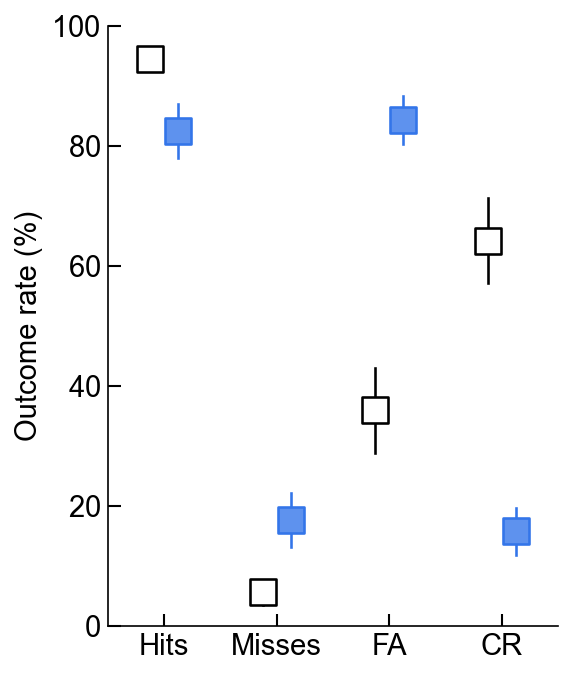

In [20]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

for idx,(control_data,opsin_data) in enumerate(zip([control_hits,control_misses,control_falarms,control_crejects],[opsin_hits,opsin_misses,opsin_falarms,opsin_crejects])):
    control_data = ilep.rmnan(control_data)
    opsin_data = ilep.rmnan(opsin_data)
    control_mean = np.mean(control_data)
    opsin_mean = np.mean(opsin_data)
    control_sem = sem(control_data)
    opsin_sem = sem(opsin_data)
    ax.plot([idx-0.125]*2,[control_mean-control_sem,control_mean+control_sem],color='k',lw=1.25)
    ax.plot([idx+0.125]*2,[opsin_mean-opsin_sem,opsin_mean+opsin_sem],color=LASER_COLOR,lw=1.25)
    ax.scatter([idx-0.125],[control_mean],s=150,ec='k',fc='white',zorder=10,lw=1.25,marker='s')
    ax.scatter([idx+0.125],[opsin_mean],s=150,ec=LASER_COLOR,fc=LIGHT_LASER,zorder=10,lw=1.25,marker='s')

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([0,100])
ylab = ax.set_ylabel('Outcome rate (%)')

ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Hits','Misses','FA','CR'])

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin trial outcomes at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [21]:
p1 = ttest_ind(ilep.rmnan(control_hits),ilep.rmnan(opsin_hits)).pvalue
p2 = ttest_ind(ilep.rmnan(control_misses),ilep.rmnan(opsin_misses)).pvalue
p3 = ttest_ind(ilep.rmnan(control_falarms),ilep.rmnan(opsin_falarms)).pvalue
p4 = ttest_ind(ilep.rmnan(control_crejects),ilep.rmnan(opsin_crejects)).pvalue
_,pvals = pg.multicomp([p1,p2,p3,p4],method='fdr_bh')
print(pvals)

[0.0876187  0.0876187  0.00022242 0.00022242]


## V1

mannwhitney
sig: True
pval: 0.0015479876160990713


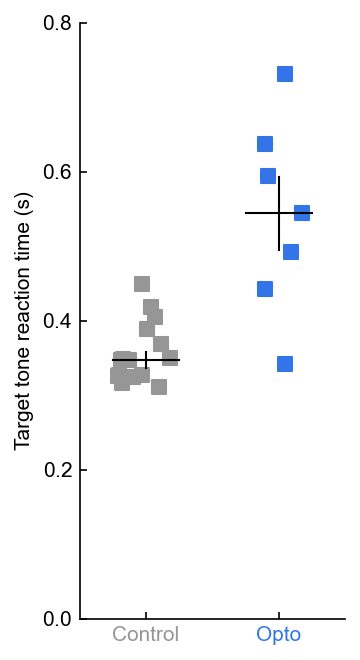

In [20]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

control_data = control_response_times_target
opsin_data = opsin_response_times_target

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.75)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

ax.set_ylim([0,0.8])
ax.set_yticks([0,0.2,0.4,0.6,0.8])
ax.set_ylabel('Target tone reaction time (s)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opto'])
colors = [GOOD_GREY,LASER_COLOR]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

print('mannwhitney')
test = mannwhitneyu(opsin_data,control_data)
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

#ax.text(0.5,2.575,str('****'),verticalalignment='bottom',horizontalalignment='center')
#ax.plot([0,1],[2.6]*2,color='k',lw=1)

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall response_times target at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V1

mannwhitney
sig: False
pval: nan


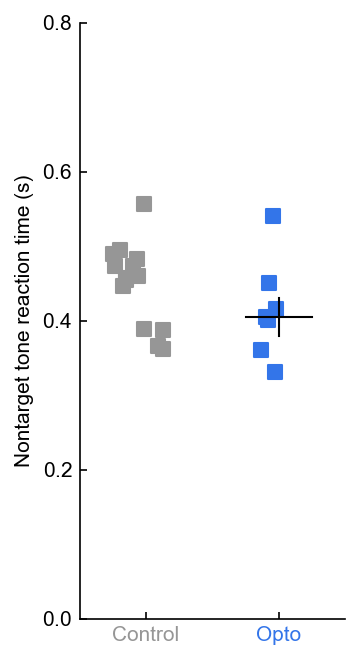

In [21]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

control_data = control_response_times_nontarget
opsin_data = opsin_response_times_nontarget

X,Y = ilep.violin(np.ones_like(opsin_data),opsin_data,width=0.5)
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
ax.plot([1-meanwidth,1+meanwidth],[np.median(opsin_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([1,1],[np.median(opsin_data)-data_sem,np.median(opsin_data)+data_sem],lw=1,color='k')

X,Y = ilep.violin(np.zeros_like(control_data),control_data,width=0.75)
#X = 0
#Y = control_dps
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
ax.plot([0-meanwidth,0+meanwidth],[np.median(control_data)]*2,lw=1,color='k')
data_sem = sem(Y)
ax.plot([0,0],[np.median(control_data)-data_sem,np.median(control_data)+data_sem],lw=1,color='k')

ax.set_ylim([0,0.8])
ax.set_yticks([0,0.2,0.4,0.6,0.8])
ax.set_ylabel('Nontarget tone reaction time (s)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opto'])
colors = [GOOD_GREY,LASER_COLOR]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

print('mannwhitney')
test = mannwhitneyu(opsin_data,control_data)
pval = test.pvalue
sig = np.abs(pval) < 0.05
print('sig: '+str(sig))
print('pval: '+str(pval))

#ax.text(0.5,2.575,str('****'),verticalalignment='bottom',horizontalalignment='center')
#ax.plot([0,1],[2.6]*2,color='k',lw=1)

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin overall response_times nontarget at cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [73]:
opsin_data_early

[0.7152756504786808,
 0.7451888204027183,
 0.9176932678735108,
 0.4818203318988002,
 0.6952270698757763,
 0.5475136365703448,
 0.3685428230008479]

In [74]:
opsin_data_cutoff

[0.49266751819982213,
 0.5943652033550555,
 0.6365239321441089,
 0.7306441451714375,
 0.5440067589802332,
 0.44203925525931526,
 0.34142603803239413]

In [33]:
len(X)

7

In [34]:
len(control_data_early)

4

# Response Rate early and late

## V1

ValueError: x and y must be the same size

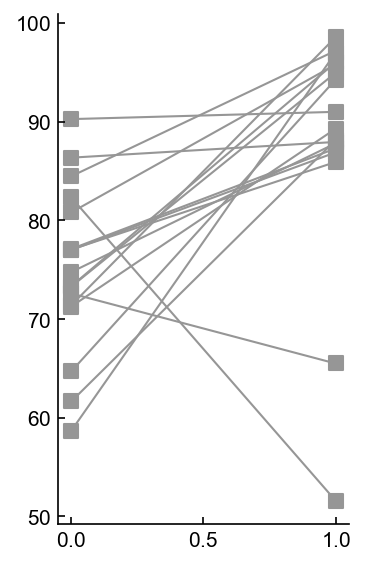

In [69]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

control_data_early = early_control_hits#hit_early_control
opsin_data_early = early_opsin_hits#hit_early_on
control_data_cutoff = control_hits
opsin_data_cutoff = opsin_hits

control_X = np.zeros_like(control_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(control_data_cutoff))
opsin_X = np.zeros_like(opsin_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(opsin_data_cutoff))

X = control_X
Y = control_data_early
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([0-meanwidth,0+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([0,0],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = control_X+1
Y = control_data_cutoff
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([1-meanwidth,1+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([1,1],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([control_X,control_X+1],[control_data_early,control_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)

X = opsin_X+2
Y = opsin_data_early
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([2-meanwidth,2+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([2,2],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = opsin_X+3
Y = opsin_data_cutoff
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([3-meanwidth,3+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([3,3],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([opsin_X+2,opsin_X+3],[opsin_data_early,opsin_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)




ax.set_ylim([0,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticks([100*d for d in [0,0.2,0.4,0.6,0.8,1]])
ax.set_ylabel('Response rate to target tone (%)')

ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Early','Expert','Early','Cutoff'])

ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin response rate target early vs cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V4

4
7
4
7
[1.95153518 1.93947591 2.04529103 2.04831499 2.03813768 1.98597014
 1.93609262]
[74.42603852590317, 62.30493337715973, 52.21225857311786, 67.12607052390335, 44.789733776609445, 69.49714536671058, 83.64259882778401]


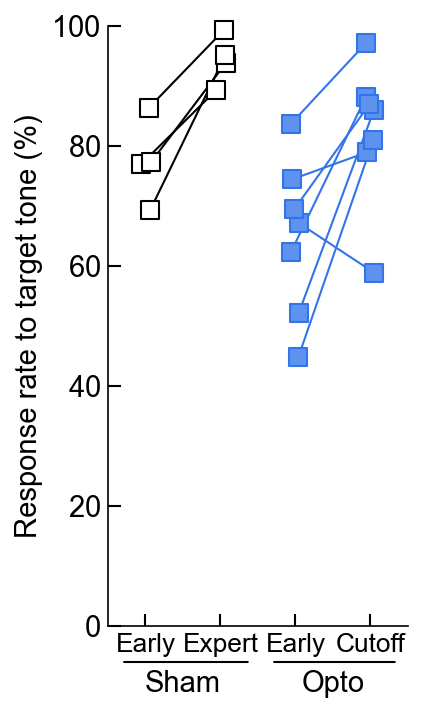

In [22]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################
sz=75

control_data_early = early_control_hits#hit_early_control
opsin_data_early = early_opsin_hits#hit_early_on
control_data_cutoff = control_hits
opsin_data_cutoff = opsin_hits

print(len(control_data_early))
print(len(opsin_data_early))
print(len(control_data_cutoff))
print(len(opsin_data_cutoff))

# control_X = np.zeros_like(control_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(control_data_cutoff))
# opsin_X = np.zeros_like(opsin_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(opsin_data_cutoff))
control_X = np.random.uniform(-0.1,0.1,size=len(control_data_cutoff))
opsin_X = np.random.uniform(-0.1,0.1,size=len(opsin_data_cutoff))

X = control_X
Y = control_data_early
ax.scatter(X,Y,ec='k',fc='white',s=sz,marker='s',clip_on=False)
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([0-meanwidth,0+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([0,0],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = control_X+1
Y = control_data_cutoff
ax.scatter(X,Y,ec='k',fc='white',s=sz,marker='s',clip_on=False)
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([1-meanwidth,1+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([1,1],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([control_X,control_X+1],[control_data_early,control_data_cutoff],zorder=-10,c='k',lw=1)

X = opsin_X+2
Y = opsin_data_early
print(X)
print(Y)
ax.scatter(X,Y,ec=LASER_COLOR,fc=LIGHT_LASER,s=sz,marker='s')
# ax.plot([2-meanwidth,2+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([2,2],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = opsin_X+3
Y = opsin_data_cutoff
ax.scatter(X,Y,ec=LASER_COLOR,fc=LIGHT_LASER,s=sz,marker='s')
# ax.plot([3-meanwidth,3+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([3,3],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([opsin_X+2,opsin_X+3],[opsin_data_early,opsin_data_cutoff],zorder=-10,c=LASER_COLOR,lw=1)

################################################################################################################

labels = ['Sham','Opto']

ax.set_ylim([0,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticks([100*d for d in [0,0.2,0.4,0.6,0.8,1]])
ylab = ax.set_ylabel('Response rate to target tone (%)')

ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Early','Expert','Early','Cutoff'])
# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

xtick_pos_pre = 0.5
xtick_pos_post = 2.5
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Sham', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Opto', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.97, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin response rate target early vs cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [23]:
X,Y = ilep.paired_rmnan(control_data_early,control_data_cutoff)
print(f"Control: {ttest_rel(X,Y).pvalue}")
X,Y = ilep.paired_rmnan(opsin_data_early,opsin_data_cutoff)
print(f"Opsin: {ttest_rel(X,Y).pvalue}")

Control: 0.01210464620854001
Opsin: 0.026947975977695875


## V1

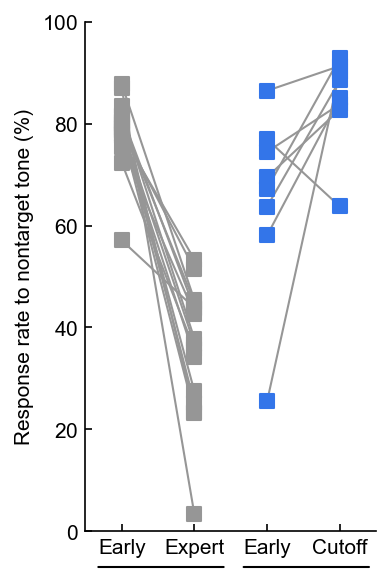

In [460]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

control_data_early = early_control_falarms#falarm_early_control
opsin_data_early = early_opsin_falarms#falarm_early_on
control_data_cutoff = control_falarms
opsin_data_cutoff = opsin_falarms

control_X = np.zeros_like(control_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(control_data_cutoff))
opsin_X = np.zeros_like(opsin_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(opsin_data_cutoff))

X = control_X
Y = control_data_early
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([0-meanwidth,0+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([0,0],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = control_X+1
Y = control_data_cutoff
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([1-meanwidth,1+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([1,1],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([control_X,control_X+1],[control_data_early,control_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)

X = opsin_X+2
Y = opsin_data_early
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([2-meanwidth,2+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([2,2],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')

X = opsin_X+3
Y = opsin_data_cutoff
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([3-meanwidth,3+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([3,3],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([opsin_X+2,opsin_X+3],[opsin_data_early,opsin_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)




ax.set_ylim([0,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticks([100*d for d in [0,0.2,0.4,0.6,0.8,1]])
ax.set_ylabel('Response rate to nontarget tone (%)')

ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Early','Expert','Early','Cutoff'])

ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin response rate nontarget early vs cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V4

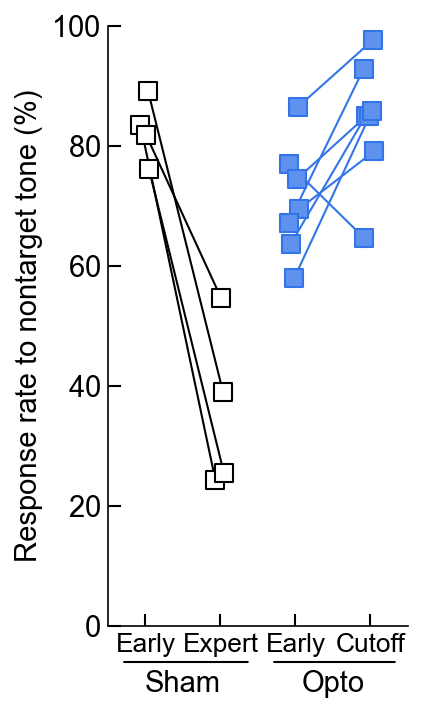

In [24]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################
sz=75

control_data_early = early_control_falarms#falarm_early_control
opsin_data_early = early_opsin_falarms#falarm_early_on
control_data_cutoff = control_falarms
opsin_data_cutoff = opsin_falarms

# control_X = np.zeros_like(control_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(control_data_cutoff))
# opsin_X = np.zeros_like(opsin_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(opsin_data_cutoff))
control_X = np.random.uniform(-0.1,0.1,size=len(control_data_cutoff))
opsin_X = np.random.uniform(-0.1,0.1,size=len(opsin_data_cutoff))

X = control_X
Y = control_data_early
ax.scatter(X,Y,ec='k',fc='white',s=sz,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([0-meanwidth,0+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([0,0],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = control_X+1
Y = control_data_cutoff
ax.scatter(X,Y,ec='k',fc='white',s=sz,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([1-meanwidth,1+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([1,1],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([control_X,control_X+1],[control_data_early,control_data_cutoff],zorder=-10,c='k',lw=1)

X = opsin_X+2
Y = opsin_data_early
ax.scatter(X,Y,ec=LASER_COLOR,fc=LIGHT_LASER,s=sz,marker='s')
# ax.plot([2-meanwidth,2+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([2,2],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')

X = opsin_X+3
Y = opsin_data_cutoff
ax.scatter(X,Y,ec=LASER_COLOR,fc=LIGHT_LASER,s=sz,marker='s')
# ax.plot([3-meanwidth,3+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([3,3],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([opsin_X+2,opsin_X+3],[opsin_data_early,opsin_data_cutoff],zorder=-10,c=LASER_COLOR,lw=1)

################################################################################################################

labels = ['Sham','Opto']

ax.set_ylim([0,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticks([100*d for d in [0,0.2,0.4,0.6,0.8,1]])
ylab = ax.set_ylabel('Response rate to nontarget tone (%)')

ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Early','Expert','Early','Cutoff'])
# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

xtick_pos_pre = 0.5
xtick_pos_post = 2.5
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Sham', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Opto', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.97, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin response rate nontarget early vs cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [25]:
X,Y = ilep.paired_rmnan(control_data_early,control_data_cutoff)
print(f"Control: {ttest_rel(X,Y).pvalue}")
X,Y = ilep.paired_rmnan(opsin_data_early,opsin_data_cutoff)
print(f"Opsin: {ttest_rel(X,Y).pvalue}")

Control: 0.006490387922061401
Opsin: 0.03842820536435824


4
7


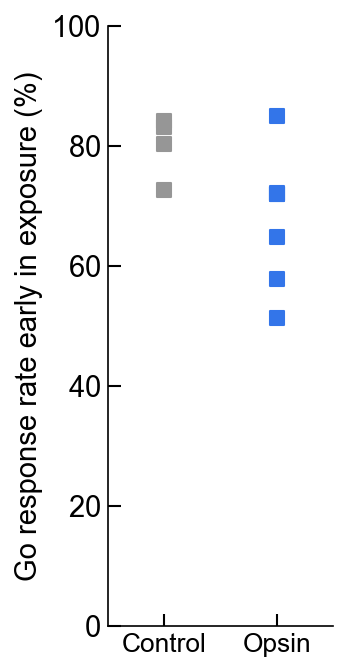

In [32]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

control_data_early = early_control_go#hit_early_control
opsin_data_early = early_opsin_go#hit_early_on

print(len(control_data_early))
print(len(opsin_data_early))

control_X = np.zeros_like(control_data_early)#np.random.uniform(-0.25,0.25,size=len(control_data_cutoff))
opsin_X = np.zeros_like(opsin_data_early)#np.random.uniform(-0.25,0.25,size=len(opsin_data_cutoff))

X = control_X
Y = control_data_early
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([0-meanwidth,0+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([0,0],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = opsin_X+1
Y = opsin_data_early
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([1-meanwidth,1+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([1,1],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
# ax.plot([control_X,control_X+1],[control_data_early,control_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([0,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticks([100*d for d in [0,0.2,0.4,0.6,0.8,1]])
ylab = ax.set_ylabel('Go response rate early in exposure (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opsin'])
# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# xtick_pos_pre = 0.5
# xtick_pos_post = 2.5
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Opto', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.97, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = []
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin response rate early V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [33]:
control_data_early = ilep.rmnan(early_control_go)#hit_early_control
opsin_data_early = ilep.rmnan(early_opsin_go)#hit_early_on

print(early_control_go)
print(early_opsin_go)

ttest_ind(control_data_early,opsin_data_early)

[80.22347378270989, 84.1816115721724, 83.06046465359769, 72.66888137062331]
[72.06771906242523, 64.71286923737662, 57.71841085566575, 71.95361855257896, 51.20547407287649, 71.87311794076635, 84.98417033560419]


Ttest_indResult(statistic=2.0536712107638873, pvalue=0.07019553446177622)

18
7


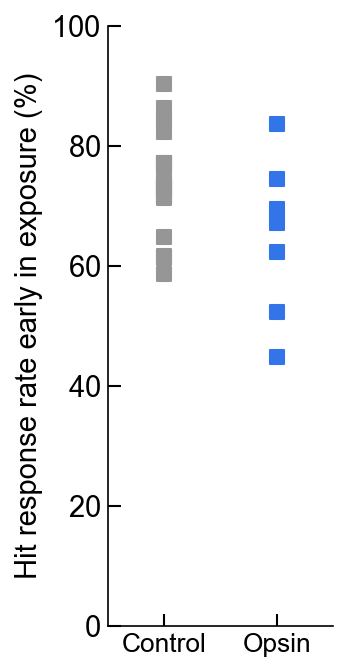

In [64]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

control_data_early = early_control_hits#hit_early_control
opsin_data_early = early_opsin_hits#hit_early_on

print(len(control_data_early))
print(len(opsin_data_early))

control_X = np.zeros_like(control_data_early)#np.random.uniform(-0.25,0.25,size=len(control_data_cutoff))
opsin_X = np.zeros_like(opsin_data_early)#np.random.uniform(-0.25,0.25,size=len(opsin_data_cutoff))

X = control_X
Y = control_data_early
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([0-meanwidth,0+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([0,0],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = opsin_X+1
Y = opsin_data_early
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([1-meanwidth,1+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([1,1],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
# ax.plot([control_X,control_X+1],[control_data_early,control_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([0,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticks([100*d for d in [0,0.2,0.4,0.6,0.8,1]])
ylab = ax.set_ylabel('Hit response rate early in exposure (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opsin'])
# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# xtick_pos_pre = 0.5
# xtick_pos_post = 2.5
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Opto', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.97, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = []
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin hit rate early V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [65]:
control_data_early = early_control_hits#hit_early_control
opsin_data_early = early_opsin_hits#hit_early_on

ttest_ind(control_data_early,opsin_data_early)

Ttest_indResult(statistic=2.033669385792944, pvalue=0.0536788831047387)

18
7


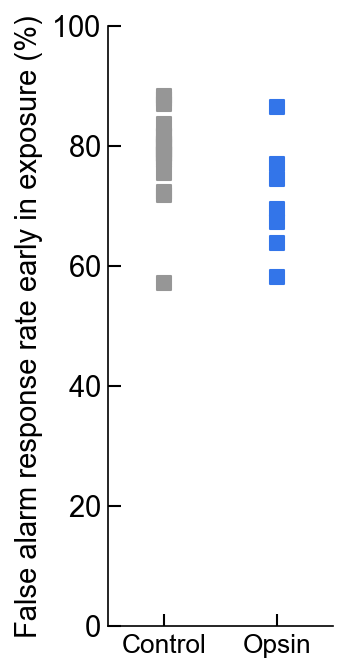

In [62]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

control_data_early = early_control_falarms#hit_early_control
opsin_data_early = early_opsin_falarms#hit_early_on

print(len(control_data_early))
print(len(opsin_data_early))

control_X = np.zeros_like(control_data_early)#np.random.uniform(-0.25,0.25,size=len(control_data_cutoff))
opsin_X = np.zeros_like(opsin_data_early)#np.random.uniform(-0.25,0.25,size=len(opsin_data_cutoff))

X = control_X
Y = control_data_early
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([0-meanwidth,0+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([0,0],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = opsin_X+1
Y = opsin_data_early
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([1-meanwidth,1+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([1,1],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
# ax.plot([control_X,control_X+1],[control_data_early,control_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([0,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticks([100*d for d in [0,0.2,0.4,0.6,0.8,1]])
ylab = ax.set_ylabel('False alarm response rate early in exposure (%)')

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','Opsin'])
# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

# xtick_pos_pre = 0.5
# xtick_pos_post = 2.5
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Opto', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.97, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = []
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin falarm rate early V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [63]:
control_data_early = early_control_falarms#hit_early_control
opsin_data_early = early_opsin_falarms#hit_early_on

ttest_ind(control_data_early,opsin_data_early)

Ttest_indResult(statistic=2.304443660388128, pvalue=0.030568488785637383)

# Response time early and late

## V1

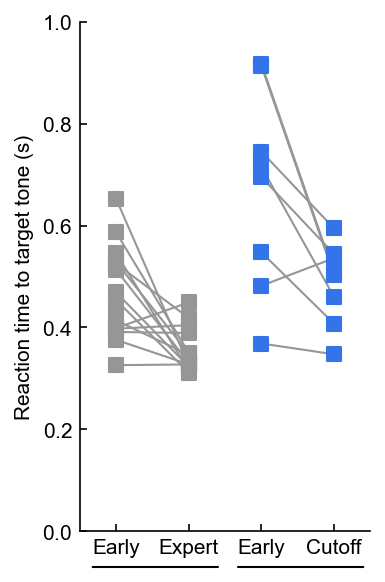

In [465]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

control_data_early = early_control_response_times_target#rxn_time_target_early_control
opsin_data_early = early_opsin_response_times_target#rxn_time_target_early_opsin
control_data_cutoff = control_response_times_target
opsin_data_cutoff = opsin_response_times_target

control_X = np.zeros_like(control_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(control_data_cutoff))
opsin_X = np.zeros_like(opsin_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(opsin_data_cutoff))

X = control_X
Y = control_data_early
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([0-meanwidth,0+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([0,0],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = control_X+1
Y = control_data_cutoff
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([1-meanwidth,1+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([1,1],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([control_X,control_X+1],[control_data_early,control_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)

X = opsin_X+2
Y = opsin_data_early
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([2-meanwidth,2+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([2,2],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = opsin_X+3
Y = opsin_data_cutoff
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([3-meanwidth,3+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([3,3],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([opsin_X+2,opsin_X+3],[opsin_data_early,opsin_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)




ax.set_ylim([0,1])
ax.set_ylabel('Reaction time to target tone (s)')

ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Early','Expert','Early','Cutoff'])

ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin reaction time target early vs cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V4

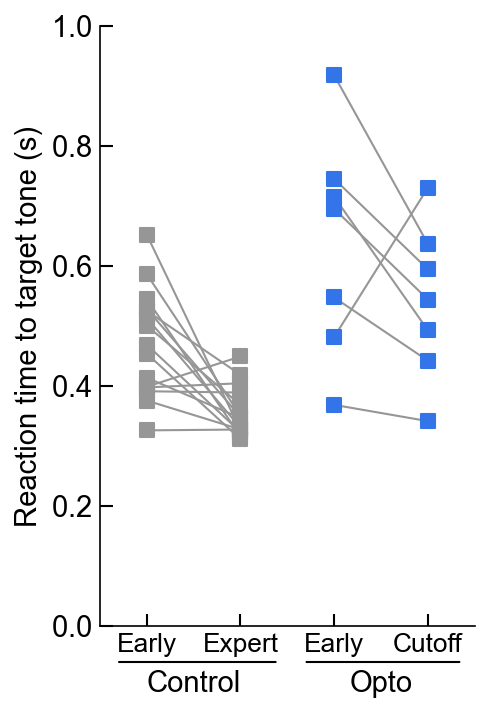

In [33]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

control_data_early = early_control_response_times_target#rxn_time_target_early_control
opsin_data_early = early_opsin_response_times_target#rxn_time_target_early_opsin
control_data_cutoff = control_response_times_target
opsin_data_cutoff = opsin_response_times_target

control_X = np.zeros_like(control_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(control_data_cutoff))
opsin_X = np.zeros_like(opsin_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(opsin_data_cutoff))

X = control_X
Y = control_data_early
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([0-meanwidth,0+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([0,0],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = control_X+1
Y = control_data_cutoff
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([1-meanwidth,1+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([1,1],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([control_X,control_X+1],[control_data_early,control_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)

X = opsin_X+2
Y = opsin_data_early
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([2-meanwidth,2+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([2,2],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = opsin_X+3
Y = opsin_data_cutoff
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([3-meanwidth,3+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([3,3],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([opsin_X+2,opsin_X+3],[opsin_data_early,opsin_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([0,1])
ylab = ax.set_ylabel('Reaction time to target tone (s)')

ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Early','Expert','Early','Cutoff'])
# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

xtick_pos_pre = 0.5
xtick_pos_post = 2.5
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Opto', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.97, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin reaction time target early vs cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [34]:
print(mannwhitneyu(ilep.rmnan(control_data_early),ilep.rmnan(opsin_data_early)).pvalue)
print(mannwhitneyu(ilep.rmnan(control_data_cutoff),ilep.rmnan(opsin_data_cutoff)).pvalue)

print()

# print(mannwhitneyu(ilep.rmnan(control_data_early),ilep.rmnan(control_data_cutoff)).pvalue)
# print(mannwhitneyu(ilep.rmnan(opsin_data_early),ilep.rmnan(opsin_data_cutoff)).pvalue)
# print(wilcoxon(ilep.rmnan(control_data_early),ilep.rmnan(control_data_cutoff)).pvalue)
# print(wilcoxon(ilep.rmnan(opsin_data_early),ilep.rmnan(opsin_data_cutoff)).pvalue)
print(ttest_rel(ilep.rmnan(control_data_early),ilep.rmnan(control_data_cutoff)).pvalue)
print(ttest_rel(ilep.rmnan(opsin_data_early),ilep.rmnan(opsin_data_cutoff)).pvalue)

0.03867623604465709
0.0011023548175250963

0.000852753632126244
0.18314657150061492


## V1

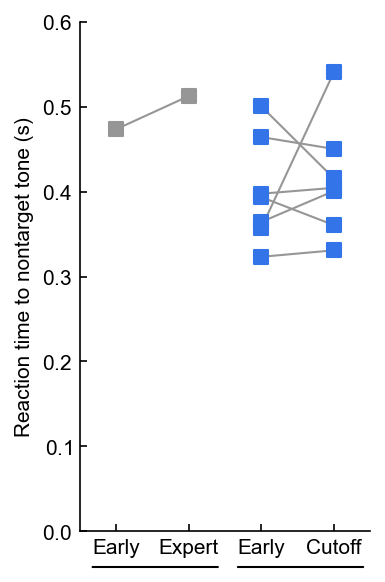

In [33]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
meanwidth = 0.25

control_data_early = early_control_response_times_nontarget#rxn_time_nontarget_early_control
opsin_data_early = early_opsin_response_times_nontarget#rxn_time_nontarget_early_opsin
control_data_cutoff = control_response_times_nontarget
opsin_data_cutoff = opsin_response_times_nontarget

control_X = np.zeros_like(control_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(control_data_cutoff))
opsin_X = np.zeros_like(opsin_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(opsin_data_cutoff))

X = control_X
Y = control_data_early
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([0-meanwidth,0+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([0,0],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = control_X+1
Y = control_data_cutoff
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([1-meanwidth,1+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([1,1],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([control_X,control_X+1],[control_data_early,control_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)

X = opsin_X+2
Y = opsin_data_early
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([2-meanwidth,2+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([2,2],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = opsin_X+3
Y = opsin_data_cutoff
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([3-meanwidth,3+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([3,3],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([opsin_X+2,opsin_X+3],[opsin_data_early,opsin_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)




ax.set_ylim([0,0.6])
ax.set_ylabel('Reaction time to nontarget tone (s)')

ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Early','Expert','Early','Cutoff'])

ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin reaction time nontarget early vs cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V4

[0.3943333355895099, 0.4156312913773337, 0.33621967909335987, 0.3374006292665066, 0.3979527283939809, 0.3580018159123882, 0.3497043603538976, 0.3961778664361001, 0.4166125094449289, 0.33825286764705886, 0.3524976948532482, 0.3491840941972229, 0.33199938842222765, 0.393035595651455, 0.36691937247780465]


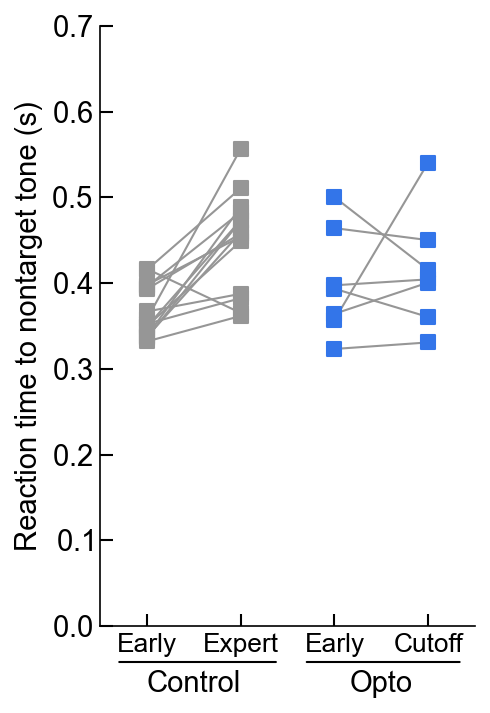

In [35]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
meanwidth = 0.25

################################################################################################################

control_data_early = early_control_response_times_nontarget#rxn_time_nontarget_early_control
opsin_data_early = early_opsin_response_times_nontarget#rxn_time_nontarget_early_opsin
control_data_cutoff = control_response_times_nontarget
opsin_data_cutoff = opsin_response_times_nontarget

print(control_data_early)

control_X = np.zeros_like(control_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(control_data_cutoff))
opsin_X = np.zeros_like(opsin_data_cutoff)#np.random.uniform(-0.25,0.25,size=len(opsin_data_cutoff))

X = control_X
Y = control_data_early
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([0-meanwidth,0+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([0,0],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = control_X+1
Y = control_data_cutoff
ax.scatter(X,Y,color=GOOD_GREY,s=40,marker='s')
# ax.scatter(X[len(X)-2:len(X)],Y[len(Y)-2:len(Y)],color='purple',s=20,marker='s')
# ax.plot([1-meanwidth,1+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([1,1],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([control_X,control_X+1],[control_data_early,control_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)

X = opsin_X+2
Y = opsin_data_early
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([2-meanwidth,2+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([2,2],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
X = opsin_X+3
Y = opsin_data_cutoff
ax.scatter(X,Y,color=LASER_COLOR,s=40,marker='s')
# ax.plot([3-meanwidth,3+meanwidth],[np.nanmedian(Y)]*2,lw=1,color='k')
# data_sem = sem(ilep.rmnan(Y))
# ax.plot([3,3],[np.nanmedian(Y)-data_sem,np.nanmedian(Y)+data_sem],lw=1,color='k')
ax.plot([opsin_X+2,opsin_X+3],[opsin_data_early,opsin_data_cutoff],zorder=-10,c=GOOD_GREY,lw=1)

################################################################################################################

labels = ['Control','Opto']

ax.set_ylim([0,0.7])
ylab = ax.set_ylabel('Reaction time to nontarget tone (s)')

ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Early','Expert','Early','Cutoff'])
# colors = [GOOD_GREY,LASER_COLOR]
# [t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

xtick_pos_pre = 0.5
xtick_pos_post = 2.5
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Opto', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.97, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin reaction time nontarget early vs cutoff V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [46]:
print(mannwhitneyu(ilep.rmnan(control_data_early),ilep.rmnan(opsin_data_early)).pvalue)
print(mannwhitneyu(ilep.rmnan(control_data_cutoff),ilep.rmnan(opsin_data_cutoff)).pvalue)

print()

print(mannwhitneyu(ilep.rmnan(control_data_early),ilep.rmnan(control_data_cutoff)).pvalue)
print(mannwhitneyu(ilep.rmnan(opsin_data_early),ilep.rmnan(opsin_data_cutoff)).pvalue)
X,Y = ilep.paired_rmnan(control_data_early,control_data_cutoff)
print(wilcoxon(X,Y).pvalue)
X,Y = ilep.paired_rmnan(opsin_data_early,opsin_data_cutoff)
print(wilcoxon(X,Y).pvalue)


X,Y = ilep.paired_rmnan(control_data_early,control_data_cutoff)
print(ttest_rel(X,Y).pvalue)
X,Y = ilep.paired_rmnan(opsin_data_early,opsin_data_cutoff)
print(ttest_rel(X,Y).pvalue)


0.33219579697907864
0.17175782593739253

0.0006124933033192019
0.534965034965035
0.0008544921875
0.9375
0.000309127358207223
0.6593046693997162


In [133]:
control_data_early

[0.3943333355895099,
 0.4156312913773337,
 0.33621967909335987,
 0.3374006292665066,
 0.3979527283939809,
 0.3580018159123882,
 0.3497043603538976,
 0.3961778664361001,
 0.4166125094449289,
 0.33825286764705886,
 0.3524976948532482,
 0.3491840941972229,
 0.33199938842222765,
 0.393035595651455,
 0.36691937247780465]

In [134]:
control_data_cutoff

[nan,
 0.51070038353182,
 0.4727369442151155,
 0.45918,
 0.45419689713610667,
 0.5566190484884755,
 0.44893206031884864,
 0.48290338877338873,
 0.36528671874999996,
 0.48882538200339565,
 0.38246964087301594,
 0.4735205,
 0.36171366666666666,
 0.45782841158059473,
 0.38753724074074075]

In [59]:
len(control_data_early)

18

# Reaction time calculated from recordings

In [270]:
rxn_time_early_target_control = []
rxn_time_early_nontarget_control = []
rxn_time_expert_target_control = []
rxn_time_expert_nontarget_control = []

rxn_time_early_target = []
rxn_time_early_nontarget = []
rxn_time_cutoff_target = []
rxn_time_cutoff_nontarget = []

for idx,(session) in tqdm(enumerate(np.unique(EnumSession))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    day = sessionfile.meta.day_of_training
    rev = animalBehaviors[sessionfile.meta.animal].reversal
    
    cutoff_day = np.nan
    try:
        max_day = np.max([k for k in animalBehaviors[animal].sessions]) - animalBehaviors[animal].reversal
        if max_day > 12:
            max_day = 12
        
        if hasattr(animalBehaviors[animal],'cloudiness') and animalBehaviors[animal].cloudiness <= max_day:
            max_day = animalBehaviors[animal].cloudiness - 1
            
        if max_day < 6:
            continue
            
        cutoff_day = animalBehaviors[animal].reversal + max_day
        
    except Exception as e:
        raise e
        pass
    
    if (day-rev != 1) and (day != cutoff_day):
        continue
    
    allconds = ilep.getAllConditions(sessionfile,None)
    gotrials = allconds['go'].trials
    
    starts = sessionfile.trials.starts[gotrials]
    responses = sessionfile.trials.response[gotrials]
    response_relative = responses - starts
    response_relative = response_relative * 1000 / sessionfile.meta.fs
    
    if day-rev == 1:
        print(sessionfile.meta.animal)
        rxn_time_early_target_control.append(np.mean(response_relative))
    if day != cutoff_day:
        rxn_time_expert_target_control.append(np.median(response_relative))
        
    if np.random.rand()<0.25:
        break

3it [00:00, 16.76it/s]

BS_119
BS_123


20it [00:00, 25.15it/s]

BS_128


In [271]:
rxn_time_early_target_control

[604.9173737373737, 740.2830601092895, 559.2102409638554]

In [256]:
rxn_time_expert_target_control

[304.75]

In [221]:
rxn_time_target_early_control

[0.5253415338466296,
 0.5134432142545637,
 0.3260510165262227,
 nan,
 nan,
 0.528382430420203,
 0.41387440291969435,
 0.5865641661843738,
 0.6524635483741066,
 0.5452689214866611,
 0.3987696212121212,
 0.46892912092447875,
 0.454002381875011,
 0.44228065969413194,
 nan,
 0.37575049205312694,
 0.3912610006669075]

In [279]:
sessionfile = ilep.getRandomSession(act_directory)
sessionfile.meta

namespace(directory='D:\\DualRecording\\AE_238\\AE_238 23\\AC\\',
          region='AC',
          animal='AE_238',
          probe=11417,
          date='05/16/2023',
          depth=1167,
          task='second reversal',
          day_of_training=47,
          day_of_recording=23,
          day_of_reversal=29,
          length_in_samples=39983392.0,
          files=['May 16 2023 AC Second Reversal AE_238_23001',
                 'May 16 2023 AC Second Reversal AE_238_23002'],
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0.2,
          lickdelayrelativetotone=0.1,
          fs=30000,
          length_in_seconds=1332.7797333333333,
          length_in_minutes=22.212995555555555,
          length_in_trials=298)

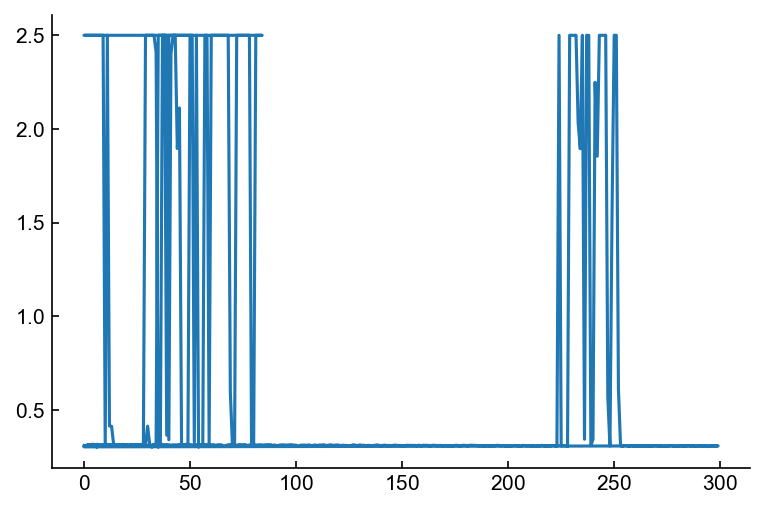

In [230]:
plt.plot(animalBehaviors[sessionfile.meta.animal].sessions[sessionfile.meta.day_of_training].response_time)

In [280]:
times = np.array(animalBehaviors[sessionfile.meta.animal].sessions[sessionfile.meta.day_of_training].response_time)
nogo_mask = np.less(times,2.5)
times = times[nogo_mask]
print(times)

[1.6637  0.5869  0.31031 0.30603 0.31195 0.305   0.36291 1.7125  0.60713
 0.7948  0.30193 0.304   0.3075  0.32291 0.5487  0.30401 0.32459 0.30418
 0.30179 0.44801 0.30596 0.3011  0.30263 0.30227 0.45789 0.30483 0.30514
 0.57968 0.32944 0.30399 2.1022  0.37552 0.30162 0.30419 0.31424 0.30639
 0.30451 0.31139 0.30784 0.4966  0.63306 0.30075 0.30051 0.61967 0.57081
 0.66916 0.94378 0.6335  0.31459 0.50918 0.42996 0.31488 0.30094 0.30459
 0.63687 0.3006  0.30264 0.31038 0.42632 0.30126 0.55582 0.31539 1.737
 0.35128 0.50433 0.31466 0.46465 0.31332 0.49116 0.31168 0.30126 0.30076
 0.73777 0.31395 0.71926 0.30048 0.51901 0.3987  0.31412 1.7646  0.52128
 0.45309 0.99586 1.398   0.48557 0.30196 0.31292 0.31401 0.45367 1.4333
 0.30351 1.3706  0.56843 2.0269  0.44942 0.30073 0.31335 0.30246 0.31364
 0.47507 1.5264  0.31485 0.30638 0.31283 0.30878 0.39143 0.31278 0.31026
 0.31467 0.31149 0.60326 0.32959 0.31293 0.30236 0.33126 0.50086 0.37321
 0.31423 0.59177 0.61308 0.30324 0.32403 0.31275 0.313

In [281]:
np.mean(times)

0.4681575545851528

In [282]:
allconds = ilep.getAllConditions(sessionfile,None)
gotrials = allconds['go'].trials

starts = sessionfile.trials.starts[gotrials]
responses = sessionfile.trials.response[gotrials]
response_relative = responses - starts
response_relative = response_relative / sessionfile.meta.fs
print(response_relative)

[0.37083333 0.50096667 0.22763333 0.34026667 0.29003333 0.22903333
 0.399      0.2713     0.241      0.48956667 0.51093333 0.3211
 0.22206667 0.23183333 0.51846667 0.32553333 0.34383333 0.20063333
 0.30383333 0.27616667 0.54683333 0.20926667 0.31963333 0.2726
 0.57563333 0.23196667 0.3497     0.70856667 0.2938     0.69273333
 0.2462     0.33176667 0.3688     0.26683333 0.30673333 0.54303333
 0.59533333 0.31406667 0.40196667 0.24896667 1.32976667 0.41156667
 0.25593333 0.3076     0.22106667 0.36343333 0.5782     0.24653333
 0.3114     0.2736     0.2088     0.2081     0.22473333 0.20293333
 0.25736667 0.24843333 0.30873333 0.29236667 0.21613333 0.347
 0.27153333 0.34013333 0.29326667 0.33533333 0.3711     0.3059
 0.27733333 0.27963333 0.29763333 0.20546667 2.1178     0.5505
 0.32786667 0.30566667 0.36496667 0.25506667 0.2003     0.3054
 0.34443333 0.3095     0.53463333 0.2142     0.3889     0.2147
 0.397      0.2151     0.36463333 0.2502     0.23026667 0.24226667
 0.23153333 0.2135     1

In [283]:
np.mean(response_relative)

0.3671539215686275

ValueError: x and y must have same first dimension, but have shapes (229,) and (102,)

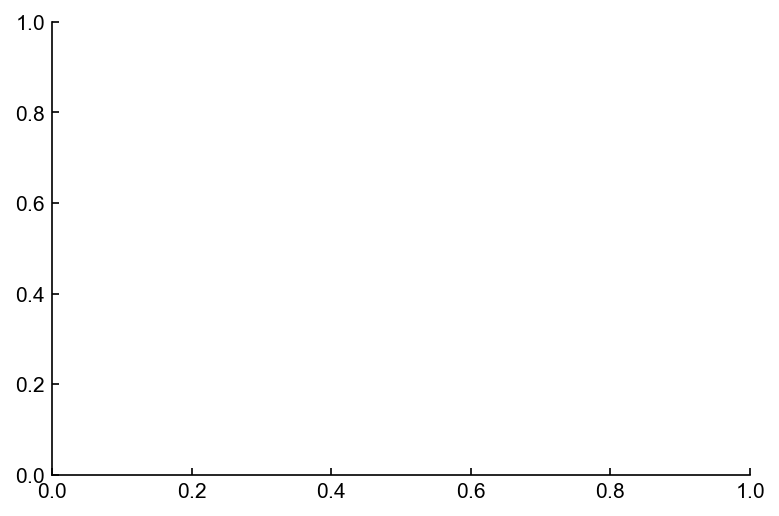

In [284]:
plt.plot(times,response_relative)

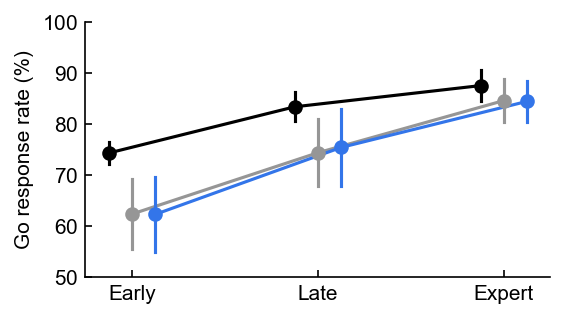

In [89]:
fig, ax = plt.subplots(figsize=(4,4.5/2))

data_on = [hit_early_on,hit_late_on,hit_expert_on]
data_off = [hit_early_off,hit_late_off,hit_expert_off]
data_control = [hit_early_control,hit_late_control,hit_expert_control]

sem_on = [sem(ilep.rmnan(d)) for d in data_on]
data_on = [np.nanmean(d) for d in data_on]
sem_off = [sem(ilep.rmnan(d)) for d in data_off]
data_off = [np.nanmean(d) for d in data_off]
sem_control = [sem(ilep.rmnan(d)) for d in data_control]
data_control = [np.nanmean(d) for d in data_control]



ax.scatter(np.array([0,1,2])-0.125,data_control,color='k',zorder=10)
ax.scatter(np.array([0,1,2]),data_off,color=GOOD_GREY,zorder=10)
ax.scatter(np.array([0,1,2])+0.125,data_on,color=LASER_COLOR,zorder=10)

ax.plot(np.array([0,1,2])-0.125,data_control,color='k')
ax.plot(np.array([0,1,2]),data_off,color=GOOD_GREY)
ax.plot(np.array([0,1,2])+0.125,data_on,color=LASER_COLOR)

for idx in range(3):
    ax.plot([idx-0.125]*2,[data_control[idx]-sem_control[idx],data_control[idx]+sem_control[idx]],color='k')
    ax.plot([idx]*2,[data_off[idx]-sem_off[idx],data_off[idx]+sem_off[idx]],color=GOOD_GREY)
    ax.plot([idx+0.125]*2,[data_on[idx]-sem_on[idx],data_on[idx]+sem_on[idx]],color=LASER_COLOR)

ax.set_ylim([50,100])
ax.set_ylabel('Go response rate (%)')

ax.set_xlim([-0.25,2.25])
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Early','Late','Expert'])

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin go response rate over learning 11kHz V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

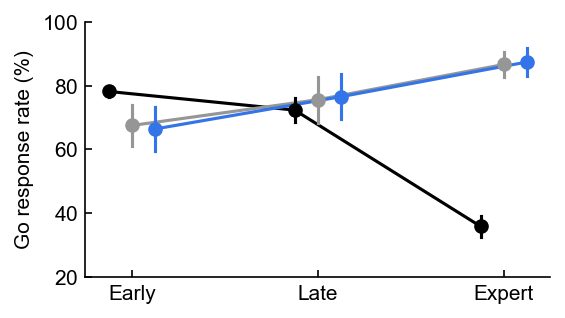

In [90]:
fig, ax = plt.subplots(figsize=(4,4.5/2))

data_on = [falarm_early_on,falarm_late_on,falarm_expert_on]
data_off = [falarm_early_off,falarm_late_off,falarm_expert_off]
data_control = [falarm_early_control,falarm_late_control,falarm_expert_control]

sem_on = [sem(ilep.rmnan(d)) for d in data_on]
data_on = [np.nanmean(d) for d in data_on]
sem_off = [sem(ilep.rmnan(d)) for d in data_off]
data_off = [np.nanmean(d) for d in data_off]
sem_control = [sem(ilep.rmnan(d)) for d in data_control]
data_control = [np.nanmean(d) for d in data_control]



ax.scatter(np.array([0,1,2])-0.125,data_control,color='k',zorder=10)
ax.scatter(np.array([0,1,2]),data_off,color=GOOD_GREY,zorder=10)
ax.scatter(np.array([0,1,2])+0.125,data_on,color=LASER_COLOR,zorder=10)

ax.plot(np.array([0,1,2])-0.125,data_control,color='k')
ax.plot(np.array([0,1,2]),data_off,color=GOOD_GREY)
ax.plot(np.array([0,1,2])+0.125,data_on,color=LASER_COLOR)

for idx in range(3):
    ax.plot([idx-0.125]*2,[data_control[idx]-sem_control[idx],data_control[idx]+sem_control[idx]],color='k')
    ax.plot([idx]*2,[data_off[idx]-sem_off[idx],data_off[idx]+sem_off[idx]],color=GOOD_GREY)
    ax.plot([idx+0.125]*2,[data_on[idx]-sem_on[idx],data_on[idx]+sem_on[idx]],color=LASER_COLOR)

ax.set_ylim([20,100])
ax.set_ylabel('Go response rate (%)')

ax.set_xlim([-0.25,2.25])
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Early','Late','Expert'])

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin go response rate over learning 5kHz V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

# ON - OFF Late Data

In [60]:
animals

['BS_86', 'BS_100', 'BS_119', 'BS_123', 'BS_128', 'BS_131', 'BS_163', 'BS_174']

BS_86


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: cannot convert float NaN to integer

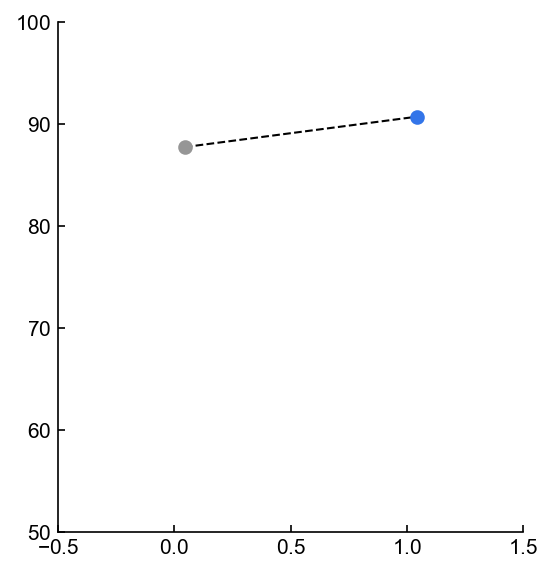

In [80]:
dp_early_control = []
dp_late_control = []
dp_expert_control = []
dp_early_on = []
dp_late_on = []
dp_expert_on = []
dp_early_off = []
dp_late_off = []
dp_expert_off = []

pc_early_control = []
pc_late_control = []
pc_expert_control = []
pc_early_on = []
pc_late_on = []
pc_expert_on = []
pc_early_off = []
pc_late_off = []
pc_expert_off = []

hit_early_control = []
hit_late_control = []
hit_expert_control = []
hit_early_on = []
hit_late_on = []
hit_expert_on = []
hit_early_off = []
hit_late_off = []
hit_expert_off = []

miss_early_control = []
miss_late_control = []
miss_expert_control = []
miss_early_on = []
miss_late_on = []
miss_expert_on = []
miss_early_off = []
miss_late_off = []
miss_expert_off = []

falarm_early_control = []
falarm_late_control = []
falarm_expert_control = []
falarm_early_on = []
falarm_late_on = []
falarm_expert_on = []
falarm_early_off = []
falarm_late_off = []
falarm_expert_off = []

creject_early_control = []
creject_late_control = []
creject_expert_control = []
creject_early_on = []
creject_late_on = []
creject_expert_on = []
creject_early_off = []
creject_late_off = []
creject_expert_off = []

go_rate_target_early_control = []
go_rate_target_late_control = []
go_rate_target_expert_control = []
go_rate_target_early_on = []
go_rate_target_late_on = []
go_rate_target_expert_on = []
go_rate_target_early_off = []
go_rate_target_late_off = []
go_rate_target_expert_off = []

go_rate_nontarget_early_control = []
go_rate_nontarget_late_control = []
go_rate_nontarget_expert_control = []
go_rate_nontarget_early_on = []
go_rate_nontarget_late_on = []
go_rate_nontarget_expert_on = []
go_rate_nontarget_early_off = []
go_rate_nontarget_late_off = []
go_rate_nontarget_expert_off = []

for animal in did_not_learn_animals:
    print(animal)
    
    animal_dp_early_on = []
    animal_dp_early_off = []
    animal_dp_late_on = []
    animal_dp_late_off = []
    animal_dp_expert_on = []
    animal_dp_expert_off = []
    
    animal_pc_early_on = []
    animal_pc_early_off = []
    animal_pc_late_on = []
    animal_pc_late_off = []
    animal_pc_expert_on = []
    animal_pc_expert_off = []
    
    animal_hit_early_on = []
    animal_hit_early_off = []
    animal_hit_late_on = []
    animal_hit_late_off = []
    animal_hit_expert_on = []
    animal_hit_expert_off = []
    
    animal_miss_early_on = []
    animal_miss_early_off = []
    animal_miss_late_on = []
    animal_miss_late_off = []
    animal_miss_expert_on = []
    animal_miss_expert_off = []
    
    animal_falarm_early_on = []
    animal_falarm_early_off = []
    animal_falarm_late_on = []
    animal_falarm_late_off = []
    animal_falarm_expert_on = []
    animal_falarm_expert_off = []
    
    animal_creject_early_on = []
    animal_creject_early_off = []
    animal_creject_late_on = []
    animal_creject_late_off = []
    animal_creject_expert_on = []
    animal_creject_expert_off = []
    
    animal_go_rate_target_early_on = []
    animal_go_rate_target_early_off = []
    animal_go_rate_target_late_on = []
    animal_go_rate_target_late_off = []
    animal_go_rate_target_expert_on = []
    animal_go_rate_target_expert_off = []
    
    animal_go_rate_nontarget_early_on = []
    animal_go_rate_nontarget_early_off = []
    animal_go_rate_nontarget_late_on = []
    animal_go_rate_nontarget_late_off = []
    animal_go_rate_nontarget_expert_on = []
    animal_go_rate_nontarget_expert_off = []

    days = np.array(range(len(animalBehaviors[animal].sessions)))+1
    days_mask_rev = np.greater(days,animalBehaviors[animal].reversal)
    days_mask_cloud = np.less(days,animalBehaviors[animal].cloudiness)
    days_mask = np.logical_and(days_mask_rev,days_mask_cloud)
    days = days[days_mask]
    
    for day in days:
        session_outcomes = animalBehaviors[animal].sessions[day].outcomes
        outcomes_on = animalBehaviors[animal].sessions[day].outcomes[animalBehaviors[animal].sessions[day].laser]
        outcomes_off = animalBehaviors[animal].sessions[day].outcomes[np.logical_not(animalBehaviors[animal].sessions[day].laser)]
        
        pc_on,dp_on = ilep.pcdpFromOutcomes(outcomes_on)
        pc_off,dp_off = ilep.pcdpFromOutcomes(outcomes_off)
        hit_on = np.sum(np.equal(outcomes_on,1))
        miss_on = np.sum(np.equal(outcomes_on,2))
        falarm_on = np.sum(np.equal(outcomes_on,3))
        creject_on = np.sum(np.equal(outcomes_on,4))
        hit_off = np.sum(np.equal(outcomes_off,1))
        miss_off = np.sum(np.equal(outcomes_off,2))
        falarm_off = np.sum(np.equal(outcomes_off,3))
        creject_off = np.sum(np.equal(outcomes_off,4))
        
        if (day - animalBehaviors[animal].reversal) <= 4:
            animal_dp_early_on.append(dp_on)
            animal_dp_early_off.append(dp_off)
            animal_pc_early_on.append(pc_on*100)
            animal_pc_early_off.append(pc_off*100)
            animal_hit_early_off.append(hit_off/(hit_off+miss_off)*100)
            animal_miss_early_off.append(miss_off/(hit_off+miss_off)*100)
            animal_falarm_early_off.append(falarm_off/(falarm_off+creject_off)*100)
            animal_creject_early_off.append(creject_off/(falarm_off+creject_off)*100)
            animal_hit_early_on.append(hit_on/(hit_on+miss_on)*100)
            animal_miss_early_on.append(miss_on/(hit_on+miss_on)*100)
            animal_falarm_early_on.append(falarm_on/(falarm_on+creject_on)*100)
            animal_creject_early_on.append(creject_on/(falarm_on+creject_on)*100)
        elif (day - animalBehaviors[animal].reversal) <= 7:
            animal_dp_late_on.append(dp_on)
            animal_dp_late_off.append(dp_off)
            animal_pc_late_on.append(pc_on*100)
            animal_pc_late_off.append(pc_off*100)
            animal_hit_late_off.append(hit_off/(hit_off+miss_off)*100)
            animal_miss_late_off.append(miss_off/(hit_off+miss_off)*100)
            animal_falarm_late_off.append(falarm_off/(falarm_off+creject_off)*100)
            animal_creject_late_off.append(creject_off/(falarm_off+creject_off)*100)
            animal_hit_late_on.append(hit_on/(hit_on+miss_on)*100)
            animal_miss_late_on.append(miss_on/(hit_on+miss_on)*100)
            animal_falarm_late_on.append(falarm_on/(falarm_on+creject_on)*100)
            animal_creject_late_on.append(creject_on/(falarm_on+creject_on)*100)
        elif (day - animalBehaviors[animal].reversal) > 7:
            animal_dp_expert_on.append(dp_on)
            animal_dp_expert_off.append(dp_off)
            animal_pc_expert_on.append(pc_on*100)
            animal_pc_expert_off.append(pc_off*100)
            animal_hit_expert_off.append(hit_off/(hit_off+miss_off)*100)
            animal_miss_expert_off.append(miss_off/(hit_off+miss_off)*100)
            animal_falarm_expert_off.append(falarm_off/(falarm_off+creject_off)*100)
            animal_creject_expert_off.append(creject_off/(falarm_off+creject_off)*100)
            animal_hit_expert_on.append(hit_on/(hit_on+miss_on)*100)
            animal_miss_expert_on.append(miss_on/(hit_on+miss_on)*100)
            animal_falarm_expert_on.append(falarm_on/(falarm_on+creject_on)*100)
            animal_creject_expert_on.append(creject_on/(falarm_on+creject_on)*100)
            
    dp_early_on.append(np.mean(animal_dp_early_on))
    dp_late_on.append(np.mean(animal_dp_late_on))
    dp_expert_on.append(np.mean(animal_dp_expert_on))
    dp_early_off.append(np.mean(animal_dp_early_off))
    dp_late_off.append(np.mean(animal_dp_late_off))
    dp_expert_off.append(np.mean(animal_dp_expert_off))
    
    pc_early_on.append(np.mean(animal_pc_early_on))
    pc_late_on.append(np.mean(animal_pc_late_on))
    pc_expert_on.append(np.mean(animal_pc_expert_on))
    pc_early_off.append(np.mean(animal_pc_early_off))
    pc_late_off.append(np.mean(animal_pc_late_off))
    pc_expert_off.append(np.mean(animal_pc_expert_off))
    
    hit_early_on.append(np.mean(animal_hit_early_on))
    hit_late_on.append(np.mean(animal_hit_late_on))
    hit_expert_on.append(np.mean(animal_hit_expert_on))
    hit_early_off.append(np.mean(animal_hit_early_off))
    hit_late_off.append(np.mean(animal_hit_late_off))
    hit_expert_off.append(np.mean(animal_hit_expert_off))
    
    miss_early_on.append(np.mean(animal_miss_early_on))
    miss_late_on.append(np.mean(animal_miss_late_on))
    miss_expert_on.append(np.mean(animal_miss_expert_on))
    miss_early_off.append(np.mean(animal_miss_early_off))
    miss_late_off.append(np.mean(animal_miss_late_off))
    miss_expert_off.append(np.mean(animal_miss_expert_off))
    
    falarm_early_on.append(np.mean(animal_falarm_early_on))
    falarm_late_on.append(np.mean(animal_falarm_late_on))
    falarm_expert_on.append(np.mean(animal_falarm_expert_on))
    falarm_early_off.append(np.mean(animal_falarm_early_off))
    falarm_late_off.append(np.mean(animal_falarm_late_off))
    falarm_expert_off.append(np.mean(animal_falarm_expert_off))
    
    creject_early_on.append(np.mean(animal_creject_early_on))
    creject_late_on.append(np.mean(animal_creject_late_on))
    creject_expert_on.append(np.mean(animal_creject_expert_on))
    creject_early_off.append(np.mean(animal_creject_early_off))
    creject_late_off.append(np.mean(animal_creject_late_off))
    creject_expert_off.append(np.mean(animal_creject_expert_off))
    
    ###########################################################################################
    
    fig, ax = plt.subplots(figsize=(4,4.5))
    wid=0.25
    
    off = np.copy(animal_falarm_late_off)
    on = np.copy(animal_falarm_late_on)
    
    Xs = np.random.uniform(low=-wid,high=wid,size=len(off))
    ax.scatter(Xs,off,c=GOOD_GREY)
    ax.scatter(Xs+1,on,c=LASER_COLOR)
    ax.plot([Xs,Xs+1],[off,on],lw=1,color='k',linestyle='--',zorder=-10)
    
    ax.set_xlim([-0.5,1.5])
    ax.set_ylim([50,100])
    #ax.set_ylim([-0.5,2.5])
    
    pval = ttest_rel(off,on).pvalue
    ax.set_title(f"{animal} p={round(100*pval)/100}")
    
    ###########################################################################################
    #break

In [25]:
type('string')

str

In [26]:
type(['str','ing'])

list

In [84]:
ephys_animals_use_for_days

['BS_40',
 'BS_41',
 'BS_42',
 'BS_49',
 'BS_51',
 'BS_56',
 'BS_59',
 'BS_67',
 'BS_70',
 'BS_72',
 'BS_87',
 'BS_108',
 'DS_15',
 'DS_19',
 'AE_267',
 'AO_273']

In [85]:
ephys_animals

['BS_40',
 'BS_41',
 'BS_42',
 'BS_49',
 'BS_50',
 'BS_51',
 'BS_56',
 'BS_59',
 'BS_67',
 'BS_70',
 'BS_72',
 'BS_87',
 'BS_108',
 'DS_15',
 'DS_19']

In [86]:
ephys_animals_use_for_days = ['BS_40','BS_41','BS_42','BS_49','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19','AE_267','AO_273']

# Days to learn expert

In [87]:
def get_days_to_expert(animals):
    days_to_expert = []
    for animal in animals:
        expert_days = learning_phases[animal].post_expert_days
        if len(expert_days) == 0:
            first_expert = np.inf
        else:
            first_expert = np.min(expert_days)

        reversal = np.nan
        if hasattr(animalBehaviors[animal],'reversal'):
            reversal = animalBehaviors[animal].reversal

        days_to_expert.append(first_expert - reversal)
    return days_to_expert

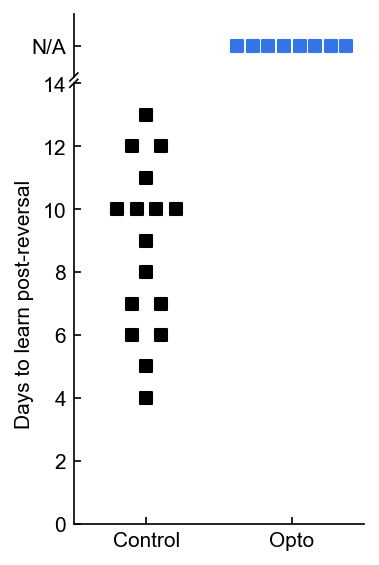

In [88]:
ephys_days = np.array(get_days_to_expert(ephys_animals_use_for_days))
ephys_days[np.equal(ephys_days,np.inf)] = np.ones_like(ephys_days[np.equal(ephys_days,np.inf)])*101
opsin_days = np.array(get_days_to_expert(did_not_learn_animals))
opsin_days[np.equal(opsin_days,np.inf)] = np.ones_like(opsin_days[np.equal(opsin_days,np.inf)])*101

#fig, ax = plt.subplots(figsize=(2.5,4.5))
fig = plt.figure(figsize=(2.5,4.5))
bax = brokenaxes(ylims=( (0,14), (100, 102) ), height_ratios=[2,14], hspace=0.025)
bax.axs[0].set_clip_on(False)
bax.axs[1].set_clip_on(False)
bax.set_xlim([-0.5,1.5])

X,Y = ilep.violin(ephys_days,discrete=True,width=0.5,minjitter=0.1)
bax.scatter(X,Y,c='k',marker='s')

X,Y = ilep.violin(opsin_days,width=0.75)
bax.scatter(X+1,Y,c=LASER_COLOR,marker='s')

yax = bax.axs[1].set_ylabel('Days to learn post-reversal')

bax.axs[0].set_yticks([101])
bax.axs[0].set_yticklabels(['N/A'])
bax.axs[1].set_xticks([0,1])
bax.axs[1].set_xticklabels(['Control','Opto'])

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opsin Days to learn post-reversal V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(yax,), bbox_inches='tight')

#72 is day 13

In [422]:
[k for k in animalBehaviors['BS_49'].sessions]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [434]:
print(f"hits    : {np.sum(np.equal(animalBehaviors['BS_49'].sessions[18].outcomes,1))}")
print(f"misses  : {np.sum(np.equal(animalBehaviors['BS_49'].sessions[18].outcomes,2))}")
print(f"falarms : {np.sum(np.equal(animalBehaviors['BS_49'].sessions[18].outcomes,3))}")
print(f"crejects: {np.sum(np.equal(animalBehaviors['BS_49'].sessions[18].outcomes,4))}")

print(f"target go response rate   : {np.sum(np.equal(animalBehaviors['BS_49'].sessions[18].outcomes,1))/(np.sum(np.equal(animalBehaviors['BS_49'].sessions[18].outcomes,1))+np.sum(np.equal(animalBehaviors['BS_49'].sessions[18].outcomes,2)))}")
print(f"nontarget go response rate: {np.sum(np.equal(animalBehaviors['BS_49'].sessions[18].outcomes,3))/(np.sum(np.equal(animalBehaviors['BS_49'].sessions[18].outcomes,3))+np.sum(np.equal(animalBehaviors['BS_49'].sessions[18].outcomes,4)))}")

hits    : 97
misses  : 78
falarms : 50
crejects: 112
target go response rate   : 0.5542857142857143
nontarget go response rate: 0.30864197530864196


../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


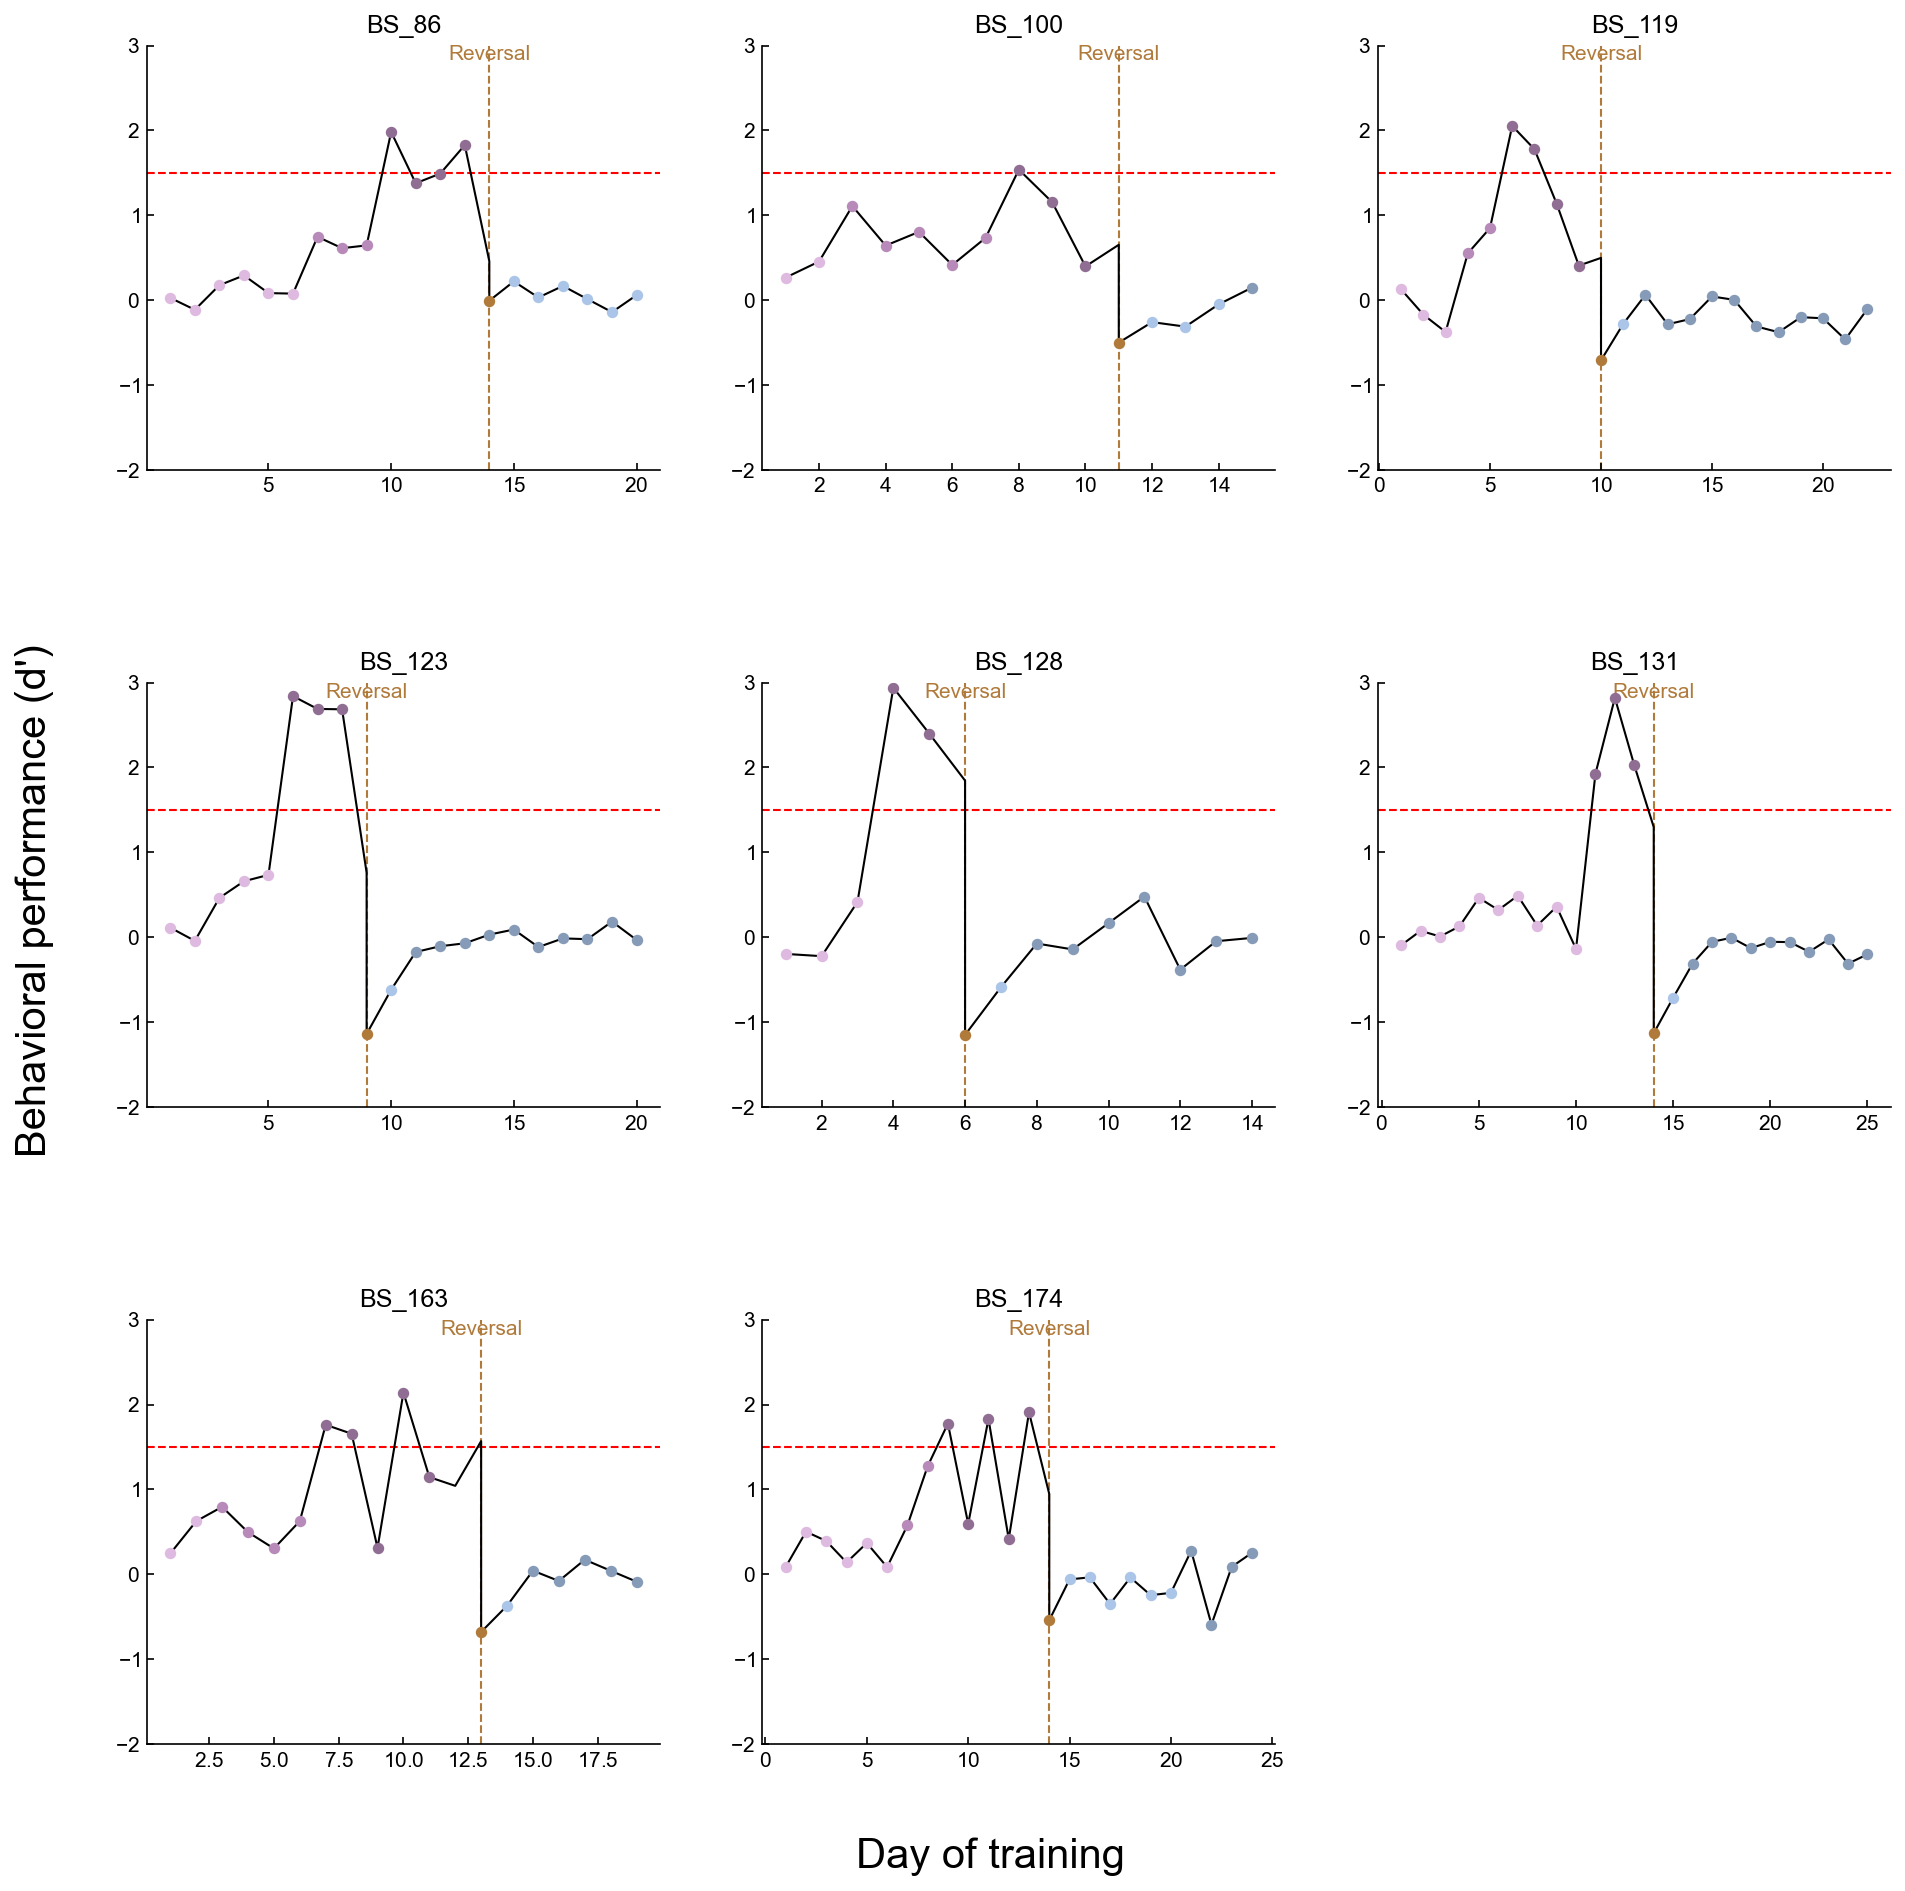

In [6]:
opsin_learning_phases,_,_ = ilep.calculateLearningPhasesV2(did_not_learn_animals,animalBehaviors,plot=True,noTrim=False,noTrimPost=True)

In [51]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def animal_learning_curve(animal):
    rev = animalBehaviors[animal].reversal
    max_day = np.max([s for s in animalBehaviors[animal].sessions])
    print(rev)
    print(max_day)
    

    fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
    
    PLOTTING_PHASE_COLORS = PHASE_COLORS


    reversal = animalBehaviors[animal].reversal
    days = list(np.unique(list(animalBehaviors[animal].sessions.keys())))
    expert_days = np.concatenate(( opsin_learning_phases[animal].pre_expert_days,opsin_learning_phases[animal].post_expert_days,opsin_learning_phases[animal].second_expert_days ))
    dp_list,pc_list = ilep.getPCDPfromBehavior(animalBehaviors,animal,days,expert_days,exclude_first_switch=True)

    print(dp_list)

    days = np.sort(days)

    ax.plot(days,dp_list,color='k',lw=1)

    circle_size = 60

    #Pre Early
    pre_early = np.isin(days,opsin_learning_phases[animal].pre_early_days)
    ax.scatter(days[pre_early],dp_list[pre_early],color=PLOTTING_PHASE_COLORS[0],s=circle_size,zorder=10)

    #Pre Late
    pre_late = np.isin(days,opsin_learning_phases[animal].pre_late_days)
    ax.scatter(days[pre_late],dp_list[pre_late],color=PLOTTING_PHASE_COLORS[1],s=circle_size,zorder=10)

    #Pre Expert
    pre_expert = np.isin(days,opsin_learning_phases[animal].pre_expert_days)
    ax.scatter(days[pre_expert],dp_list[pre_expert],color=PLOTTING_PHASE_COLORS[2],s=circle_size,zorder=10)

    #Post Early
    post_early = np.isin(days,opsin_learning_phases[animal].post_early_days)
    ax.scatter(days[post_early],dp_list[post_early],color=PLOTTING_PHASE_COLORS[3],s=circle_size,zorder=10)

    #Post Late
    post_late = np.isin(days,opsin_learning_phases[animal].post_late_days)
    ax.scatter(days[post_late],dp_list[post_late],color=PLOTTING_PHASE_COLORS[4],s=circle_size,zorder=10)

    #Post Expert
    post_expert = np.isin(days,opsin_learning_phases[animal].post_expert_days)
    ax.scatter(days[post_expert],dp_list[post_expert],color=PLOTTING_PHASE_COLORS[5],s=circle_size,zorder=10)

    #Switch
    switch = np.equal(days,animalBehaviors[animal].reversal)
    ax.scatter(days[switch],dp_list[switch],color=SWITCH_COLOR,s=circle_size,zorder=10)

    ax.set_ylim([-2,3])
    ax.set_yticks([-2,-1,0,1,2,3])

    ax.set_xlim([0,max_day])
    ax.set_xticks(range(0,max_day+1))
    
    labeledindex = np.array(range(1,max_day))
    if max_day >= 20:
        labeledindex = labeledindex[(labeledindex-1)%3==0]
    elif max_day >= 10:
        labeledindex = labeledindex[(labeledindex-1)%2==0]
    print(labeledindex)
    for index, label in enumerate(ax.xaxis.get_ticklabels()):    
        if index not in labeledindex:
            label.set_visible(False)
            
    ax.tick_params(length=6)

    size = 0.5
    center = np.mean(ax.get_ylim())
    ax.text(reversal,2.1,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90,fontsize=14)
    ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
    ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

    ax.axhline(1.5,c='r',linestyle='--',lw=1,zorder=-20)
    print(days)
    ax.text(1.3,-0.3,'Early',color=PLOTTING_PHASE_COLORS[0],fontsize=12,weight='bold')
    ax.text(4,0.8,'Late',color=PLOTTING_PHASE_COLORS[1],fontsize=12,weight='bold')
    ax.text(4.6,2.5,'Expert',color=PLOTTING_PHASE_COLORS[2],fontsize=12,weight='bold')
    ax.text(8.6,-0.7,'Early',color=PLOTTING_PHASE_COLORS[3],fontsize=12,weight='bold')
    ax.text(12.5,-0.1,'Late',color=PLOTTING_PHASE_COLORS[4],fontsize=12,weight='bold')
    ax.text(10,2.5,'Expert',color=PLOTTING_PHASE_COLORS[5],fontsize=12,weight='bold')

    ax.set_ylabel("Behavioral performance (d') ")
    ax.set_xlabel('Sessions')
    ax.set_axisbelow(False)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    #These must be changed at the end. brokenaxes recalculates ticks for several calls
    #ax.set_xticks(range(1,max_day+2))
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass
    
    tt = ax.set_title('pre post')
    
    artists = [tt,]
    return fig,artists
    #fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\DS_19.pdf'),transparent=False,facecolor="white",dpi=400, bbox_inches='tight')
    #fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\DS_15.pdf'),transparent=False,facecolor="white",dpi=400, bbox_inches='tight')
    #fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\BS_50.pdf'),transparent=False,facecolor="white",dpi=400, bbox_inches='tight')
    #fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\BS_42.pdf'),transparent=False,facecolor="white",dpi=400, bbox_inches='tight')
    #fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Manuscript\\Learning'+animal+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_inches='tight')

14
20
[ 0.02851705 -0.11124035  0.17790902  0.29335017  0.08502927  0.07871409
  0.74785756  0.6135793   0.64674033  1.98231166  1.37842708  1.49165845
  1.82772309 -0.00483936  0.22279877  0.0333246   0.16930864  0.01385748
 -0.13896143  0.06070638]
[ 1  4  7 10 13 16 19]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
11
15
[ 0.26817287  0.45636845  1.10970132  0.64434422  0.80596484  0.4160741
  0.73503582  1.53880037  1.15562879  0.39929129 -0.49795788 -0.25682518
 -0.3099395  -0.04743535  0.14941404]
[ 1  3  5  7  9 11 13]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
10
22
[ 0.12771533 -0.16897188 -0.37282466  0.55301413  0.85083735  2.05352853
  1.77937328  1.13879639  0.4084728  -0.7063741  -0.27805344  0.06470322
 -0.282251   -0.22143864  0.04547899  0.00533615 -0.30784498 -0.37566239
 -0.19855093 -0.21175517 -0.46058283 -0.10157365]
[ 1  4  7 10 13 16 19]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
9
20
[ 0.11425725 -0.04172844  0.464398

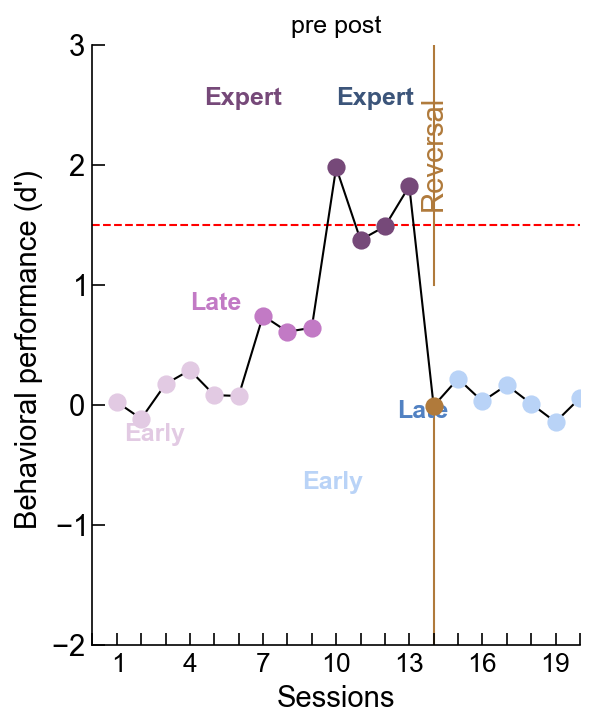

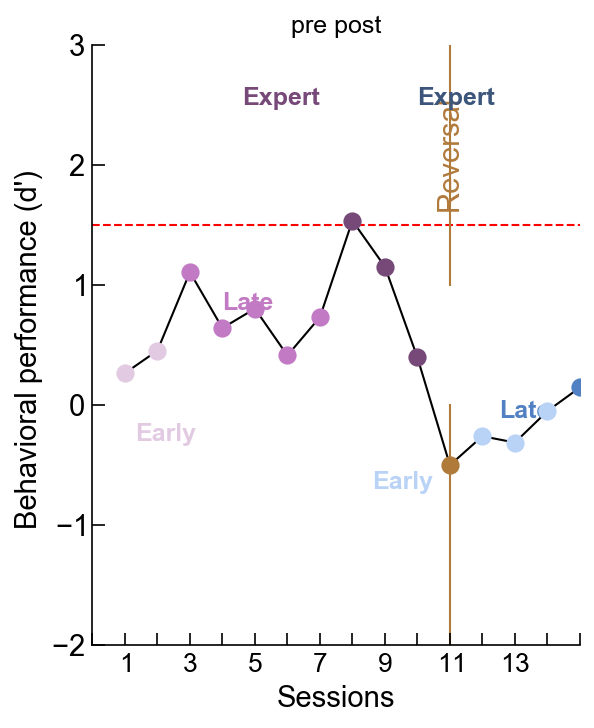

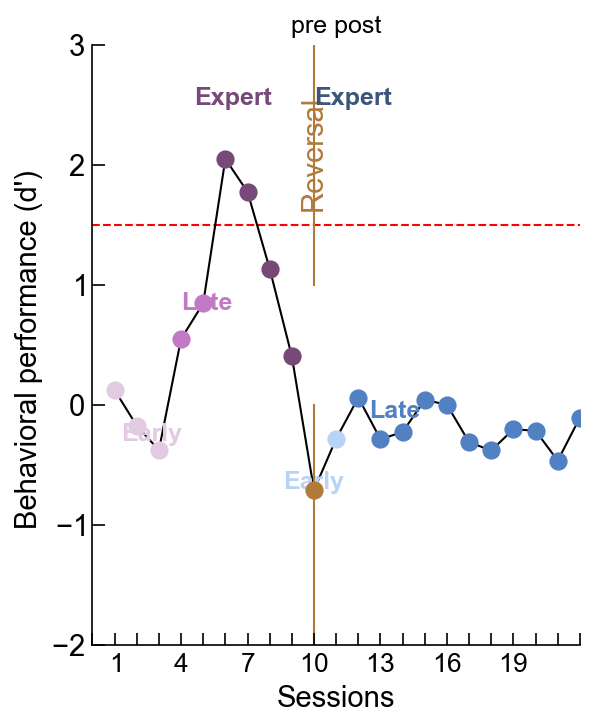

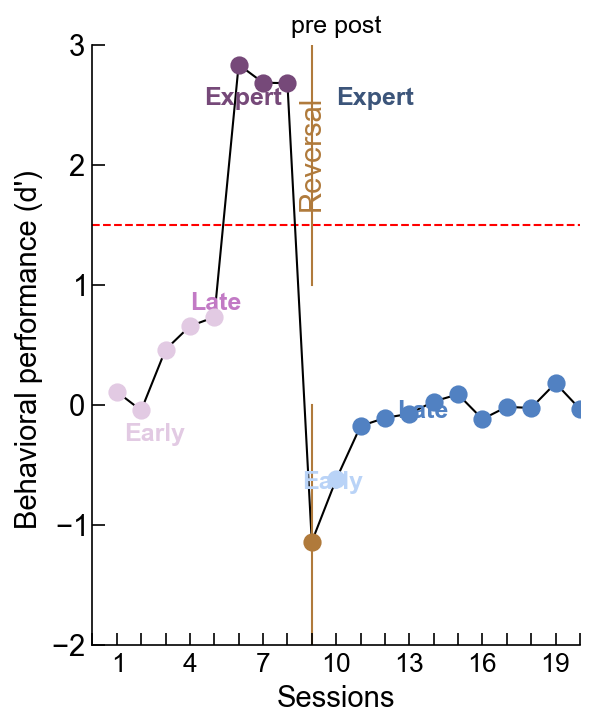

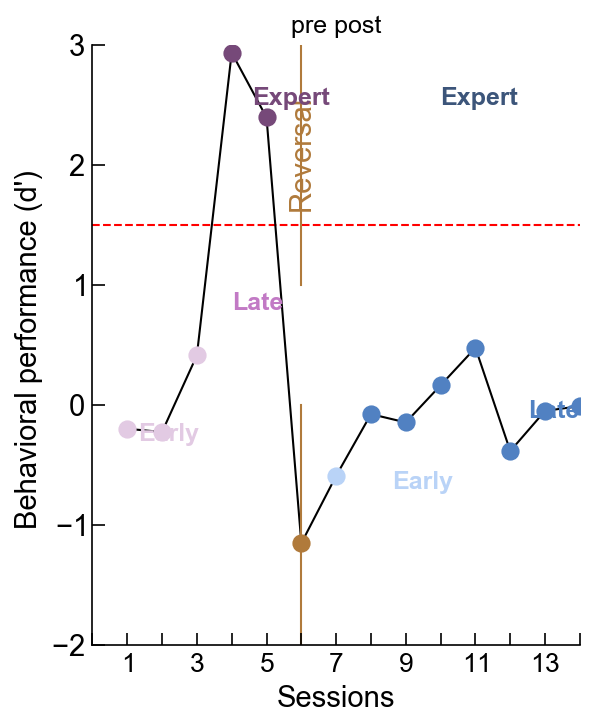

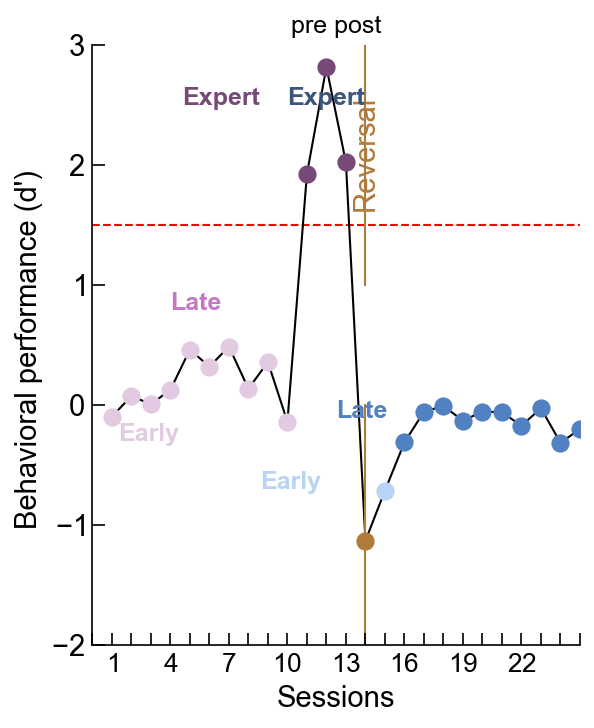

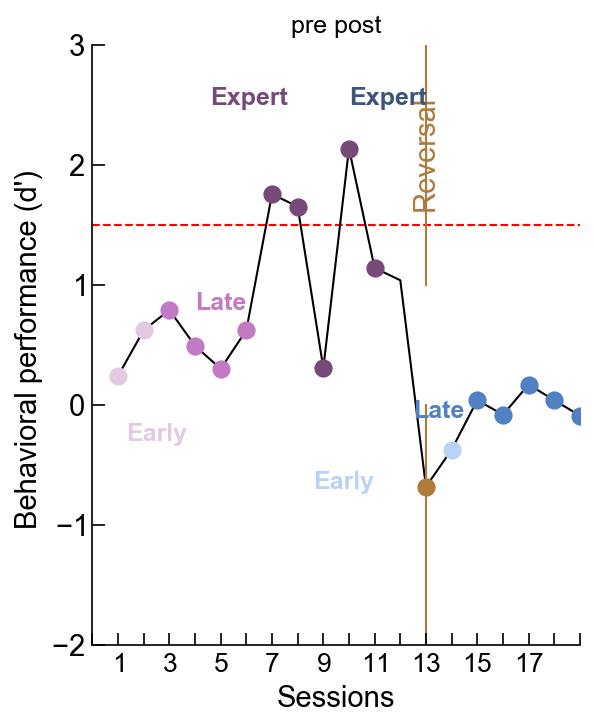

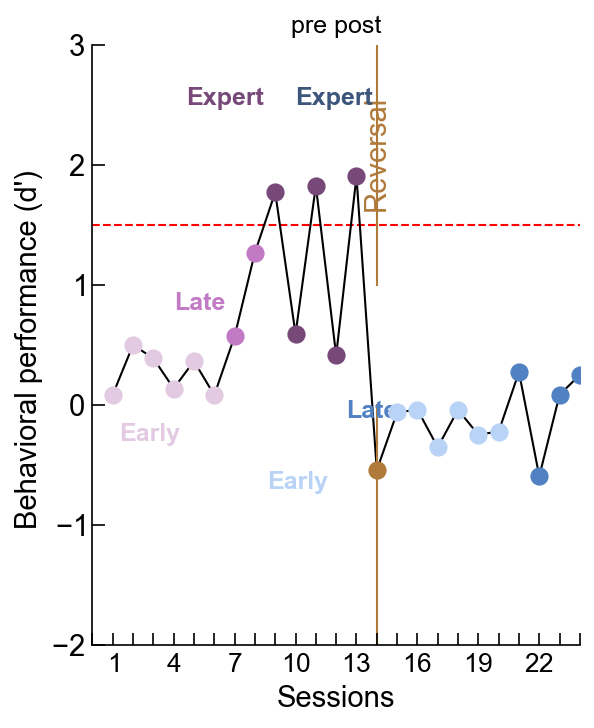

In [52]:
for animal in did_not_learn_animals:
    fig,artists = animal_learning_curve(animal)
    fig.savefig(os.path.join('D:\\TempFigures\\Example Opsin Learning Phases\\'+animal+' learning curve.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [53]:
did_not_learn_animals

['BS_86', 'BS_100', 'BS_119', 'BS_123', 'BS_128', 'BS_131', 'BS_163', 'BS_174']

In [56]:
for animal in did_not_learn_animals:
    forst_laser = np.Inf
    for session in animalBehaviors[animal].sessions:
        if hasattr(animalBehaviors[animal].sessions[session],'laser') and np.sum(animalBehaviors[animal].sessions[session].laser)>0:
            forst_laser = min(forst_laser,session)
            
    print(f"{animal} first day of laser is:\t{forst_laser}")

BS_86 first day of laser is:	14
BS_100 first day of laser is:	11
BS_119 first day of laser is:	10
BS_123 first day of laser is:	9
BS_128 first day of laser is:	4
BS_131 first day of laser is:	14
BS_163 first day of laser is:	3
BS_174 first day of laser is:	14
